In [79]:
#Librerías
import numpy as np #Procesamiento matemático
from scipy.io.wavfile import read,write #Leer y guardar audios
import scipy as sp #Procesamiento de señales
from scipy.signal import wiener,firwin,lfilter #Filtros
import matplotlib.pyplot as plt #Gráficas
from IPython.display import Audio # para escuchar la señal
from sigproc3 import *
import sigproc3
from scipy.fftpack import dct
from sigproc3 import BarkEnergies
import pandas as pd
from pandas import read_csv
import seaborn as sns

In [80]:
#NORMALIZACION DE LA SEÑAL
def norm_sig(sig):
    #Eliminar nivel DC
    normsig = sig-np.mean(sig)
    #Escalar valores de amplitud entre -1 y 1
    normsig = normsig/float(max(np.absolute(min(normsig)),max(normsig)))
    return normsig


#FUNCION PARA SEGMENTAR
def seg_sig(sig,fs,win,solp):
    win1=int(fs*win)
    solp1=int(fs*solp)
    nuevalista = [] #Lista vacia
    
    for i in range(0,len(sig),solp1): # inicia en 0 hasta la longuitud de la señal con saltos del solape
        segm = sig[i:i+win1] 
        nuevalista.append(segm)#guarda en nuevalista
    return nuevalista

#FUNCION DE COEFICIENTES DE MEL 
def calculo_MFCC(sig_aux, fs, win, solp, nffft):
    win = win*0.001 #para que quede en miliseg 
    solp= solp*0.001
    nfft=2048 ## siempre lo mismo para todos?
    #llama la funcion de enventanado
    datos = seg_sig(sig_aux,fs,win,solp) # Segmentación
    print(len(datos))
    #espectro de potencia 
    pspec=[]
    for i in range (0, np.size(datos),1):
        pspec.append(powspec(datos[i],nfft))
    #banco de filtros 
    fb = getfilterbanks(nfft,fs,nfilt=20)
    print(len(fb))
    energyfb=[]
    for i in range (0,len(datos),1):
        energyfb1 = np.dot(pspec[i],fb.T)
        energyfb.append(np.where(energyfb1 == 0,np.finfo(float).eps,energyfb1))
    
    energyfblog= np.log(energyfb)
    #Transformada discreta del coseno
    mfccs = dct(energyfblog, type=2, axis=1, norm='ortho')
    print(np.shape(mfccs))
    return mfccs


#FRECUENCIA 
def gfrecuencias (sig, fs):
    frecuencia=[]
    for i in range(len(sig)):
        #datos_aux=sig[i]
        w = np.fft.fft(sig[i])# transformada de fourier
        freqs = np.fft.fftfreq(len(sig[i]))

        # Find the peak in the coefficients
        idx = np.argmax(np.abs(w))
        freq = freqs[idx]
        freq_in_hertz = abs(freq * fs)
        frecuencia.append(freq_in_hertz)
        #print(freq_in_hertz)
        
    return frecuencia

In [108]:
fs1,sig1 = read('E1.wav')
sig1=np.mean(sig1,axis=1) #mono
sig1= norm_sig(sig1) # Normalizar la señal
datos1= seg_sig(sig1,fs1,0.04,0.02)# segmenta la señal 
coef1=calculo_MFCC(sig1,fs1,40,20,4096)# calculo de los coeficientes MEL


fs2,sig2 = read('E2.wav')
sig2=np.mean(sig2,axis=1) #mono
sig2= norm_sig(sig2) # Normalizar la señal
datos2= seg_sig(sig2,fs2,0.04,0.02)# segmenta la señal 
coef2=calculo_MFCC(sig2,fs2,40,20,4096)# calculo de los coeficientes MEL


fs3,sig3 = read('E3.wav')
sig3=np.mean(sig3,axis=1) #mono
sig3= norm_sig(sig3) # Normalizar la señal
datos3= seg_sig(sig3,fs3,0.04,0.02)# segmenta la señal 
coef3=calculo_MFCC(sig3,fs3,40,20,4096)# calculo de los coeficientes MEL


fs4,sig4 = read('E4.wav')
sig4=np.mean(sig4,axis=1) #mono
sig4= norm_sig(sig4) # Normalizar la señal
datos4= seg_sig(sig4,fs4,0.04,0.02)# segmenta la señal 
coef4=calculo_MFCC(sig4,fs4,40,20,4096)# calculo de los coeficientes MEL

fs5,sig5 = read('E5.wav')
sig5=np.mean(sig5,axis=1) #mono
sig5= norm_sig(sig5) # Normalizar la señal
datos5= seg_sig(sig5,fs5,0.04,0.02)# segmenta la señal 
coef5=calculo_MFCC(sig5,fs5,40,20,4096)# calculo de los coeficientes MEL

fs6,sig6 = read('E6.wav')
sig6=np.mean(sig6,axis=1) #mono
sig6= norm_sig(sig6) # Normalizar la señal
datos6= seg_sig(sig6,fs6,0.04,0.02)# segmenta la señal 
coef6=calculo_MFCC(sig6,fs6,40,20,4096)# calculo de los coeficientes MEL


fs7,sig7 = read('E7.wav')
sig7=np.mean(sig7,axis=1) #mono
sig7= norm_sig(sig7) # Normalizar la señal
datos7= seg_sig(sig7,fs7,0.04,0.02)# segmenta la señal 
coef7=calculo_MFCC(sig7,fs7,40,20,4096)# calculo de los coeficientes MEL

fs8,sig8 = read('E8.wav')
sig8=np.mean(sig8,axis=1) #mono
sig8= norm_sig(sig8) # Normalizar la señal
datos8= seg_sig(sig8,fs8,0.04,0.02)# segmenta la señal 
coef8=calculo_MFCC(sig8,fs8,40,20,4096)# calculo de los coeficientes MEL

fs9,sig9 = read('E9.wav')
sig9=np.mean(sig9,axis=1) #mono
sig9= norm_sig(sig9) # Normalizar la señal
datos9= seg_sig(sig9,fs9,0.04,0.02)# segmenta la señal 
coef9=calculo_MFCC(sig9,fs9,40,20,4096)# calculo de los coeficientes MEL


fs10,sig10 = read('E10.wav')
sig10=np.mean(sig10,axis=1) #mono
sig10= norm_sig(sig10) # Normalizar la señal
datos10= seg_sig(sig10,fs10,0.04,0.02)# segmenta la señal 
coef10=calculo_MFCC(sig10,fs10,40,20,4096)# calculo de los coeficientes MEL

fs11,sig11 = read('E11.wav')
sig11=np.mean(sig11,axis=1) #mono
sig11= norm_sig(sig11) # Normalizar la señal
datos11= seg_sig(sig11,fs11,0.04,0.02)# segmenta la señal 
coef11=calculo_MFCC(sig11,fs11,40,20,4096)# calculo de los coeficientes MEL


fs12,sig12 = read('E12.wav')
sig12=np.mean(sig12,axis=1) #mono
sig12= norm_sig(sig12) # Normalizar la señal
datos12= seg_sig(sig12,fs12,0.04,0.02)# segmenta la señal 
coef12=calculo_MFCC(sig12,fs12,40,20,4096)# calculo de los coeficientes MEL


fs13,sig13 = read('E13.wav')
sig13=np.mean(sig13,axis=1) #mono
sig13= norm_sig(sig13) # Normalizar la señal
datos13= seg_sig(sig13,fs13,0.04,0.02)# segmenta la señal 
coef13=calculo_MFCC(sig13,fs13,40,20,4096)# calculo de los coeficientes MEL

fs14,sig14 = read('E14.wav')
sig14=np.mean(sig14,axis=1) #mono
sig14= norm_sig(sig14) # Normalizar la señal
datos14= seg_sig(sig14,fs14,0.04,0.02)# segmenta la señal 
coef14=calculo_MFCC(sig5,fs5,40,20,4096)# calculo de los coeficientes MEL

fs15,sig15 = read('E15.wav')
sig15=np.mean(sig15,axis=1) #mono
sig15= norm_sig(sig15) # Normalizar la señal
datos15= seg_sig(sig15,fs15,0.04,0.02)# segmenta la señal 
coef15=calculo_MFCC(sig15,fs15,40,20,4096)# calculo de los coeficientes MEL

fs16,sig16 = read('E16.wav')
sig16=np.mean(sig16,axis=1) #mono
sig16= norm_sig(sig16) # Normalizar la señal
datos16= seg_sig(sig16,fs16,0.04,0.02)# segmenta la señal 
coef16=calculo_MFCC(sig16,fs16,40,20,4096)# calculo de los coeficientes MEL

fs17,sig17= read('E17.wav')
sig17=np.mean(sig17,axis=1) #mono
sig17= norm_sig(sig17) # Normalizar la señal
datos17= seg_sig(sig5,fs17,0.04,0.02)# segmenta la señal 
coef17=calculo_MFCC(sig17,fs17,40,20,4096)# calculo de los coeficientes MEL


fs18,sig18 = read('E18.wav')
sig18=np.mean(sig18,axis=1) #mono
sig18= norm_sig(sig18) # Normalizar la señal
datos18= seg_sig(sig18,fs18,0.04,0.02)# segmenta la señal 
coef18=calculo_MFCC(sig18,fs18,40,20,4096)# calculo de los coeficientes MEL


fs19,sig19 = read('E19.wav')
sig19=np.mean(sig19,axis=1) #mono
sig19= norm_sig(sig19) # Normalizar la señal
datos19= seg_sig(sig19,fs19,0.04,0.02)# segmenta la señal 
coef19=calculo_MFCC(sig19,fs19,40,20,4096)# calculo de los coeficientes MEL

fs20,sig20 = read('E20.wav')
sig20=np.mean(sig20,axis=1) #mono
sig20= norm_sig(sig20) # Normalizar la señal
datos20= seg_sig(sig20,fs20,0.04,0.02)# segmenta la señal 
coef20=calculo_MFCC(sig5,fs20,40,20,4096)# calculo de los coeficientes MEL


fs21,sig21 = read('E21.wav')
sig21=np.mean(sig21,axis=1) #mono
sig21= norm_sig(sig21) # Normalizar la señal
datos21= seg_sig(sig21,fs21,0.04,0.02)# segmenta la señal 
coef21=calculo_MFCC(sig21,fs21,40,20,4096)# calculo de los coeficientes MEL


fs22,sig22 = read('E22.wav')
sig22=np.mean(sig22,axis=1) #mono
sig22= norm_sig(sig22) # Normalizar la señal
datos22= seg_sig(sig22,fs22,0.04,0.02)# segmenta la señal 
coef22=calculo_MFCC(sig22,fs22,40,20,4096)# calculo de los coeficientes MEL

fs23,sig23 = read('E23.wav')
sig23=np.mean(sig23,axis=1) #mono
sig23= norm_sig(sig23) # Normalizar la señal
datos23= seg_sig(sig5,fs23,0.04,0.02)# segmenta la señal 
coef23=calculo_MFCC(sig23,fs23,40,20,4096)# calculo de los coeficientes MEL


fs24,sig24 = read('E24.wav')
sig24=np.mean(sig24,axis=1) #mono
sig24= norm_sig(sig24) # Normalizar la señal
datos24= seg_sig(sig24,fs24,0.04,0.02)# segmenta la señal 
coef24=calculo_MFCC(sig24,fs24,40,20,4096)# calculo de los coeficientes MEL

fs25,sig25 = read('E25.wav')
sig25=np.mean(sig25,axis=1) #mono
sig25= norm_sig(sig25) # Normalizar la señal
datos25= seg_sig(sig25,fs25,0.04,0.02)# segmenta la señal 
coef25=calculo_MFCC(sig25,fs25,40,20,4096)# calculo de los coeficientes MEL


fs26,sig26 = read('E26.wav')
sig26=np.mean(sig26,axis=1) #mono
sig26= norm_sig(sig26) # Normalizar la señal
datos26= seg_sig(sig26,fs26,0.04,0.02)# segmenta la señal 
coef26=calculo_MFCC(sig26,fs26,40,20,4096)# calculo de los coeficientes MEL


fs27,sig27 = read('E27.wav')
sig27=np.mean(sig27,axis=1) #mono
sig27= norm_sig(sig27) # Normalizar la señal
datos27= seg_sig(sig27,fs27,0.04,0.02)# segmenta la señal 
coef27=calculo_MFCC(sig27,fs27,40,20,4096)# calculo de los coeficientes MEL


fs28,sig28 = read('E28.wav')
sig28=np.mean(sig28,axis=1) #mono
sig28= norm_sig(sig28) # Normalizar la señal
datos28= seg_sig(sig28,fs28,0.04,0.02)# segmenta la señal 
coef28=calculo_MFCC(sig28,fs28,40,20,4096)# calculo de los coeficientes MEL


fs29,sig29 = read('E29.wav')
sig29=np.mean(sig29,axis=1) #mono
sig29= norm_sig(sig29) # Normalizar la señal
datos29= seg_sig(sig29,fs29,0.04,0.02)# segmenta la señal 
coef29=calculo_MFCC(sig29,fs29,40,20,4096)# calculo de los coeficientes MEL


fs30,sig30 = read('E30.wav')
sig30=np.mean(sig30,axis=1) #mono
sig30= norm_sig(sig30) # Normalizar la señal
datos30= seg_sig(sig30,fs30,0.04,0.02)# segmenta la señal 
coef30=calculo_MFCC(sig30,fs30,40,20,4096)# calculo de los coeficientes MEL

fs31,sig31 = read('E31.wav')
sig31=np.mean(sig31,axis=1) #mono
sig31= norm_sig(sig31) # Normalizar la señal
datos31= seg_sig(sig31,fs31,0.04,0.02)# segmenta la señal 
coef31=calculo_MFCC(sig31,fs31,40,20,4096)# calculo de los coeficientes MEL


fs32,sig32 = read('E32.wav')
sig32=np.mean(sig32,axis=1) #mono
sig32= norm_sig(sig32) # Normalizar la señal
datos32= seg_sig(sig32,fs32,0.04,0.02)# segmenta la señal 
coef32=calculo_MFCC(sig32,fs32,40,20,4096)# calculo de los coeficientes MEL


fs33,sig33 = read('E33.wav')
sig33=np.mean(sig33,axis=1) #mono
sig33= norm_sig(sig33) # Normalizar la señal
datos33= seg_sig(sig33,fs33,0.04,0.02)# segmenta la señal 
coef33=calculo_MFCC(sig33,fs33,40,20,4096)# calculo de los coeficientes MEL


fs34,sig34 = read('E34.wav')
sig34=np.mean(sig34,axis=1) #mono
sig34= norm_sig(sig34) # Normalizar la señal
datos34= seg_sig(sig34,fs34,0.04,0.02)# segmenta la señal 
coef34=calculo_MFCC(sig5,fs34,40,20,4096)# calculo de los coeficientes MEL


fs35,sig35 = read('E35.wav')
sig35=np.mean(sig35,axis=1) #mono
sig35= norm_sig(sig35) # Normalizar la señal
datos35= seg_sig(sig35,fs35,0.04,0.02)# segmenta la señal 
coef35=calculo_MFCC(sig35,fs35,40,20,4096)# calculo de los coeficientes MEL


fs36,sig36 = read('E36.wav')
sig36=np.mean(sig36,axis=1) #mono
sig36= norm_sig(sig36) # Normalizar la señal
datos36= seg_sig(sig5,fs5,0.04,0.02)# segmenta la señal 
coef36=calculo_MFCC(sig36,fs36,40,20,4096)# calculo de los coeficientes MEL


fs37,sig37 = read('E37.wav')
sig37=np.mean(sig37,axis=1) #mono
sig37= norm_sig(sig37) # Normalizar la señal
datos37= seg_sig(sig37,fs37,0.04,0.02)# segmenta la señal 
coef37=calculo_MFCC(sig5,fs37,40,20,4096)# calculo de los coeficientes MEL

fs38,sig38 = read('E38.wav')
sig38=np.mean(sig38,axis=1) #mono
sig38= norm_sig(sig38) # Normalizar la señal
datos38= seg_sig(sig38,fs38,0.04,0.02)# segmenta la señal 
coef38=calculo_MFCC(sig38,fs38,40,20,4096)# calculo de los coeficientes MEL

fs39,sig39 = read('E39.wav')
sig39=np.mean(sig39,axis=1) #mono
sig39= norm_sig(sig39) # Normalizar la señal
datos39= seg_sig(sig39,fs39,0.04,0.02)# segmenta la señal 
coef39=calculo_MFCC(sig39,fs39,40,20,4096)# calculo de los coeficientes MEL

fs40,sig40 = read('E40.wav')
sig40=np.mean(sig40,axis=1) #mono
sig40= norm_sig(sig40) # Normalizar la señal
datos40= seg_sig(sig40,fs40,0.04,0.02)# segmenta la señal 
coef40=calculo_MFCC(sig40,fs40,40,20,4096)# calculo de los coeficientes MEL

#

fs41,sig41 = read('E41.wav')
sig41=np.mean(sig41,axis=1) #mono
sig41= norm_sig(sig41) # Normalizar la señal
datos41= seg_sig(sig41,fs41,0.04,0.02)# segmenta la señal 
coef41=calculo_MFCC(sig41,fs41,40,20,4096)# calculo de los coeficientes MEL


fs42,sig42 = read('E42.wav')
sig42=np.mean(sig42,axis=1) #mono
sig42= norm_sig(sig42) # Normalizar la señal
datos42= seg_sig(sig42,fs42,0.04,0.02)# segmenta la señal 
coef42=calculo_MFCC(sig42,fs42,40,20,4096)# calculo de los coeficientes MEL


fs43,sig43 = read('E43.wav')
sig43=np.mean(sig43,axis=1) #mono
sig43= norm_sig(sig43) # Normalizar la señal
datos43= seg_sig(sig43,fs43,0.04,0.02)# segmenta la señal 
coef43=calculo_MFCC(sig43,fs43,40,20,4096)# calculo de los coeficientes MEL


fs44,sig44 = read('E44.wav')
sig44=np.mean(sig44,axis=1) #mono
sig44= norm_sig(sig44) # Normalizar la señal
datos44= seg_sig(sig44,fs44,0.04,0.02)# segmenta la señal 
coef44=calculo_MFCC(sig44,fs44,40,20,4096)# calculo de los coeficientes MEL

fs45,sig45 = read('E45.wav')
sig45=np.mean(sig45,axis=1) #mono
sig45= norm_sig(sig45) # Normalizar la señal
datos45= seg_sig(sig45,fs45,0.04,0.02)# segmenta la señal 
coef45=calculo_MFCC(sig45,fs45,40,20,4096)# calculo de los coeficientes MEL

fs46,sig46 = read('E46.wav')
sig46=np.mean(sig46,axis=1) #mono
sig46= norm_sig(sig46) # Normalizar la señal
datos46= seg_sig(sig46,fs46,0.04,0.02)# segmenta la señal 
coef46=calculo_MFCC(sig46,fs46,40,20,4096)# calculo de los coeficientes MEL


fs47,sig47 = read('E47.wav')
sig47=np.mean(sig47,axis=1) #mono
sig47= norm_sig(sig47) # Normalizar la señal
datos47= seg_sig(sig47,fs47,0.04,0.02)# segmenta la señal 
coef47=calculo_MFCC(sig7,fs47,40,20,4096)# calculo de los coeficientes MEL

fs48,sig48 = read('E48.wav')
sig48=np.mean(sig48,axis=1) #mono
sig48= norm_sig(sig48) # Normalizar la señal
datos48= seg_sig(sig48,fs48,0.04,0.02)# segmenta la señal 
coef48=calculo_MFCC(sig48,fs48,40,20,4096)# calculo de los coeficientes MEL

fs49,sig49 = read('E49.wav')
sig49=np.mean(sig49,axis=1) #mono
sig49= norm_sig(sig49) # Normalizar la señal
datos49= seg_sig(sig49,fs49,0.04,0.02)# segmenta la señal 
coef49=calculo_MFCC(sig49,fs49,40,20,4096)# calculo de los coeficientes MEL

fs50,sig50 = read('E50.wav')
sig50=np.mean(sig50,axis=1) #mono
sig50= norm_sig(sig50) # Normalizar la señal
datos50= seg_sig(sig50,fs50,0.04,0.02)# segmenta la señal 
coef50=calculo_MFCC(sig50,fs50,40,20,4096)# calculo de los coeficientes MEL



fs51,sig51 = read('E51.wav')
sig51=np.mean(sig51,axis=1) #mono
sig51= norm_sig(sig51) # Normalizar la señal
datos51= seg_sig(sig51,fs51,0.04,0.02)# segmenta la señal 
coef51=calculo_MFCC(sig51,fs51,40,20,4096)# calculo de los coeficientes MEL


fs52,sig52 = read('E52.wav')
sig52=np.mean(sig52,axis=1) #mono
sig52= norm_sig(sig52) # Normalizar la señal
datos52= seg_sig(sig52,fs52,0.04,0.02)# segmenta la señal 
coef52=calculo_MFCC(sig52,fs52,40,20,4096)# calculo de los coeficientes MEL


fs53,sig53 = read('E53.wav')
sig53=np.mean(sig53,axis=1) #mono
sig53= norm_sig(sig53) # Normalizar la señal
datos53= seg_sig(sig53,fs53,0.04,0.02)# segmenta la señal 
coef53=calculo_MFCC(sig53,fs53,40,20,4096)# calculo de los coeficientes MEL


fs54,sig54 = read('E54.wav')
sig54=np.mean(sig54,axis=1) #mono
sig54= norm_sig(sig54) # Normalizar la señal
datos54= seg_sig(sig54,fs54,0.04,0.02)# segmenta la señal 
coef54=calculo_MFCC(sig54,fs54,40,20,4096)# calculo de los coeficientes MEL

fs55,sig55 = read('E55.wav')
sig55=np.mean(sig55,axis=1) #mono
sig55= norm_sig(sig55) # Normalizar la señal
datos55= seg_sig(sig55,fs55,0.04,0.02)# segmenta la señal 
coef55=calculo_MFCC(sig55,fs55,40,20,4096)# calculo de los coeficientes MEL

fs56,sig56 = read('E56.wav')
sig56=np.mean(sig56,axis=1) #mono
sig56= norm_sig(sig6) # Normalizar la señal
datos56= seg_sig(sig56,fs56,0.04,0.02)# segmenta la señal 
coef56=calculo_MFCC(sig56,fs56,40,20,4096)# calculo de los coeficientes MEL


fs57,sig57 = read('E57.wav')
sig57=np.mean(sig57,axis=1) #mono
sig57= norm_sig(sig57) # Normalizar la señal
datos57= seg_sig(sig57,fs57,0.04,0.02)# segmenta la señal 
coef57=calculo_MFCC(sig57,fs57,40,20,4096)# calculo de los coeficientes MEL

fs58,sig58 = read('E58.wav')
sig58=np.mean(sig58,axis=1) #mono
sig58= norm_sig(sig58) # Normalizar la señal
datos58= seg_sig(sig58,fs58,0.04,0.02)# segmenta la señal 
coef58=calculo_MFCC(sig58,fs58,40,20,4096)# calculo de los coeficientes MEL

fs59,sig59 = read('E59.wav')
sig59=np.mean(sig59,axis=1) #mono
sig59= norm_sig(sig59) # Normalizar la señal
datos59= seg_sig(sig59,fs59,0.04,0.02)# segmenta la señal 
coef59=calculo_MFCC(sig59,fs59,40,20,4096)# calculo de los coeficientes MEL

fs60,sig60 = read('E60.wav')
sig60=np.mean(sig60,axis=1) #mono
sig60= norm_sig(sig60) # Normalizar la señal
datos60= seg_sig(sig60,fs60,0.04,0.02)# segmenta la señal 
coef60=calculo_MFCC(sig60,fs60,40,20,4096)# calculo de los coeficientes MEL



#
fs61,sig61 = read('E61.wav')
sig61=np.mean(sig61,axis=1) #mono
sig61= norm_sig(sig61) # Normalizar la señal
datos61= seg_sig(sig61,fs61,0.04,0.02)# segmenta la señal 
coef61=calculo_MFCC(sig61,fs61,40,20,4096)# calculo de los coeficientes MEL


fs62,sig62 = read('E62.wav')
sig62=np.mean(sig62,axis=1) #mono
sig62= norm_sig(sig62) # Normalizar la señal
datos62= seg_sig(sig62,fs62,0.04,0.02)# segmenta la señal 
coef62=calculo_MFCC(sig62,fs62,40,20,4096)# calculo de los coeficientes MEL


fs63,sig63 = read('E63.wav')
sig63=np.mean(sig63,axis=1) #mono
sig63= norm_sig(sig63) # Normalizar la señal
datos63= seg_sig(sig63,fs63,0.04,0.02)# segmenta la señal 
coef63=calculo_MFCC(sig63,fs63,40,20,4096)# calculo de los coeficientes MEL


fs64,sig64 = read('E64.wav')
sig64=np.mean(sig64,axis=1) #mono
sig64= norm_sig(sig64) # Normalizar la señal
datos64= seg_sig(sig64,fs64,0.04,0.02)# segmenta la señal 
coef64=calculo_MFCC(sig64,fs64,40,20,4096)# calculo de los coeficientes MEL

fs65,sig65 = read('E65.wav')
sig65=np.mean(sig65,axis=1) #mono
sig65= norm_sig(sig65) # Normalizar la señal
datos65= seg_sig(sig65,fs65,0.04,0.02)# segmenta la señal 
coef65=calculo_MFCC(sig65,fs65,40,20,4096)# calculo de los coeficientes MEL

fs66,sig66 = read('E66.wav')
sig66=np.mean(sig66,axis=1) #mono
sig66= norm_sig(sig66) # Normalizar la señal
datos66= seg_sig(sig66,fs66,0.04,0.02)# segmenta la señal 
coef66=calculo_MFCC(sig66,fs66,40,20,4096)# calculo de los coeficientes MEL


fs67,sig67 = read('E67.wav')
sig67=np.mean(sig67,axis=1) #mono
sig67= norm_sig(sig67) # Normalizar la señal
datos67= seg_sig(sig67,fs67,0.04,0.02)# segmenta la señal 
coef67=calculo_MFCC(sig67,fs67,40,20,4096)# calculo de los coeficientes MEL

fs68,sig68 = read('E68.wav')
sig68=np.mean(sig68,axis=1) #mono
sig68= norm_sig(sig68) # Normalizar la señal
datos68= seg_sig(sig68,fs68,0.04,0.02)# segmenta la señal 
coef68=calculo_MFCC(sig68,fs68,40,20,4096)# calculo de los coeficientes MEL

fs69,sig69 = read('E69.wav')
sig69=np.mean(sig69,axis=1) #mono
sig69= norm_sig(sig69) # Normalizar la señal
datos69= seg_sig(sig69,fs69,0.04,0.02)# segmenta la señal 
coef69=calculo_MFCC(sig69,fs69,40,20,4096)# calculo de los coeficientes MEL


fs70,sig70 = read('E70.wav')
sig70=np.mean(sig70,axis=1) #mono
sig70= norm_sig(sig70) # Normalizar la señal
datos70= seg_sig(sig70,fs70,0.04,0.02)# segmenta la señal 
coef70=calculo_MFCC(sig70,fs70,40,20,4096)# calculo de los coeficientes MEL
#
fs71,sig71 = read('E71.wav')
sig71=np.mean(sig71,axis=1) #mono
sig71= norm_sig(sig71) # Normalizar la señal
datos71= seg_sig(sig71,fs71,0.04,0.02)# segmenta la señal 
coef71=calculo_MFCC(sig71,fs71,40,20,4096)# calculo de los coeficientes MEL


fs72,sig72 = read('E72.wav')
sig72=np.mean(sig72,axis=1) #mono
sig72= norm_sig(sig72) # Normalizar la señal
datos72= seg_sig(sig72,fs72,0.04,0.02)# segmenta la señal 
coef72=calculo_MFCC(sig72,fs72,40,20,4096)# calculo de los coeficientes MEL


fs73,sig73 = read('E73.wav')
sig73=np.mean(sig73,axis=1) #mono
sig73= norm_sig(sig73) # Normalizar la señal
datos73= seg_sig(sig73,fs73,0.04,0.02)# segmenta la señal 
coef73=calculo_MFCC(sig73,fs73,40,20,4096)# calculo de los coeficientes MEL


fs74,sig74 = read('E74.wav')
sig74=np.mean(sig74,axis=1) #mono
sig74= norm_sig(sig74) # Normalizar la señal
datos74= seg_sig(sig74,fs74,0.04,0.02)# segmenta la señal 
coef74=calculo_MFCC(sig74,fs74,40,20,4096)# calculo de los coeficientes MEL

fs75,sig75 = read('E75.wav')
sig75=np.mean(sig75,axis=1) #mono
sig75= norm_sig(sig75) # Normalizar la señal
datos75= seg_sig(sig75,fs75,0.04,0.02)# segmenta la señal 
coef75=calculo_MFCC(sig75,fs75,40,20,4096)# calculo de los coeficientes MEL

fs76,sig76 = read('E76.wav')
sig76=np.mean(sig76,axis=1) #mono
sig76= norm_sig(sig6) # Normalizar la señal
datos76= seg_sig(sig76,fs76,0.04,0.02)# segmenta la señal 
coef76=calculo_MFCC(sig76,fs76,40,20,4096)# calculo de los coeficientes MEL

fs77,sig77 = read('E77.wav')
sig77=np.mean(sig77,axis=1) #mono
sig77= norm_sig(sig77) # Normalizar la señal
datos77= seg_sig(sig77,fs77,0.04,0.02)# segmenta la señal 
coef77=calculo_MFCC(sig77,fs77,40,20,4096)# calculo de los coeficientes MEL

fs78,sig78 = read('E78.wav')
sig78=np.mean(sig78,axis=1) #mono
sig78= norm_sig(sig78) # Normalizar la señal
datos78= seg_sig(sig78,fs78,0.04,0.02)# segmenta la señal 
coef78=calculo_MFCC(sig78,fs78,40,20,4096)# calculo de los coeficientes MEL

fs79,sig79 = read('E79.wav')
sig79=np.mean(sig79,axis=1) #mono
sig79= norm_sig(sig79) # Normalizar la señal
datos79= seg_sig(sig79,fs79,0.04,0.02)# segmenta la señal 
coef79=calculo_MFCC(sig79,fs79,40,20,4096)# calculo de los coeficientes MEL


fs80,sig80 = read('E80.wav')
sig80=np.mean(sig80,axis=1) #mono
sig80= norm_sig(sig80) # Normalizar la señal
datos80= seg_sig(sig80,fs80,0.04,0.02)# segmenta la señal 
coef80=calculo_MFCC(sig80,fs80,40,20,4096)# calculo de los coeficientes MEL
#
fs81,sig81 = read('E81.wav')
sig81=np.mean(sig81,axis=1) #mono
sig81= norm_sig(sig81) # Normalizar la señal
datos81= seg_sig(sig81,fs81,0.04,0.02)# segmenta la señal 
coef81=calculo_MFCC(sig81,fs81,40,20,4096)# calculo de los coeficientes MEL


fs82,sig82 = read('E82.wav')
sig82=np.mean(sig82,axis=1) #mono
sig82= norm_sig(sig82) # Normalizar la señal
datos82= seg_sig(sig82,fs82,0.04,0.02)# segmenta la señal 
coef82=calculo_MFCC(sig82,fs82,40,20,4096)# calculo de los coeficientes MEL


fs83,sig83 = read('E83.wav')
sig83=np.mean(sig83,axis=1) #mono
sig83= norm_sig(sig83) # Normalizar la señal
datos83= seg_sig(sig83,fs83,0.04,0.02)# segmenta la señal 
coef83=calculo_MFCC(sig83,fs83,40,20,4096)# calculo de los coeficientes MEL


fs84,sig84 = read('E84.wav')
sig84=np.mean(sig84,axis=1) #mono
sig84= norm_sig(sig84) # Normalizar la señal
datos84= seg_sig(sig84,fs84,0.04,0.02)# segmenta la señal 
coef84=calculo_MFCC(sig84,fs84,40,20,4096)# calculo de los coeficientes MEL

fs85,sig85 = read('E85.wav')
sig85=np.mean(sig85,axis=1) #mono
sig85= norm_sig(sig85) # Normalizar la señal
datos85= seg_sig(sig85,fs85,0.04,0.02)# segmenta la señal 
coef85=calculo_MFCC(sig85,fs85,40,20,4096)# calculo de los coeficientes MEL

fs86,sig86 = read('E86.wav')
sig86=np.mean(sig86,axis=1) #mono
sig86= norm_sig(sig86) # Normalizar la señal
datos86= seg_sig(sig86,fs86,0.04,0.02)# segmenta la señal 
coef86=calculo_MFCC(sig86,fs86,40,20,4096)# calculo de los coeficientes MEL


fs87,sig87 = read('E87.wav')
sig87=np.mean(sig87,axis=1) #mono
sig87= norm_sig(sig87) # Normalizar la señal
datos87= seg_sig(sig87,fs87,0.04,0.02)# segmenta la señal 
coef87=calculo_MFCC(sig87,fs87,40,20,4096)# calculo de los coeficientes MEL

fs88,sig88 = read('E88.wav')
sig88=np.mean(sig88,axis=1) #mono
sig88= norm_sig(sig88) # Normalizar la señal
datos88= seg_sig(sig88,fs88,0.04,0.02)# segmenta la señal 
coef88=calculo_MFCC(sig88,fs88,40,20,4096)# calculo de los coeficientes MEL

fs89,sig89 = read('E89.wav')
sig89=np.mean(sig89,axis=1) #mono
sig89= norm_sig(sig89) # Normalizar la señal
datos89= seg_sig(sig89,fs89,0.04,0.02)# segmenta la señal 
coef89=calculo_MFCC(sig89,fs89,40,20,4096)# calculo de los coeficientes MEL


fs90,sig90 = read('E90.wav')
sig90=np.mean(sig90,axis=1) #mono
sig90= norm_sig(sig90) # Normalizar la señal
datos90= seg_sig(sig90,fs90,0.04,0.02)# segmenta la señal 
coef90=calculo_MFCC(sig90,fs90,40,20,4096)# calculo de los coeficientes MEL

fs91,sig91 = read('E91.wav')
sig91=np.mean(sig91,axis=1) #mono
sig91= norm_sig(sig91) # Normalizar la señal
datos91= seg_sig(sig91,fs91,0.04,0.02)# segmenta la señal 
coef91=calculo_MFCC(sig91,fs91,40,20,4096)# calculo de los coeficientes MEL


fs92,sig92 = read('E92.wav')
sig92=np.mean(sig92,axis=1) #mono
sig92= norm_sig(sig92) # Normalizar la señal
datos92= seg_sig(sig92,fs92,0.04,0.02)# segmenta la señal 
coef92=calculo_MFCC(sig92,fs92,40,20,4096)# calculo de los coeficientes MEL


fs93,sig93 = read('E93.wav')
sig93=np.mean(sig93,axis=1) #mono
sig93= norm_sig(sig93) # Normalizar la señal
datos93= seg_sig(sig93,fs93,0.04,0.02)# segmenta la señal 
coef93=calculo_MFCC(sig93,fs93,40,20,4096)# calculo de los coeficientes MEL


fs94,sig94 = read('E94.wav')
sig94=np.mean(sig94,axis=1) #mono
sig94= norm_sig(sig94) # Normalizar la señal
datos94= seg_sig(sig94,fs94,0.04,0.02)# segmenta la señal 
coef94=calculo_MFCC(sig94,fs94,40,20,4096)# calculo de los coeficientes MEL

fs95,sig95 = read('E95.wav')
sig95=np.mean(sig95,axis=1) #mono
sig95= norm_sig(sig95) # Normalizar la señal
datos95= seg_sig(sig95,fs95,0.04,0.02)# segmenta la señal 
coef95=calculo_MFCC(sig95,fs95,40,20,4096)# calculo de los coeficientes MEL

fs96,sig96 = read('E96.wav')
sig96=np.mean(sig96,axis=1) #mono
sig96= norm_sig(sig96) # Normalizar la señal
datos96= seg_sig(sig96,fs96,0.04,0.02)# segmenta la señal 
coef96=calculo_MFCC(sig96,fs96,40,20,4096)# calculo de los coeficientes MEL


fs97,sig97 = read('E97.wav')
sig97=np.mean(sig97,axis=1) #mono
sig97= norm_sig(sig97) # Normalizar la señal
datos97= seg_sig(sig97,fs97,0.04,0.02)# segmenta la señal 
coef97=calculo_MFCC(sig97,fs97,40,20,4096)# calculo de los coeficientes MEL

fs98,sig98 = read('E98.wav')
sig98=np.mean(sig98,axis=1) #mono
sig98= norm_sig(sig98) # Normalizar la señal
datos98= seg_sig(sig98,fs98,0.04,0.02)# segmenta la señal 
coef98=calculo_MFCC(sig98,fs98,40,20,4096)# calculo de los coeficientes MEL

fs99,sig99 = read('E99.wav')
sig99=np.mean(sig99,axis=1) #mono
sig99= norm_sig(sig99) # Normalizar la señal
datos99= seg_sig(sig99,fs99,0.04,0.02)# segmenta la señal 
coef99=calculo_MFCC(sig99,fs99,40,20,4096)# calculo de los coeficientes MEL


fs100,sig100 = read('E100.wav')
sig100=np.mean(sig100,axis=1) #mono
sig100= norm_sig(sig100) # Normalizar la señal
datos100= seg_sig(sig100,fs100,0.04,0.02)# segmenta la señal 
coef100=calculo_MFCC(sig100,fs100,40,20,4096)# calculo de los coeficientes MEL


fs101,sig101 = read('E101.wav')
sig101=np.mean(sig101,axis=1) #mono
sig101= norm_sig(sig101) # Normalizar la señal
datos101= seg_sig(sig101,fs101,0.04,0.02)# segmenta la señal 
coef101=calculo_MFCC(sig101,fs101,40,20,4096)# calculo de los coeficientes MEL


fs102,sig102 = read('E102.wav')
sig102=np.mean(sig102,axis=1) #mono
sig102= norm_sig(sig102) # Normalizar la señal
datos102= seg_sig(sig102,fs102,0.04,0.02)# segmenta la señal 
coef102=calculo_MFCC(sig102,fs102,40,20,4096)# calculo de los coeficientes MEL


fs103,sig103 = read('E103.wav')
sig103=np.mean(sig103,axis=1) #mono
sig103= norm_sig(sig103) # Normalizar la señal
datos103= seg_sig(sig103,fs103,0.04,0.02)# segmenta la señal 
coef103=calculo_MFCC(sig103,fs103,40,20,4096)# calculo de los coeficientes MEL


fs104,sig104 = read('E104.wav')
sig104=np.mean(sig104,axis=1) #mono
sig104= norm_sig(sig104) # Normalizar la señal
datos104= seg_sig(sig104,fs104,0.04,0.02)# segmenta la señal 
coef104=calculo_MFCC(sig104,fs104,40,20,4096)# calculo de los coeficientes MEL

fs105,sig105 = read('E105.wav')
sig105=np.mean(sig105,axis=1) #mono
sig105= norm_sig(sig105) # Normalizar la señal
datos105= seg_sig(sig105,fs105,0.04,0.02)# segmenta la señal 
coef105=calculo_MFCC(sig105,fs105,40,20,4096)# calculo de los coeficientes MEL

fs106,sig106 = read('E106.wav')
sig106=np.mean(sig106,axis=1) #mono
sig106= norm_sig(sig106) # Normalizar la señal
datos106= seg_sig(sig106,fs106,0.04,0.02)# segmenta la señal 
coef106=calculo_MFCC(sig106,fs106,40,20,4096)# calculo de los coeficientes MEL


fs107,sig107 = read('E107.wav')
sig107=np.mean(sig107,axis=1) #mono
sig107= norm_sig(sig107) # Normalizar la señal
datos107= seg_sig(sig107,fs107,0.04,0.02)# segmenta la señal 
coef107=calculo_MFCC(sig107,fs107,40,20,4096)# calculo de los coeficientes MEL

fs108,sig108 = read('E108.wav')
sig108=np.mean(sig108,axis=1) #mono
sig108= norm_sig(sig108) # Normalizar la señal
datos108= seg_sig(sig108,fs108,0.04,0.02)# segmenta la señal 
coef108=calculo_MFCC(sig108,fs108,40,20,4096)# calculo de los coeficientes MEL

fs109,sig109 = read('E109.wav')
sig109=np.mean(sig109,axis=1) #mono
sig109= norm_sig(sig109) # Normalizar la señal
datos109= seg_sig(sig109,fs109,0.04,0.02)# segmenta la señal 
coef109=calculo_MFCC(sig109,fs109,40,20,4096)# calculo de los coeficientes MEL


fs110,sig110 = read('E110.wav')
sig110=np.mean(sig110,axis=1) #mono
sig110= norm_sig(sig110) # Normalizar la señal
datos110= seg_sig(sig110,fs110,0.04,0.02)# segmenta la señal 
coef110=calculo_MFCC(sig110,fs110,40,20,4096)# calculo de los coeficientes MEL

fs111,sig111 = read('E111.wav')
sig111=np.mean(sig111,axis=1) #mono
sig111= norm_sig(sig111) # Normalizar la señal
datos111= seg_sig(sig111,fs111,0.04,0.02)# segmenta la señal 
coef111=calculo_MFCC(sig111,fs111,40,20,4096)# calculo de los coeficientes MEL


fs112,sig112 = read('E2.wav')
sig112=np.mean(sig112,axis=1) #mono
sig112= norm_sig(sig112) # Normalizar la señal
datos112= seg_sig(sig112,fs112,0.04,0.02)# segmenta la señal 
coef112=calculo_MFCC(sig112,fs112,40,20,4096)# calculo de los coeficientes MEL


fs113,sig113 = read('E113.wav')
sig113=np.mean(sig113,axis=1) #mono
sig113= norm_sig(sig113) # Normalizar la señal
datos113= seg_sig(sig113,fs113,0.04,0.02)# segmenta la señal 
coef113=calculo_MFCC(sig113,fs113,40,20,4096)# calculo de los coeficientes MEL


fs114,sig114 = read('E114.wav')
sig114=np.mean(sig114,axis=1) #mono
sig114= norm_sig(sig114) # Normalizar la señal
datos114= seg_sig(sig114,fs114,0.04,0.02)# segmenta la señal 
coef114=calculo_MFCC(sig114,fs114,40,20,4096)# calculo de los coeficientes MEL

fs115,sig115 = read('E115.wav')
sig115=np.mean(sig115,axis=1) #mono
sig115= norm_sig(sig115) # Normalizar la señal
datos115= seg_sig(sig115,fs115,0.04,0.02)# segmenta la señal 
coef115=calculo_MFCC(sig115,fs115,40,20,4096)# calculo de los coeficientes MEL

fs116,sig116 = read('E116.wav')
sig116=np.mean(sig116,axis=1) #mono
sig116= norm_sig(sig116) # Normalizar la señal
datos116= seg_sig(sig116,fs116,0.04,0.02)# segmenta la señal 
coef116=calculo_MFCC(sig116,fs116,40,20,4096)# calculo de los coeficientes MEL


fs117,sig117 = read('E117.wav')
sig117=np.mean(sig117,axis=1) #mono
sig117= norm_sig(sig117) # Normalizar la señal
datos117= seg_sig(sig117,fs117,0.04,0.02)# segmenta la señal 
coef117=calculo_MFCC(sig117,fs117,40,20,4096)# calculo de los coeficientes MEL

fs118,sig118 = read('E118.wav')
sig118=np.mean(sig118,axis=1) #mono
sig118= norm_sig(sig118) # Normalizar la señal
datos118= seg_sig(sig118,fs118,0.04,0.02)# segmenta la señal 
coef118=calculo_MFCC(sig118,fs118,40,20,4096)# calculo de los coeficientes MEL

fs119,sig119 = read('E119.wav')
sig119=np.mean(sig119,axis=1) #mono
sig119= norm_sig(sig119) # Normalizar la señal
datos119= seg_sig(sig119,fs119,0.04,0.02)# segmenta la señal 
coef119=calculo_MFCC(sig119,fs119,40,20,4096)# calculo de los coeficientes MEL


fs120,sig120 = read('E120.wav')
sig120=np.mean(sig120,axis=1) #mono
sig120= norm_sig(sig120) # Normalizar la señal
datos120= seg_sig(sig120,fs120,0.04,0.02)# segmenta la señal 
coef120=calculo_MFCC(sig120,fs120,40,20,4096)# calculo de los coeficientes MEL


fs121,sig121 = read('E121.wav')
sig121=np.mean(sig121,axis=1) #mono
sig121= norm_sig(sig121) # Normalizar la señal
datos121= seg_sig(sig121,fs121,0.04,0.02)# segmenta la señal 
coef121=calculo_MFCC(sig121,fs121,40,20,4096)# calculo de los coeficientes MEL


fs122,sig122 = read('E122.wav')
sig122=np.mean(sig122,axis=1) #mono
sig122= norm_sig(sig122) # Normalizar la señal
datos122= seg_sig(sig122,fs122,0.04,0.02)# segmenta la señal 
coef122=calculo_MFCC(sig122,fs122,40,20,4096)# calculo de los coeficientes MEL


fs123,sig123 = read('E123.wav')
sig123=np.mean(sig123,axis=1) #mono
sig123= norm_sig(sig123) # Normalizar la señal
datos123= seg_sig(sig123,fs123,0.04,0.02)# segmenta la señal 
coef123=calculo_MFCC(sig123,fs123,40,20,4096)# calculo de los coeficientes MEL


fs124,sig124 = read('E124.wav')
sig124=np.mean(sig124,axis=1) #mono
sig124= norm_sig(sig124) # Normalizar la señal
datos124= seg_sig(sig124,fs124,0.04,0.02)# segmenta la señal 
coef124=calculo_MFCC(sig124,fs124,40,20,4096)# calculo de los coeficientes MEL

fs125,sig125 = read('E125.wav')
sig125=np.mean(sig125,axis=1) #mono
sig125= norm_sig(sig125) # Normalizar la señal
datos125= seg_sig(sig125,fs125,0.04,0.02)# segmenta la señal 
coef125=calculo_MFCC(sig125,fs125,40,20,4096)# calculo de los coeficientes MEL

fs126,sig126 = read('E126.wav')
sig126=np.mean(sig126,axis=1) #mono
sig126= norm_sig(sig126) # Normalizar la señal
datos126= seg_sig(sig126,fs126,0.04,0.02)# segmenta la señal 
coef126=calculo_MFCC(sig126,fs126,40,20,4096)# calculo de los coeficientes MEL


fs127,sig127 = read('E127.wav')
sig127=np.mean(sig127,axis=1) #mono
sig127= norm_sig(sig127) # Normalizar la señal
datos127= seg_sig(sig127,fs127,0.04,0.02)# segmenta la señal 
coef127=calculo_MFCC(sig127,fs127,40,20,4096)# calculo de los coeficientes MEL

fs128,sig128 = read('E128.wav')
sig128=np.mean(sig128,axis=1) #mono
sig128= norm_sig(sig128) # Normalizar la señal
datos128= seg_sig(sig128,fs128,0.04,0.02)# segmenta la señal 
coef128=calculo_MFCC(sig128,fs128,40,20,4096)# calculo de los coeficientes MEL

fs129,sig129 = read('E129.wav')
sig129=np.mean(sig129,axis=1) #mono
sig129= norm_sig(sig129) # Normalizar la señal
datos129= seg_sig(sig129,fs129,0.04,0.02)# segmenta la señal 
coef129=calculo_MFCC(sig129,fs129,40,20,4096)# calculo de los coeficientes MEL


fs130,sig130 = read('E130.wav')
sig130=np.mean(sig130,axis=1) #mono
sig130= norm_sig(sig130) # Normalizar la señal
datos130= seg_sig(sig130,fs130,0.04,0.02)# segmenta la señal 
coef130=calculo_MFCC(sig130,fs130,40,20,4096)# calculo de los coeficientes MEL


fs131,sig131 = read('E131.wav')
sig131=np.mean(sig131,axis=1) #mono
sig131= norm_sig(sig131) # Normalizar la señal
datos131= seg_sig(sig131,fs131,0.04,0.02)# segmenta la señal 
coef131=calculo_MFCC(sig131,fs131,40,20,4096)# calculo de los coeficientes MEL


fs132,sig132 = read('E132.wav')
sig132=np.mean(sig132,axis=1) #mono
sig132= norm_sig(sig132) # Normalizar la señal
datos132= seg_sig(sig132,fs132,0.04,0.02)# segmenta la señal 
coef132=calculo_MFCC(sig132,fs132,40,20,4096)# calculo de los coeficientes MEL


fs133,sig133 = read('E133.wav')
sig133=np.mean(sig133,axis=1) #mono
sig133= norm_sig(sig133) # Normalizar la señal
datos133= seg_sig(sig133,fs133,0.04,0.02)# segmenta la señal 
coef133=calculo_MFCC(sig133,fs133,40,20,4096)# calculo de los coeficientes MEL


fs134,sig134 = read('E134.wav')
sig134=np.mean(sig134,axis=1) #mono
sig134= norm_sig(sig134) # Normalizar la señal
datos134= seg_sig(sig134,fs134,0.04,0.02)# segmenta la señal 
coef134=calculo_MFCC(sig134,fs134,40,20,4096)# calculo de los coeficientes MEL

fs135,sig135 = read('E135.wav')
sig135=np.mean(sig135,axis=1) #mono
sig135= norm_sig(sig135) # Normalizar la señal
datos135= seg_sig(sig135,fs135,0.04,0.02)# segmenta la señal 
coef135=calculo_MFCC(sig135,fs135,40,20,4096)# calculo de los coeficientes MEL

fs136,sig136 = read('E136.wav')
sig136=np.mean(sig136,axis=1) #mono
sig136= norm_sig(sig136) # Normalizar la señal
datos136= seg_sig(sig136,fs136,0.04,0.02)# segmenta la señal 
coef136=calculo_MFCC(sig136,fs136,40,20,4096)# calculo de los coeficientes MEL


fs137,sig137 = read('E137.wav')
sig137=np.mean(sig137,axis=1) #mono
sig137= norm_sig(sig137) # Normalizar la señal
datos137= seg_sig(sig137,fs137,0.04,0.02)# segmenta la señal 
coef137=calculo_MFCC(sig137,fs137,40,20,4096)# calculo de los coeficientes MEL

fs138,sig138 = read('E138.wav')
sig138=np.mean(sig138,axis=1) #mono
sig138= norm_sig(sig138) # Normalizar la señal
datos138= seg_sig(sig138,fs138,0.04,0.02)# segmenta la señal 
coef138=calculo_MFCC(sig138,fs138,40,20,4096)# calculo de los coeficientes MEL

fs139,sig139 = read('E139.wav')
sig139=np.mean(sig139,axis=1) #mono
sig139= norm_sig(sig139) # Normalizar la señal
datos139= seg_sig(sig139,fs139,0.04,0.02)# segmenta la señal 
coef139=calculo_MFCC(sig139,fs139,40,20,4096)# calculo de los coeficientes MEL


fs140,sig140 = read('E140.wav')
sig140=np.mean(sig140,axis=1) #mono
sig140= norm_sig(sig140) # Normalizar la señal
datos140= seg_sig(sig140,fs140,0.04,0.02)# segmenta la señal 
coef140=calculo_MFCC(sig140,fs140,40,20,4096)# calculo de los coeficientes MEL


fs141,sig141 = read('E141.wav')
sig141=np.mean(sig141,axis=1) #mono
sig141= norm_sig(sig141) # Normalizar la señal
datos141= seg_sig(sig141,fs141,0.04,0.02)# segmenta la señal 
coef141=calculo_MFCC(sig141,fs141,40,20,4096)# calculo de los coeficientes MEL


fs142,sig142 = read('E142.wav')
sig142=np.mean(sig142,axis=1) #mono
sig142= norm_sig(sig142) # Normalizar la señal
datos142= seg_sig(sig142,fs142,0.04,0.02)# segmenta la señal 
coef142=calculo_MFCC(sig142,fs142,40,20,4096)# calculo de los coeficientes MEL


fs143,sig143 = read('E143.wav')
sig143=np.mean(sig143,axis=1) #mono
sig143= norm_sig(sig143) # Normalizar la señal
datos143= seg_sig(sig143,fs143,0.04,0.02)# segmenta la señal 
coef143=calculo_MFCC(sig143,fs143,40,20,4096)# calculo de los coeficientes MEL


fs144,sig144 = read('E144.wav')
sig144=np.mean(sig144,axis=1) #mono
sig144= norm_sig(sig144) # Normalizar la señal
datos144= seg_sig(sig144,fs144,0.04,0.02)# segmenta la señal 
coef144=calculo_MFCC(sig144,fs144,40,20,4096)# calculo de los coeficientes MEL

fs145,sig145 = read('E145.wav')
sig145=np.mean(sig145,axis=1) #mono
sig145= norm_sig(sig145) # Normalizar la señal
datos145= seg_sig(sig145,fs145,0.04,0.02)# segmenta la señal 
coef145=calculo_MFCC(sig145,fs145,40,20,4096)# calculo de los coeficientes MEL

fs146,sig146 = read('E146.wav')
sig146=np.mean(sig146,axis=1) #mono
sig146= norm_sig(sig146) # Normalizar la señal
datos146= seg_sig(sig146,fs146,0.04,0.02)# segmenta la señal 
coef146=calculo_MFCC(sig146,fs146,40,20,4096)# calculo de los coeficientes MEL


fs147,sig147 = read('E147.wav')
sig147=np.mean(sig147,axis=1) #mono
sig147= norm_sig(sig147) # Normalizar la señal
datos147= seg_sig(sig147,fs147,0.04,0.02)# segmenta la señal 
coef147=calculo_MFCC(sig147,fs147,40,20,4096)# calculo de los coeficientes MEL

fs148,sig148 = read('E148.wav')
sig148=np.mean(sig148,axis=1) #mono
sig148= norm_sig(sig148) # Normalizar la señal
datos148= seg_sig(sig148,fs148,0.04,0.02)# segmenta la señal 
coef148=calculo_MFCC(sig148,fs148,40,20,4096)# calculo de los coeficientes MEL

fs149,sig149 = read('E149.wav')
sig149=np.mean(sig149,axis=1) #mono
sig149= norm_sig(sig149) # Normalizar la señal
datos149= seg_sig(sig149,fs149,0.04,0.02)# segmenta la señal 
coef149=calculo_MFCC(sig149,fs149,40,20,4096)# calculo de los coeficientes MEL


fs150,sig150 = read('E150.wav')
sig150=np.mean(sig150,axis=1) #mono
sig150= norm_sig(sig150) # Normalizar la señal
datos150= seg_sig(sig150,fs150,0.04,0.02)# segmenta la señal 
coef150=calculo_MFCC(sig150,fs150,40,20,4096)# calculo de los coeficientes MEL


fs151,sig151 = read('E151.wav')
sig151=np.mean(sig151,axis=1) #mono
sig151= norm_sig(sig151) # Normalizar la señal
datos151= seg_sig(sig151,fs151,0.04,0.02)# segmenta la señal 
coef151=calculo_MFCC(sig151,fs151,40,20,4096)# calculo de los coeficientes MEL


fs152,sig152 = read('E152.wav')
sig152=np.mean(sig152,axis=1) #mono
sig152= norm_sig(sig152) # Normalizar la señal
datos152= seg_sig(sig152,fs152,0.04,0.02)# segmenta la señal 
coef152=calculo_MFCC(sig152,fs152,40,20,4096)# calculo de los coeficientes MEL


fs153,sig153 = read('E153.wav')
sig153=np.mean(sig153,axis=1) #mono
sig153= norm_sig(sig153) # Normalizar la señal
datos153= seg_sig(sig153,fs153,0.04,0.02)# segmenta la señal 
coef153=calculo_MFCC(sig153,fs153,40,20,4096)# calculo de los coeficientes MEL


fs154,sig154 = read('E154.wav')
sig154=np.mean(sig154,axis=1) #mono
sig154= norm_sig(sig154) # Normalizar la señal
datos154= seg_sig(sig154,fs154,0.04,0.02)# segmenta la señal 
coef154=calculo_MFCC(sig154,fs154,40,20,4096)# calculo de los coeficientes MEL

fs155,sig155 = read('E155.wav')
sig155=np.mean(sig155,axis=1) #mono
sig155= norm_sig(sig155) # Normalizar la señal
datos155= seg_sig(sig155,fs155,0.04,0.02)# segmenta la señal 
coef155=calculo_MFCC(sig155,fs155,40,20,4096)# calculo de los coeficientes MEL

fs156,sig156 = read('E156.wav')
sig156=np.mean(sig156,axis=1) #mono
sig156= norm_sig(sig156) # Normalizar la señal
datos156= seg_sig(sig156,fs156,0.04,0.02)# segmenta la señal 
coef156=calculo_MFCC(sig156,fs156,40,20,4096)# calculo de los coeficientes MEL


fs157,sig157 = read('E157.wav')
sig157=np.mean(sig157,axis=1) #mono
sig157= norm_sig(sig157) # Normalizar la señal
datos157= seg_sig(sig157,fs157,0.04,0.02)# segmenta la señal 
coef157=calculo_MFCC(sig157,fs157,40,20,4096)# calculo de los coeficientes MEL

fs158,sig158 = read('E158.wav')
sig158=np.mean(sig158,axis=1) #mono
sig158= norm_sig(sig158) # Normalizar la señal
datos158= seg_sig(sig158,fs158,0.04,0.02)# segmenta la señal 
coef158=calculo_MFCC(sig158,fs158,40,20,4096)# calculo de los coeficientes MEL

fs159,sig159 = read('E159.wav')
sig159=np.mean(sig159,axis=1) #mono
sig159= norm_sig(sig159) # Normalizar la señal
datos159= seg_sig(sig159,fs159,0.04,0.02)# segmenta la señal 
coef159=calculo_MFCC(sig159,fs159,40,20,4096)# calculo de los coeficientes MEL


fs160,sig160 = read('E160.wav')
sig160=np.mean(sig160,axis=1) #mono
sig160= norm_sig(sig160) # Normalizar la señal
datos160= seg_sig(sig160,fs160,0.04,0.02)# segmenta la señal 
coef160=calculo_MFCC(sig160,fs160,40,20,4096)# calculo de los coeficientes MEL


fs161,sig161 = read('E161.wav')
sig161=np.mean(sig161,axis=1) #mono
sig161= norm_sig(sig161) # Normalizar la señal
datos161= seg_sig(sig161,fs161,0.04,0.02)# segmenta la señal 
coef161=calculo_MFCC(sig161,fs161,40,20,4096)# calculo de los coeficientes MEL


fs162,sig162 = read('E162.wav')
sig162=np.mean(sig162,axis=1) #mono
sig162= norm_sig(sig162) # Normalizar la señal
datos162= seg_sig(sig162,fs162,0.04,0.02)# segmenta la señal 
coef162=calculo_MFCC(sig162,fs162,40,20,4096)# calculo de los coeficientes MEL


fs163,sig163 = read('E163.wav')
sig163=np.mean(sig163,axis=1) #mono
sig163= norm_sig(sig163) # Normalizar la señal
datos163= seg_sig(sig163,fs163,0.04,0.02)# segmenta la señal 
coef163=calculo_MFCC(sig163,fs163,40,20,4096)# calculo de los coeficientes MEL


fs164,sig164 = read('E164.wav')
sig164=np.mean(sig164,axis=1) #mono
sig164= norm_sig(sig164) # Normalizar la señal
datos164= seg_sig(sig164,fs164,0.04,0.02)# segmenta la señal 
coef164=calculo_MFCC(sig164,fs164,40,20,4096)# calculo de los coeficientes MEL

fs165,sig165 = read('E165.wav')
sig165=np.mean(sig165,axis=1) #mono
sig165= norm_sig(sig165) # Normalizar la señal
datos165= seg_sig(sig165,fs165,0.04,0.02)# segmenta la señal 
coef165=calculo_MFCC(sig165,fs165,40,20,4096)# calculo de los coeficientes MEL

fs166,sig166 = read('E166.wav')
sig166=np.mean(sig166,axis=1) #mono
sig166= norm_sig(sig166) # Normalizar la señal
datos166= seg_sig(sig166,fs166,0.04,0.02)# segmenta la señal 
coef166=calculo_MFCC(sig166,fs166,40,20,4096)# calculo de los coeficientes MEL


fs167,sig167 = read('E167.wav')
sig167=np.mean(sig167,axis=1) #mono
sig167= norm_sig(sig167) # Normalizar la señal
datos167= seg_sig(sig167,fs167,0.04,0.02)# segmenta la señal 
coef167=calculo_MFCC(sig167,fs167,40,20,4096)# calculo de los coeficientes MEL

fs168,sig168 = read('E168.wav')
sig168=np.mean(sig168,axis=1) #mono
sig168= norm_sig(sig168) # Normalizar la señal
datos168= seg_sig(sig168,fs168,0.04,0.02)# segmenta la señal 
coef168=calculo_MFCC(sig168,fs168,40,20,4096)# calculo de los coeficientes MEL

fs169,sig169 = read('E169.wav')
sig169=np.mean(sig169,axis=1) #mono
sig169= norm_sig(sig169) # Normalizar la señal
datos169= seg_sig(sig169,fs169,0.04,0.02)# segmenta la señal 
coef169=calculo_MFCC(sig169,fs169,40,20,4096)# calculo de los coeficientes MEL


fs170,sig170 = read('E170.wav')
sig170=np.mean(sig170,axis=1) #mono
sig170= norm_sig(sig170) # Normalizar la señal
datos170= seg_sig(sig170,fs170,0.04,0.02)# segmenta la señal 
coef170=calculo_MFCC(sig170,fs170,40,20,4096)# calculo de los coeficientes MEL


fs171,sig171 = read('E171.wav')
sig171=np.mean(sig171,axis=1) #mono
sig171= norm_sig(sig171) # Normalizar la señal
datos171= seg_sig(sig171,fs171,0.04,0.02)# segmenta la señal 
coef171=calculo_MFCC(sig171,fs171,40,20,4096)# calculo de los coeficientes MEL


fs172,sig172 = read('E172.wav')
sig172=np.mean(sig172,axis=1) #mono
sig172= norm_sig(sig172) # Normalizar la señal
datos172= seg_sig(sig172,fs172,0.04,0.02)# segmenta la señal 
coef172=calculo_MFCC(sig172,fs172,40,20,4096)# calculo de los coeficientes MEL


fs173,sig173 = read('E173.wav')
sig173=np.mean(sig173,axis=1) #mono
sig173= norm_sig(sig173) # Normalizar la señal
datos173= seg_sig(sig173,fs173,0.04,0.02)# segmenta la señal 
coef173=calculo_MFCC(sig173,fs173,40,20,4096)# calculo de los coeficientes MEL


fs174,sig174 = read('E174.wav')
sig174=np.mean(sig174,axis=1) #mono
sig174= norm_sig(sig174) # Normalizar la señal
datos174= seg_sig(sig174,fs174,0.04,0.02)# segmenta la señal 
coef174=calculo_MFCC(sig174,fs174,40,20,4096)# calculo de los coeficientes MEL

fs175,sig175 = read('E175.wav')
sig175=np.mean(sig175,axis=1) #mono
sig175= norm_sig(sig175) # Normalizar la señal
datos175= seg_sig(sig175,fs175,0.04,0.02)# segmenta la señal 
coef175=calculo_MFCC(sig175,fs175,40,20,4096)# calculo de los coeficientes MEL

fs176,sig176 = read('E176.wav')
sig176=np.mean(sig176,axis=1) #mono
sig176= norm_sig(sig176) # Normalizar la señal
datos176= seg_sig(sig176,fs176,0.04,0.02)# segmenta la señal 
coef176=calculo_MFCC(sig176,fs176,40,20,4096)# calculo de los coeficientes MEL


fs177,sig177 = read('E177.wav')
sig177=np.mean(sig177,axis=1) #mono
sig177= norm_sig(sig177) # Normalizar la señal
datos177= seg_sig(sig177,fs177,0.04,0.02)# segmenta la señal 
coef177=calculo_MFCC(sig177,fs177,40,20,4096)# calculo de los coeficientes MEL

fs178,sig178 = read('E178.wav')
sig178=np.mean(sig178,axis=1) #mono
sig178= norm_sig(sig178) # Normalizar la señal
datos178= seg_sig(sig178,fs178,0.04,0.02)# segmenta la señal 
coef178=calculo_MFCC(sig178,fs178,40,20,4096)# calculo de los coeficientes MEL

fs179,sig179 = read('E179.wav')
sig179=np.mean(sig179,axis=1) #mono
sig179= norm_sig(sig179) # Normalizar la señal
datos179= seg_sig(sig179,fs179,0.04,0.02)# segmenta la señal 
coef179=calculo_MFCC(sig179,fs179,40,20,4096)# calculo de los coeficientes MEL


fs180,sig180 = read('E180.wav')
sig180=np.mean(sig180,axis=1) #mono
sig180= norm_sig(sig180) # Normalizar la señal
datos180= seg_sig(sig180,fs180,0.04,0.02)# segmenta la señal 
coef180=calculo_MFCC(sig180,fs180,40,20,4096)# calculo de los coeficientes MEL


fs181,sig181 = read('E181.wav')
sig181=np.mean(sig181,axis=1) #mono
sig181= norm_sig(sig181) # Normalizar la señal
datos181= seg_sig(sig181,fs181,0.04,0.02)# segmenta la señal 
coef181=calculo_MFCC(sig181,fs181,40,20,4096)# calculo de los coeficientes MEL


fs182,sig182 = read('E182.wav')
sig182=np.mean(sig182,axis=1) #mono
sig182= norm_sig(sig182) # Normalizar la señal
datos182= seg_sig(sig182,fs182,0.04,0.02)# segmenta la señal 
coef182=calculo_MFCC(sig182,fs182,40,20,4096)# calculo de los coeficientes MEL


fs183,sig183 = read('E183.wav')
sig183=np.mean(sig183,axis=1) #mono
sig183= norm_sig(sig183) # Normalizar la señal
datos183= seg_sig(sig183,fs183,0.04,0.02)# segmenta la señal 
coef183=calculo_MFCC(sig183,fs183,40,20,4096)# calculo de los coeficientes MEL

fs184,sig184 = read('E184.wav')
sig184=np.mean(sig184,axis=1) #mono
sig184= norm_sig(sig184) # Normalizar la señal
datos184= seg_sig(sig184,fs184,0.04,0.02)# segmenta la señal 
coef184=calculo_MFCC(sig184,fs184,40,20,4096)# calculo de los coeficientes MEL


70
20
(70, 20)
277
20
(277, 20)
100
20
(100, 20)
137
20
(137, 20)
302
20
(302, 20)
155
20
(155, 20)
900
20
(900, 20)
623
20
(623, 20)
249
20
(249, 20)
378
20
(378, 20)
247
20
(247, 20)
255
20
(255, 20)
250
20
(250, 20)
302
20
(302, 20)
87
20
(87, 20)
1284
20
(1284, 20)
709
20
(709, 20)
75
20
(75, 20)
552
20
(552, 20)
302
20
(302, 20)
285
20
(285, 20)
91
20
(91, 20)
69
20
(69, 20)
294
20
(294, 20)
118
20
(118, 20)
127
20
(127, 20)
33
20
(33, 20)
641
20
(641, 20)
400
20
(400, 20)
237
20
(237, 20)
190
20
(190, 20)
736
20
(736, 20)
80
20
(80, 20)
302
20
(302, 20)
515
20
(515, 20)
300
20
(300, 20)
302
20
(302, 20)
451
20
(451, 20)
20
20
(20, 20)
250
20
(250, 20)
250
20
(250, 20)
148
20
(148, 20)
72
20
(72, 20)
131
20
(131, 20)
26
20
(26, 20)
190
20
(190, 20)
827
20
(827, 20)
726
20
(726, 20)
340
20
(340, 20)
147
20
(147, 20)
373
20
(373, 20)
149
20
(149, 20)
789
20
(789, 20)
332
20
(332, 20)
425
20
(425, 20)
155
20
(155, 20)
97
20
(97, 20)
97
20
(97, 20)
318
20
(318, 20)
76
20
(76, 20)
229


In [109]:
#coeficientes de mel


mean_MFCC1=np.mean(coef1,axis=0)
std_MFCC1=np.std(coef1,axis=0)

mean_MFCC2=np.mean(coef2,axis=0)
std_MFCC2=np.std(coef2,axis=0)

mean_MFCC3=np.mean(coef3,axis=0)
std_MFCC3=np.std(coef3,axis=0)

mean_MFCC4=np.mean(coef4,axis=0)
std_MFCC4=np.std(coef4,axis=0)

mean_MFCC5=np.mean(coef5,axis=0)
std_MFCC5=np.std(coef5,axis=0)

mean_MFCC6=np.mean(coef6,axis=0)
std_MFCC6=np.std(coef6,axis=0)

mean_MFCC7=np.mean(coef7,axis=0)
std_MFCC7=np.std(coef7,axis=0)

mean_MFCC8=np.mean(coef8,axis=0)
std_MFCC8=np.std(coef8,axis=0)

mean_MFCC9=np.mean(coef9,axis=0)
std_MFCC9=np.std(coef9,axis=0)

mean_MFCC10=np.mean(coef10,axis=0)
std_MFCC10=np.std(coef10,axis=0)

mean_MFCC11=np.mean(coef11,axis=0)
std_MFCC11=np.std(coef11,axis=0)

mean_MFCC12=np.mean(coef12,axis=0)
std_MFCC12=np.std(coef12,axis=0)

mean_MFCC13=np.mean(coef13,axis=0)
std_MFCC13=np.std(coef13,axis=0)

mean_MFCC14=np.mean(coef14,axis=0)
std_MFCC14=np.std(coef14,axis=0)

mean_MFCC15=np.mean(coef15,axis=0)
std_MFCC15=np.std(coef15,axis=0)

mean_MFCC16=np.mean(coef16,axis=0)
std_MFCC16=np.std(coef16,axis=0)

mean_MFCC17=np.mean(coef17,axis=0)
std_MFCC17=np.std(coef17,axis=0)

mean_MFCC18=np.mean(coef18,axis=0)
std_MFCC18=np.std(coef18,axis=0)

mean_MFCC19=np.mean(coef19,axis=0)
std_MFCC19=np.std(coef19,axis=0)

#
mean_MFCC20=np.mean(coef20,axis=0)
std_MFCC20=np.std(coef20,axis=0)

mean_MFCC21=np.mean(coef21,axis=0)
std_MFCC21=np.std(coef21,axis=0)

mean_MFCC22=np.mean(coef22,axis=0)
std_MFCC22=np.std(coef22,axis=0)

mean_MFCC23=np.mean(coef23,axis=0)
std_MFCC23=np.std(coef23,axis=0)

mean_MFCC24=np.mean(coef24,axis=0)
std_MFCC24=np.std(coef24,axis=0)

mean_MFCC25=np.mean(coef25,axis=0)
std_MFCC25=np.std(coef25,axis=0)

mean_MFCC26=np.mean(coef26,axis=0)
std_MFCC26=np.std(coef26,axis=0)

mean_MFCC27=np.mean(coef27,axis=0)
std_MFCC27=np.std(coef27,axis=0)

mean_MFCC28=np.mean(coef28,axis=0)
std_MFCC28=np.std(coef28,axis=0)

mean_MFCC29=np.mean(coef29,axis=0)
std_MFCC29=np.std(coef29,axis=0)

#

mean_MFCC30=np.mean(coef30,axis=0)
std_MFCC30=np.std(coef30,axis=0)

mean_MFCC31=np.mean(coef31,axis=0)
std_MFCC31=np.std(coef31,axis=0)

mean_MFCC32=np.mean(coef32,axis=0)
std_MFCC32=np.std(coef32,axis=0)

mean_MFCC33=np.mean(coef33,axis=0)
std_MFCC33=np.std(coef33,axis=0)

mean_MFCC34=np.mean(coef34,axis=0)
std_MFCC34=np.std(coef34,axis=0)

mean_MFCC35=np.mean(coef35,axis=0)
std_MFCC35=np.std(coef35,axis=0)

mean_MFCC36=np.mean(coef36,axis=0)
std_MFCC36=np.std(coef36,axis=0)

mean_MFCC37=np.mean(coef37,axis=0)
std_MFCC37=np.std(coef37,axis=0)

mean_MFCC38=np.mean(coef38,axis=0)
std_MFCC38=np.std(coef38,axis=0)

mean_MFCC39=np.mean(coef39,axis=0)
std_MFCC39=np.std(coef39,axis=0)

mean_MFCC40=np.mean(coef40,axis=0)
std_MFCC40=np.std(coef40,axis=0)

#

mean_MFCC41=np.mean(coef41,axis=0)
std_MFCC41=np.std(coef41,axis=0)

mean_MFCC42=np.mean(coef42,axis=0)
std_MFCC42=np.std(coef42,axis=0)

mean_MFCC43=np.mean(coef43,axis=0)
std_MFCC43=np.std(coef43,axis=0)

mean_MFCC44=np.mean(coef44,axis=0)
std_MFCC44=np.std(coef44,axis=0)

mean_MFCC45=np.mean(coef45,axis=0)
std_MFCC45=np.std(coef45,axis=0)

mean_MFCC46=np.mean(coef46,axis=0)
std_MFCC46=np.std(coef46,axis=0)

mean_MFCC47=np.mean(coef47,axis=0)
std_MFCC47=np.std(coef47,axis=0)

mean_MFCC48=np.mean(coef48,axis=0)
std_MFCC48=np.std(coef48,axis=0)

mean_MFCC49=np.mean(coef49,axis=0)
std_MFCC49=np.std(coef49,axis=0)

mean_MFCC50=np.mean(coef50,axis=0)
std_MFCC50=np.std(coef50,axis=0)


mean_MFCC51=np.mean(coef51,axis=0)
std_MFCC51=np.std(coef51,axis=0)

mean_MFCC52=np.mean(coef52,axis=0)
std_MFCC52=np.std(coef52,axis=0)

mean_MFCC53=np.mean(coef53,axis=0)
std_MFCC53=np.std(coef53,axis=0)

mean_MFCC54=np.mean(coef54,axis=0)
std_MFCC54=np.std(coef54,axis=0)

mean_MFCC55=np.mean(coef55,axis=0)
std_MFCC55=np.std(coef55,axis=0)

mean_MFCC56=np.mean(coef56,axis=0)
std_MFCC56=np.std(coef56,axis=0)

mean_MFCC57=np.mean(coef57,axis=0)
std_MFCC57=np.std(coef57,axis=0)

mean_MFCC58=np.mean(coef58,axis=0)
std_MFCC58=np.std(coef58,axis=0)

mean_MFCC59=np.mean(coef59,axis=0)
std_MFCC59=np.std(coef59,axis=0)

mean_MFCC60=np.mean(coef60,axis=0)
std_MFCC60=np.std(coef60,axis=0)


mean_MFCC61=np.mean(coef61,axis=0)
std_MFCC61=np.std(coef61,axis=0)

mean_MFCC62=np.mean(coef62,axis=0)
std_MFCC62=np.std(coef62,axis=0)

mean_MFCC63=np.mean(coef63,axis=0)
std_MFCC63=np.std(coef63,axis=0)

mean_MFCC64=np.mean(coef64,axis=0)
std_MFCC64=np.std(coef64,axis=0)

mean_MFCC65=np.mean(coef65,axis=0)
std_MFCC65=np.std(coef65,axis=0)

mean_MFCC66=np.mean(coef66,axis=0)
std_MFCC66=np.std(coef66,axis=0)

mean_MFCC67=np.mean(coef67,axis=0)
std_MFCC67=np.std(coef67,axis=0)

mean_MFCC68=np.mean(coef68,axis=0)
std_MFCC68=np.std(coef68,axis=0)

mean_MFCC69=np.mean(coef69,axis=0)
std_MFCC69=np.std(coef69,axis=0)

mean_MFCC70=np.mean(coef70,axis=0)
std_MFCC70=np.std(coef70,axis=0)


mean_MFCC71=np.mean(coef71,axis=0)
std_MFCC71=np.std(coef71,axis=0)

mean_MFCC72=np.mean(coef72,axis=0)
std_MFCC72=np.std(coef72,axis=0)

mean_MFCC73=np.mean(coef73,axis=0)
std_MFCC73=np.std(coef73,axis=0)

mean_MFCC74=np.mean(coef74,axis=0)
std_MFCC74=np.std(coef74,axis=0)

mean_MFCC75=np.mean(coef75,axis=0)
std_MFCC75=np.std(coef75,axis=0)

mean_MFCC76=np.mean(coef76,axis=0)
std_MFCC76=np.std(coef76,axis=0)

mean_MFCC77=np.mean(coef77,axis=0)
std_MFCC77=np.std(coef77,axis=0)

mean_MFCC78=np.mean(coef78,axis=0)
std_MFCC78=np.std(coef78,axis=0)

mean_MFCC79=np.mean(coef79,axis=0)
std_MFCC79=np.std(coef79,axis=0)

mean_MFCC80=np.mean(coef80,axis=0)
std_MFCC80=np.std(coef80,axis=0)


mean_MFCC81=np.mean(coef81,axis=0)
std_MFCC81=np.std(coef81,axis=0)

mean_MFCC82=np.mean(coef82,axis=0)
std_MFCC82=np.std(coef82,axis=0)

mean_MFCC83=np.mean(coef83,axis=0)
std_MFCC83=np.std(coef83,axis=0)

mean_MFCC84=np.mean(coef84,axis=0)
std_MFCC84=np.std(coef84,axis=0)

mean_MFCC85=np.mean(coef85,axis=0)
std_MFCC85=np.std(coef85,axis=0)

mean_MFCC86=np.mean(coef86,axis=0)
std_MFCC86=np.std(coef86,axis=0)

mean_MFCC87=np.mean(coef87,axis=0)
std_MFCC87=np.std(coef87,axis=0)

mean_MFCC88=np.mean(coef88,axis=0)
std_MFCC88=np.std(coef88,axis=0)

mean_MFCC89=np.mean(coef89,axis=0)
std_MFCC89=np.std(coef89,axis=0)

mean_MFCC90=np.mean(coef90,axis=0)
std_MFCC90=np.std(coef90,axis=0)



mean_MFCC91=np.mean(coef91,axis=0)
std_MFCC91=np.std(coef91,axis=0)

mean_MFCC92=np.mean(coef92,axis=0)
std_MFCC92=np.std(coef92,axis=0)

mean_MFCC93=np.mean(coef93,axis=0)
std_MFCC93=np.std(coef93,axis=0)

mean_MFCC94=np.mean(coef94,axis=0)
std_MFCC94=np.std(coef94,axis=0)

mean_MFCC95=np.mean(coef95,axis=0)
std_MFCC95=np.std(coef95,axis=0)

mean_MFCC96=np.mean(coef96,axis=0)
std_MFCC96=np.std(coef96,axis=0)

mean_MFCC97=np.mean(coef97,axis=0)
std_MFCC97=np.std(coef97,axis=0)

mean_MFCC98=np.mean(coef98,axis=0)
std_MFCC98=np.std(coef98,axis=0)

mean_MFCC99=np.mean(coef99,axis=0)
std_MFCC99=np.std(coef99,axis=0)

mean_MFCC100=np.mean(coef100,axis=0)
std_MFCC100=np.std(coef100,axis=0)



mean_MFCC101=np.mean(coef101,axis=0)
std_MFCC101=np.std(coef101,axis=0)

mean_MFCC102=np.mean(coef102,axis=0)
std_MFCC102=np.std(coef102,axis=0)

mean_MFCC103=np.mean(coef103,axis=0)
std_MFCC103=np.std(coef103,axis=0)

mean_MFCC104=np.mean(coef104,axis=0)
std_MFCC104=np.std(coef104,axis=0)

mean_MFCC105=np.mean(coef105,axis=0)
std_MFCC105=np.std(coef105,axis=0)

mean_MFCC106=np.mean(coef106,axis=0)
std_MFCC106=np.std(coef106,axis=0)

mean_MFCC107=np.mean(coef107,axis=0)
std_MFCC107=np.std(coef107,axis=0)

mean_MFCC108=np.mean(coef108,axis=0)
std_MFCC108=np.std(coef108,axis=0)

mean_MFCC109=np.mean(coef109,axis=0)
std_MFCC109=np.std(coef109,axis=0)

mean_MFCC110=np.mean(coef110,axis=0)
std_MFCC110=np.std(coef110,axis=0)



mean_MFCC111=np.mean(coef111,axis=0)
std_MFCC111=np.std(coef111,axis=0)

mean_MFCC112=np.mean(coef112,axis=0)
std_MFCC112=np.std(coef112,axis=0)

mean_MFCC113=np.mean(coef113,axis=0)
std_MFCC113=np.std(coef113,axis=0)

mean_MFCC114=np.mean(coef114,axis=0)
std_MFCC114=np.std(coef114,axis=0)

mean_MFCC115=np.mean(coef115,axis=0)
std_MFCC115=np.std(coef115,axis=0)

mean_MFCC116=np.mean(coef116,axis=0)
std_MFCC116=np.std(coef116,axis=0)

mean_MFCC117=np.mean(coef117,axis=0)
std_MFCC117=np.std(coef117,axis=0)

mean_MFCC118=np.mean(coef118,axis=0)
std_MFCC118=np.std(coef118,axis=0)

mean_MFCC119=np.mean(coef119,axis=0)
std_MFCC119=np.std(coef119,axis=0)

mean_MFCC120=np.mean(coef120,axis=0)
std_MFCC120=np.std(coef120,axis=0)



mean_MFCC121=np.mean(coef121,axis=0)
std_MFCC121=np.std(coef121,axis=0)

mean_MFCC122=np.mean(coef122,axis=0)
std_MFCC122=np.std(coef122,axis=0)

mean_MFCC123=np.mean(coef123,axis=0)
std_MFCC123=np.std(coef123,axis=0)

mean_MFCC124=np.mean(coef124,axis=0)
std_MFCC124=np.std(coef124,axis=0)

mean_MFCC125=np.mean(coef125,axis=0)
std_MFCC125=np.std(coef125,axis=0)

mean_MFCC126=np.mean(coef126,axis=0)
std_MFCC126=np.std(coef126,axis=0)

mean_MFCC127=np.mean(coef127,axis=0)
std_MFCC127=np.std(coef127,axis=0)

mean_MFCC128=np.mean(coef128,axis=0)
std_MFCC128=np.std(coef128,axis=0)

mean_MFCC129=np.mean(coef129,axis=0)
std_MFCC129=np.std(coef129,axis=0)

mean_MFCC130=np.mean(coef130,axis=0)
std_MFCC130=np.std(coef130,axis=0)



mean_MFCC131=np.mean(coef131,axis=0)
std_MFCC131=np.std(coef131,axis=0)

mean_MFCC132=np.mean(coef132,axis=0)
std_MFCC132=np.std(coef132,axis=0)

mean_MFCC133=np.mean(coef133,axis=0)
std_MFCC133=np.std(coef133,axis=0)

mean_MFCC134=np.mean(coef134,axis=0)
std_MFCC134=np.std(coef134,axis=0)

mean_MFCC135=np.mean(coef135,axis=0)
std_MFCC135=np.std(coef135,axis=0)

mean_MFCC136=np.mean(coef136,axis=0)
std_MFCC136=np.std(coef136,axis=0)

mean_MFCC137=np.mean(coef137,axis=0)
std_MFCC137=np.std(coef137,axis=0)

mean_MFCC138=np.mean(coef138,axis=0)
std_MFCC138=np.std(coef138,axis=0)

mean_MFCC139=np.mean(coef139,axis=0)
std_MFCC139=np.std(coef139,axis=0)

mean_MFCC140=np.mean(coef140,axis=0)
std_MFCC140=np.std(coef140,axis=0)



mean_MFCC141=np.mean(coef141,axis=0)
std_MFCC141=np.std(coef141,axis=0)

mean_MFCC142=np.mean(coef142,axis=0)
std_MFCC142=np.std(coef142,axis=0)

mean_MFCC143=np.mean(coef143,axis=0)
std_MFCC143=np.std(coef143,axis=0)

mean_MFCC144=np.mean(coef144,axis=0)
std_MFCC144=np.std(coef144,axis=0)

mean_MFCC145=np.mean(coef145,axis=0)
std_MFCC145=np.std(coef145,axis=0)

mean_MFCC146=np.mean(coef146,axis=0)
std_MFCC146=np.std(coef146,axis=0)

mean_MFCC147=np.mean(coef147,axis=0)
std_MFCC147=np.std(coef147,axis=0)

mean_MFCC148=np.mean(coef148,axis=0)
std_MFCC148=np.std(coef148,axis=0)

mean_MFCC149=np.mean(coef149,axis=0)
std_MFCC149=np.std(coef149,axis=0)

mean_MFCC150=np.mean(coef150,axis=0)
std_MFCC150=np.std(coef150,axis=0)



mean_MFCC151=np.mean(coef151,axis=0)
std_MFCC151=np.std(coef151,axis=0)

mean_MFCC152=np.mean(coef152,axis=0)
std_MFCC152=np.std(coef152,axis=0)

mean_MFCC153=np.mean(coef153,axis=0)
std_MFCC153=np.std(coef153,axis=0)

mean_MFCC154=np.mean(coef154,axis=0)
std_MFCC154=np.std(coef154,axis=0)

mean_MFCC155=np.mean(coef155,axis=0)
std_MFCC155=np.std(coef155,axis=0)

mean_MFCC156=np.mean(coef156,axis=0)
std_MFCC156=np.std(coef156,axis=0)

mean_MFCC157=np.mean(coef157,axis=0)
std_MFCC157=np.std(coef157,axis=0)

mean_MFCC158=np.mean(coef158,axis=0)
std_MFCC158=np.std(coef158,axis=0)

mean_MFCC159=np.mean(coef159,axis=0)
std_MFCC159=np.std(coef159,axis=0)

mean_MFCC160=np.mean(coef160,axis=0)
std_MFCC160=np.std(coef160,axis=0)



mean_MFCC161=np.mean(coef161,axis=0)
std_MFCC161=np.std(coef161,axis=0)

mean_MFCC162=np.mean(coef162,axis=0)
std_MFCC162=np.std(coef162,axis=0)

mean_MFCC163=np.mean(coef163,axis=0)
std_MFCC163=np.std(coef163,axis=0)

mean_MFCC164=np.mean(coef164,axis=0)
std_MFCC164=np.std(coef164,axis=0)

mean_MFCC165=np.mean(coef165,axis=0)
std_MFCC165=np.std(coef165,axis=0)

mean_MFCC166=np.mean(coef166,axis=0)
std_MFCC166=np.std(coef166,axis=0)

mean_MFCC167=np.mean(coef167,axis=0)
std_MFCC167=np.std(coef167,axis=0)

mean_MFCC168=np.mean(coef168,axis=0)
std_MFCC168=np.std(coef168,axis=0)

mean_MFCC169=np.mean(coef169,axis=0)
std_MFCC169=np.std(coef169,axis=0)

mean_MFCC170=np.mean(coef170,axis=0)
std_MFCC170=np.std(coef170,axis=0)

mean_MFCC171=np.mean(coef171,axis=0)
std_MFCC171=np.std(coef171,axis=0)

mean_MFCC172=np.mean(coef172,axis=0)
std_MFCC172=np.std(coef172,axis=0)

mean_MFCC173=np.mean(coef173,axis=0)
std_MFCC173=np.std(coef173,axis=0)

mean_MFCC174=np.mean(coef174,axis=0)
std_MFCC174=np.std(coef174,axis=0)

mean_MFCC175=np.mean(coef175,axis=0)
std_MFCC175=np.std(coef175,axis=0)

mean_MFCC176=np.mean(coef176,axis=0)
std_MFCC176=np.std(coef176,axis=0)

mean_MFCC177=np.mean(coef177,axis=0)
std_MFCC177=np.std(coef177,axis=0)

mean_MFCC178=np.mean(coef178,axis=0)
std_MFCC178=np.std(coef178,axis=0)

mean_MFCC179=np.mean(coef179,axis=0)
std_MFCC179=np.std(coef179,axis=0)

mean_MFCC180=np.mean(coef180,axis=0)
std_MFCC180=np.std(coef180,axis=0)



mean_MFCC181=np.mean(coef181,axis=0)
std_MFCC181=np.std(coef181,axis=0)

mean_MFCC182=np.mean(coef182,axis=0)
std_MFCC182=np.std(coef182,axis=0)

mean_MFCC183=np.mean(coef183,axis=0)
std_MFCC183=np.std(coef183,axis=0)

mean_MFCC184=np.mean(coef184,axis=0)
std_MFCC184=np.std(coef184,axis=0)



In [110]:
f1= gfrecuencias(datos1,fs1)
maxfreq1=max(f1)

f2= gfrecuencias(datos2,fs2)
maxfreq2=max(f2)

f3= gfrecuencias(datos3,fs3)
maxfreq3=max(f3)

f4= gfrecuencias(datos4,fs4)
maxfreq4=max(f4)

f5= gfrecuencias(datos5,fs5)
maxfreq5=max(f5)

f6= gfrecuencias(datos6,fs6)
maxfreq6=max(f6)

f7= gfrecuencias(datos7,fs7)
maxfreq7=max(f7)

f8= gfrecuencias(datos8,fs8)
maxfreq8=max(f8)

f9= gfrecuencias(datos9,fs9)
maxfreq9=max(f9)

f10= gfrecuencias(datos10,fs10)
maxfreq10=max(f10)

f11= gfrecuencias(datos11,fs11)
maxfreq11=max(f11)

f12= gfrecuencias(datos12,fs12)
maxfreq12=max(f12)

f13= gfrecuencias(datos13,fs13)
maxfreq13=max(f13)

f14= gfrecuencias(datos14,fs14)
maxfreq14=max(f14)

f15= gfrecuencias(datos15,fs15)
maxfreq15=max(f15)

f16= gfrecuencias(datos16,fs16)
maxfreq16=max(f16)

f17= gfrecuencias(datos17,fs17)
maxfreq17=max(f17)

f18= gfrecuencias(datos18,fs18)
maxfreq18=max(f18)

f19= gfrecuencias(datos19,fs19)
maxfreq19=max(f19)

f20= gfrecuencias(datos20,fs20)
maxfreq20=max(f20)

f21= gfrecuencias(datos21,fs21)
maxfreq21=max(f21)

f22= gfrecuencias(datos22,fs22)
maxfreq22=max(f22)

f23= gfrecuencias(datos23,fs23)
maxfreq23=max(f23)

f24= gfrecuencias(datos24,fs24)
maxfreq24=max(f24)

f25= gfrecuencias(datos25,fs25)
maxfreq25=max(f25)

f26= gfrecuencias(datos26,fs26)
maxfreq26=max(f26)

f27= gfrecuencias(datos27,fs27)
maxfreq27=max(f27)

f28= gfrecuencias(datos28,fs28)
maxfreq28=max(f28)

f29= gfrecuencias(datos29,fs29)
maxfreq29=max(f29)

f30= gfrecuencias(datos30,fs30)
maxfreq30=max(f30)

f31= gfrecuencias(datos31,fs31)
maxfreq31=max(f31)

f32= gfrecuencias(datos32,fs32)
maxfreq32=max(f32)

f33= gfrecuencias(datos33,fs33)
maxfreq33=max(f33)

f34= gfrecuencias(datos34,fs34)
maxfreq34=max(f34)

f35= gfrecuencias(datos35,fs35)
maxfreq35=max(f35)


f36= gfrecuencias(datos36,fs36)
maxfreq36=max(f36)

f37= gfrecuencias(datos37,fs37)
maxfreq37=max(f37)

f38= gfrecuencias(datos38,fs38)
maxfreq38=max(f38)

f39= gfrecuencias(datos39,fs39)
maxfreq39=max(f39)

f40= gfrecuencias(datos40,fs40)
maxfreq40=max(f40)

#

f41= gfrecuencias(datos41,fs41)
maxfreq41=max(f41)

f42= gfrecuencias(datos42,fs42)
maxfreq42=max(f42)

f43= gfrecuencias(datos43,fs43)
maxfreq43=max(f43)

f44= gfrecuencias(datos44,fs44)
maxfreq44=max(f44)

f45= gfrecuencias(datos45,fs45)
maxfreq45=max(f45)

f46= gfrecuencias(datos46,fs46)
maxfreq46=max(f46)

f47= gfrecuencias(datos47,fs47)
maxfreq47=max(f47)

f48= gfrecuencias(datos48,fs48)
maxfreq48=max(f48)

f49= gfrecuencias(datos49,fs49)
maxfreq49=max(f49)

f50= gfrecuencias(datos51,fs50)
maxfreq50=max(f50)

f51= gfrecuencias(datos51,fs51)
maxfreq51=max(f51)

f52= gfrecuencias(datos52,fs52)
maxfreq52=max(f52)

f53= gfrecuencias(datos53,fs53)
maxfreq53=max(f53)

f54= gfrecuencias(datos54,fs54)
maxfreq54=max(f54)

f55= gfrecuencias(datos55,fs55)
maxfreq55=max(f55)

f56= gfrecuencias(datos56,fs56)
maxfreq56=max(f56)

f57= gfrecuencias(datos57,fs57)
maxfreq57=max(f57)

f58= gfrecuencias(datos58,fs58)
maxfreq58=max(f58)

f59= gfrecuencias(datos59,fs59)
maxfreq59=max(f59)

f60= gfrecuencias(datos60,fs60)
maxfreq60=max(f60)

f61= gfrecuencias(datos61,fs61)
maxfreq61=max(f61)

f62= gfrecuencias(datos62,fs62)
maxfreq62=max(f62)

f63= gfrecuencias(datos63,fs63)
maxfreq63=max(f63)

f64= gfrecuencias(datos64,fs64)
maxfreq64=max(f64)

f65= gfrecuencias(datos5,fs65)
maxfreq65=max(f65)

f66= gfrecuencias(datos66,fs66)
maxfreq66=max(f66)

f67= gfrecuencias(datos67,fs67)
maxfreq67=max(f67)

f68= gfrecuencias(datos68,fs68)
maxfreq68=max(f68)

f69= gfrecuencias(datos69,fs69)
maxfreq69=max(f69)

f70= gfrecuencias(datos70,fs70)
maxfreq70=max(f70)

f71= gfrecuencias(datos71,fs71)
maxfreq71=max(f71)

f72= gfrecuencias(datos72,fs72)
maxfreq72=max(f72)

f73= gfrecuencias(datos73,fs73)
maxfreq73=max(f73)

f74= gfrecuencias(datos74,fs74)
maxfreq74=max(f74)

f75= gfrecuencias(datos75,fs75)
maxfreq75=max(f75)

f76= gfrecuencias(datos76,fs76)
maxfreq76=max(f76)

f77= gfrecuencias(datos77,fs77)
maxfreq77=max(f77)

f78= gfrecuencias(datos78,fs78)
maxfreq78=max(f78)

f79= gfrecuencias(datos79,fs79)
maxfreq79=max(f79)

f80= gfrecuencias(datos80,fs80)
maxfreq80=max(f80)

f81= gfrecuencias(datos81,fs81)
maxfreq81=max(f81)

f82= gfrecuencias(datos82,fs82)
maxfreq82=max(f82)

f83= gfrecuencias(datos83,fs83)
maxfreq83=max(f83)

f84= gfrecuencias(datos84,fs84)
maxfreq84=max(f84)

f85= gfrecuencias(datos85,fs85)
maxfreq85=max(f85)

f86= gfrecuencias(datos86,fs86)
maxfreq86=max(f86)

f87= gfrecuencias(datos87,fs87)
maxfreq87=max(f87)

f88= gfrecuencias(datos88,fs88)
maxfreq88=max(f88)

f89= gfrecuencias(datos89,fs89)
maxfreq89=max(f89)

f90= gfrecuencias(datos90,fs90)
maxfreq90=max(f90)

f91= gfrecuencias(datos91,fs91)
maxfreq91=max(f91)

f92= gfrecuencias(datos92,fs92)
maxfreq92=max(f92)

f93= gfrecuencias(datos93,fs93)
maxfreq93=max(f93)

f94= gfrecuencias(datos94,fs94)
maxfreq94=max(f94)

f95= gfrecuencias(datos95,fs95)
maxfreq95=max(f95)

f96= gfrecuencias(datos96,fs96)
maxfreq96=max(f96)

f97= gfrecuencias(datos97,fs97)
maxfreq97=max(f97)

f98= gfrecuencias(datos98,fs98)
maxfreq98=max(f98)

f99= gfrecuencias(datos99,fs99)
maxfreq99=max(f99)

f100= gfrecuencias(datos100,fs100)
maxfreq100=max(f100)

f101= gfrecuencias(datos101,fs101)
maxfreq101=max(f101)

f102= gfrecuencias(datos102,fs102)
maxfreq102=max(f102)

f103= gfrecuencias(datos103,fs103)
maxfreq103=max(f103)

f104= gfrecuencias(datos104,fs104)
maxfreq104=max(f104)

f105= gfrecuencias(datos105,fs105)
maxfreq105=max(f105)

f106= gfrecuencias(datos106,fs106)
maxfreq106=max(f106)

f107= gfrecuencias(datos107,fs107)
maxfreq107=max(f107)

f108= gfrecuencias(datos108,fs108)
maxfreq108=max(f108)

f109= gfrecuencias(datos109,fs109)
maxfreq109=max(f109)

f110= gfrecuencias(datos110,fs110)
maxfreq110=max(f110)

f111= gfrecuencias(datos111,fs111)
maxfreq111=max(f111)

f112= gfrecuencias(datos112,fs112)
maxfreq112=max(f112)

f113= gfrecuencias(datos113,fs113)
maxfreq113=max(f113)

f114= gfrecuencias(datos114,fs114)
maxfreq114=max(f114)

f115= gfrecuencias(datos115,fs115)
maxfreq115=max(f115)

f116= gfrecuencias(datos116,fs116)
maxfreq116=max(f6)

f117= gfrecuencias(datos117,fs117)
maxfreq117=max(f117)

f118= gfrecuencias(datos118,fs118)
maxfreq118=max(f118)

f119= gfrecuencias(datos119,fs119)
maxfreq119=max(f119)

f120= gfrecuencias(datos120,fs120)
maxfreq120=max(f120)

f121= gfrecuencias(datos121,fs121)
maxfreq121=max(f121)

f122= gfrecuencias(datos122,fs122)
maxfreq122=max(f122)

f123= gfrecuencias(datos123,fs123)
maxfreq123=max(f123)

f124= gfrecuencias(datos124,fs124)
maxfreq124=max(f124)

f125= gfrecuencias(datos125,fs125)
maxfreq125=max(f125)

f126= gfrecuencias(datos126,fs126)
maxfreq126=max(f126)

f127= gfrecuencias(datos127,fs127)
maxfreq127=max(f127)

f128= gfrecuencias(datos128,fs128)
maxfreq128=max(f128)

f129= gfrecuencias(datos129,fs129)
maxfreq129=max(f129)

f130= gfrecuencias(datos130,fs130)
maxfreq130=max(f130)

f131= gfrecuencias(datos131,fs131)
maxfreq131=max(f131)

f132= gfrecuencias(datos132,fs132)
maxfreq132=max(f132)

f133= gfrecuencias(datos133,fs133)
maxfreq133=max(f133)

f134= gfrecuencias(datos134,fs134)
maxfreq134=max(f134)

f135= gfrecuencias(datos135,fs135)
maxfreq135=max(f135)

f136= gfrecuencias(datos136,fs136)
maxfreq136=max(f136)

f137= gfrecuencias(datos137,fs137)
maxfreq137=max(f137)

f138= gfrecuencias(datos138,fs138)
maxfreq138=max(f138)

f139= gfrecuencias(datos139,fs139)
maxfreq139=max(f139)

f140= gfrecuencias(datos140,fs140)
maxfreq140=max(f140)

f141= gfrecuencias(datos141,fs141)
maxfreq141=max(f141)

f142= gfrecuencias(datos142,fs142)
maxfreq142=max(f142)

f143= gfrecuencias(datos143,fs143)
maxfreq143=max(f143)

f144= gfrecuencias(datos144,fs144)
maxfreq144=max(f144)

f145= gfrecuencias(datos145,fs145)
maxfreq145=max(f145)

f146= gfrecuencias(datos146,fs146)
maxfreq146=max(f146)

f147= gfrecuencias(datos147,fs147)
maxfreq147=max(f147)

f148= gfrecuencias(datos148,fs148)
maxfreq148=max(f148)

f149= gfrecuencias(datos149,fs149)
maxfreq149=max(f149)

f150= gfrecuencias(datos150,fs150)
maxfreq150=max(f150)

f151= gfrecuencias(datos151,fs151)
maxfreq151=max(f151)

f152= gfrecuencias(datos152,fs152)
maxfreq152=max(f152)

f153= gfrecuencias(datos153,fs153)
maxfreq153=max(f153)

f154= gfrecuencias(datos154,fs154)
maxfreq154=max(f154)

f155= gfrecuencias(datos155,fs155)
maxfreq155=max(f155)

f156= gfrecuencias(datos156,fs156)
maxfreq156=max(f156)

f157= gfrecuencias(datos157,fs157)
maxfreq157=max(f157)

f158= gfrecuencias(datos158,fs158)
maxfreq158=max(f158)

f159= gfrecuencias(datos159,fs159)
maxfreq159=max(f159)

f160= gfrecuencias(datos1,fs160)
maxfreq160=max(f160)

f161= gfrecuencias(datos161,fs161)
maxfreq161=max(f161)

f162= gfrecuencias(datos162,fs162)
maxfreq162=max(f162)

f163= gfrecuencias(datos163,fs163)
maxfreq163=max(f163)

f164= gfrecuencias(datos164,fs164)
maxfreq164=max(f164)

f165= gfrecuencias(datos165,fs165)
maxfreq165=max(f165)

f166= gfrecuencias(datos166,fs166)
maxfreq166=max(f166)

f167= gfrecuencias(datos167,fs167)
maxfreq167=max(f167)

f168= gfrecuencias(datos168,fs168)
maxfreq168=max(f168)

f169= gfrecuencias(datos169,fs169)
maxfreq169=max(f169)

f170= gfrecuencias(datos170,fs170)
maxfreq170=max(f170)

f171= gfrecuencias(datos171,fs171)
maxfreq171=max(f171)

f172= gfrecuencias(datos172,fs172)
maxfreq172=max(f172)

f173= gfrecuencias(datos173,fs173)
maxfreq173=max(f173)

f174= gfrecuencias(datos174,fs174)
maxfreq174=max(f174)

f175= gfrecuencias(datos175,fs175)
maxfreq175=max(f175)

f176= gfrecuencias(datos176,fs176)
maxfreq176=max(f176)

f177= gfrecuencias(datos177,fs177)
maxfreq177=max(f177)

f178= gfrecuencias(datos178,fs178)
maxfreq178=max(f178)

f179= gfrecuencias(datos179,fs179)
maxfreq179=max(f179)

f180= gfrecuencias(datos180,fs180)
maxfreq180=max(f180)

f181= gfrecuencias(datos181,fs181)
maxfreq181=max(f181)

f182= gfrecuencias(datos182,fs182)
maxfreq182=max(f182)

f183= gfrecuencias(datos183,fs183)
maxfreq183=max(f183)

f184= gfrecuencias(datos184,fs184)
maxfreq184=max(f184)




In [111]:
feat1=[mean_MFCC1,std_MFCC1,maxfreq1]
feat1=np.hstack(feat1)

feat2=[mean_MFCC2,std_MFCC2,maxfreq2]
feat2=np.hstack(feat2)

feat3=[mean_MFCC3,std_MFCC3,maxfreq3]
feat3=np.hstack(feat3)

feat4=[mean_MFCC4,std_MFCC4,maxfreq4]
feat4=np.hstack(feat4)

feat5=[mean_MFCC5,std_MFCC5,maxfreq5]
feat5=np.hstack(feat5)

feat6=[mean_MFCC6,std_MFCC6,maxfreq6]
feat6=np.hstack(feat6)

feat7=[mean_MFCC7,std_MFCC7,maxfreq7]
feat7=np.hstack(feat7)

feat8=[mean_MFCC8,std_MFCC8,maxfreq8]
feat8=np.hstack(feat8)

feat9=[mean_MFCC9,std_MFCC9,maxfreq9]
feat9=np.hstack(feat9)

feat10=[mean_MFCC10,std_MFCC10,maxfreq10]
feat10=np.hstack(feat10)

feat11=[mean_MFCC11,std_MFCC11,maxfreq11]
feat11=np.hstack(feat11)

feat12=[mean_MFCC12,std_MFCC12,maxfreq12]
feat12=np.hstack(feat12)

feat13=[mean_MFCC13,std_MFCC13,maxfreq13]
feat13=np.hstack(feat13)

feat14=[mean_MFCC14,std_MFCC14,maxfreq14]
feat14=np.hstack(feat14)

feat15=[mean_MFCC15,std_MFCC15,maxfreq15]
feat15=np.hstack(feat15)

feat16=[mean_MFCC16,std_MFCC16,maxfreq16]
feat16=np.hstack(feat16)

feat17=[mean_MFCC17,std_MFCC17,maxfreq17]
feat17=np.hstack(feat17)

feat18=[mean_MFCC18,std_MFCC18,maxfreq18]
feat18=np.hstack(feat18)

feat19=[mean_MFCC19,std_MFCC19,maxfreq19]
feat19=np.hstack(feat19)

feat20=[mean_MFCC20,std_MFCC20,maxfreq20]
feat20=np.hstack(feat20)

feat21=[mean_MFCC21,std_MFCC21,maxfreq21]
feat21=np.hstack(feat21)

feat22=[mean_MFCC22,std_MFCC22,maxfreq22]
feat22=np.hstack(feat22)

feat23=[mean_MFCC23,std_MFCC23,maxfreq23]
feat23=np.hstack(feat23)

feat24=[mean_MFCC24,std_MFCC24,maxfreq24]
feat24=np.hstack(feat24)

feat25=[mean_MFCC25,std_MFCC25,maxfreq25]
feat25=np.hstack(feat25)

feat26=[mean_MFCC26,std_MFCC26,maxfreq26]
feat26=np.hstack(feat26)

feat27=[mean_MFCC27,std_MFCC27,maxfreq27]
feat27=np.hstack(feat27)

feat28=[mean_MFCC28,std_MFCC28,maxfreq28]
feat28=np.hstack(feat28)

feat29=[mean_MFCC29,std_MFCC29,maxfreq29]
feat29=np.hstack(feat29)

feat30=[mean_MFCC30,std_MFCC30,maxfreq30]
feat30=np.hstack(feat30)

feat31=[mean_MFCC31,std_MFCC31,maxfreq31]
feat31=np.hstack(feat31)

feat32=[mean_MFCC32,std_MFCC32,maxfreq32]
feat32=np.hstack(feat32)

feat33=[mean_MFCC33,std_MFCC33,maxfreq33]
feat33=np.hstack(feat33)

feat34=[mean_MFCC34,std_MFCC34,maxfreq34]
feat34=np.hstack(feat34)

feat35=[mean_MFCC35,std_MFCC35,maxfreq35]
feat35=np.hstack(feat35)

feat36=[mean_MFCC36,std_MFCC36,maxfreq36]
feat36=np.hstack(feat36)

feat37=[mean_MFCC37,std_MFCC37,maxfreq37]
feat37=np.hstack(feat37)

feat38=[mean_MFCC38,std_MFCC38,maxfreq38]
feat38=np.hstack(feat38)

feat39=[mean_MFCC39,std_MFCC39,maxfreq39]
feat39=np.hstack(feat39)

feat40=[mean_MFCC40,std_MFCC40,maxfreq40]
feat40=np.hstack(feat40)

feat41=[mean_MFCC41,std_MFCC41,maxfreq41]
feat41=np.hstack(feat41)

feat42=[mean_MFCC42,std_MFCC42,maxfreq42]
feat42=np.hstack(feat42)

feat43=[mean_MFCC43,std_MFCC43,maxfreq43]
feat43=np.hstack(feat43)

feat44=[mean_MFCC44,std_MFCC44,maxfreq44]
feat44=np.hstack(feat44)

feat45=[mean_MFCC45,std_MFCC5,maxfreq45]
feat45=np.hstack(feat45)

feat46=[mean_MFCC46,std_MFCC46,maxfreq46]
feat46=np.hstack(feat46)

feat47=[mean_MFCC47,std_MFCC47,maxfreq47]
feat47=np.hstack(feat47)

feat48=[mean_MFCC48,std_MFCC48,maxfreq48]
feat48=np.hstack(feat48)

feat49=[mean_MFCC49,std_MFCC49,maxfreq49]
feat49=np.hstack(feat49)

feat50=[mean_MFCC50,std_MFCC50,maxfreq50]
feat50=np.hstack(feat50)

feat51=[mean_MFCC51,std_MFCC51,maxfreq51]
feat51=np.hstack(feat51)

feat52=[mean_MFCC52,std_MFCC52,maxfreq52]
feat52=np.hstack(feat52)

feat53=[mean_MFCC53,std_MFCC53,maxfreq53]
feat53=np.hstack(feat53)

feat54=[mean_MFCC54,std_MFCC54,maxfreq54]
feat54=np.hstack(feat54)

feat55=[mean_MFCC55,std_MFCC55,maxfreq55]
feat55=np.hstack(feat55)

feat56=[mean_MFCC56,std_MFCC56,maxfreq56]
feat56=np.hstack(feat56)

feat57=[mean_MFCC57,std_MFCC57,maxfreq57]
feat57=np.hstack(feat57)

feat58=[mean_MFCC58,std_MFCC58,maxfreq58]
feat58=np.hstack(feat58)

feat59=[mean_MFCC59,std_MFCC59,maxfreq59]
feat59=np.hstack(feat59)

feat60=[mean_MFCC60,std_MFCC60,maxfreq60]
feat60=np.hstack(feat60)

feat61=[mean_MFCC61,std_MFCC61,maxfreq61]
feat61=np.hstack(feat61)

feat62=[mean_MFCC62,std_MFCC62,maxfreq62]
feat62=np.hstack(feat62)

feat63=[mean_MFCC63,std_MFCC63,maxfreq63]
feat63=np.hstack(feat63)

feat64=[mean_MFCC64,std_MFCC64,maxfreq64]
feat64=np.hstack(feat64)

feat65=[mean_MFCC65,std_MFCC65,maxfreq65]
feat65=np.hstack(feat65)

feat66=[mean_MFCC66,std_MFCC66,maxfreq66]
feat66=np.hstack(feat66)

feat67=[mean_MFCC67,std_MFCC67,maxfreq67]
feat67=np.hstack(feat67)

feat68=[mean_MFCC68,std_MFCC68,maxfreq68]
feat68=np.hstack(feat68)

feat69=[mean_MFCC69,std_MFCC69,maxfreq69]
feat69=np.hstack(feat69)

feat70=[mean_MFCC70,std_MFCC70,maxfreq70]
feat70=np.hstack(feat70)

feat71=[mean_MFCC71,std_MFCC71,maxfreq71]
feat71=np.hstack(feat71)

feat72=[mean_MFCC72,std_MFCC72,maxfreq72]
feat72=np.hstack(feat72)

feat73=[mean_MFCC73,std_MFCC73,maxfreq73]
feat73=np.hstack(feat73)

feat74=[mean_MFCC74,std_MFCC74,maxfreq74]
feat74=np.hstack(feat74)

feat75=[mean_MFCC75,std_MFCC75,maxfreq75]
feat75=np.hstack(feat75)

feat76=[mean_MFCC76,std_MFCC76,maxfreq76]
feat76=np.hstack(feat76)

feat77=[mean_MFCC77,std_MFCC77,maxfreq77]
feat77=np.hstack(feat77)

feat78=[mean_MFCC78,std_MFCC78,maxfreq78]
feat78=np.hstack(feat78)

feat79=[mean_MFCC79,std_MFCC79,maxfreq79]
feat79=np.hstack(feat79)

feat80=[mean_MFCC80,std_MFCC80,maxfreq80]
feat80=np.hstack(feat80)


feat81=[mean_MFCC81,std_MFCC81,maxfreq81]
feat81=np.hstack(feat81)

feat82=[mean_MFCC82,std_MFCC82,maxfreq82]
feat82=np.hstack(feat82)

feat83=[mean_MFCC83,std_MFCC83,maxfreq83]
feat83=np.hstack(feat83)

feat84=[mean_MFCC84,std_MFCC84,maxfreq84]
feat84=np.hstack(feat84)

feat85=[mean_MFCC85,std_MFCC85,maxfreq85]
feat85=np.hstack(feat85)

feat86=[mean_MFCC86,std_MFCC86,maxfreq86]
feat86=np.hstack(feat86)

feat87=[mean_MFCC87,std_MFCC87,maxfreq87]
feat87=np.hstack(feat87)

feat88=[mean_MFCC88,std_MFCC88,maxfreq88]
feat88=np.hstack(feat88)

feat89=[mean_MFCC89,std_MFCC89,maxfreq89]
feat89=np.hstack(feat89)

feat90=[mean_MFCC90,std_MFCC90,maxfreq90]
feat90=np.hstack(feat90)

feat91=[mean_MFCC91,std_MFCC91,maxfreq91]
feat91=np.hstack(feat91)

feat92=[mean_MFCC92,std_MFCC92,maxfreq92]
feat92=np.hstack(feat92)

feat93=[mean_MFCC93,std_MFCC93,maxfreq93]
feat93=np.hstack(feat93)

feat94=[mean_MFCC94,std_MFCC94,maxfreq94]
feat94=np.hstack(feat94)

feat95=[mean_MFCC95,std_MFCC95,maxfreq95]
feat95=np.hstack(feat95)

feat96=[mean_MFCC96,std_MFCC96,maxfreq96]
feat96=np.hstack(feat96)

feat97=[mean_MFCC97,std_MFCC97,maxfreq97]
feat97=np.hstack(feat97)

feat98=[mean_MFCC98,std_MFCC98,maxfreq98]
feat98=np.hstack(feat98)

feat99=[mean_MFCC99,std_MFCC99,maxfreq99]
feat99=np.hstack(feat99)

feat100=[mean_MFCC100,std_MFCC100,maxfreq100]
feat100=np.hstack(feat100)

feat101=[mean_MFCC101,std_MFCC101,maxfreq101]
feat101=np.hstack(feat101)

feat102=[mean_MFCC102,std_MFCC102,maxfreq102]
feat102=np.hstack(feat102)

feat103=[mean_MFCC103,std_MFCC103,maxfreq103]
feat103=np.hstack(feat103)

feat104=[mean_MFCC104,std_MFCC104,maxfreq104]
feat104=np.hstack(feat104)

feat105=[mean_MFCC105,std_MFCC105,maxfreq105]
feat105=np.hstack(feat105)

feat106=[mean_MFCC106,std_MFCC106,maxfreq106]
feat106=np.hstack(feat106)

feat107=[mean_MFCC107,std_MFCC107,maxfreq107]
feat107=np.hstack(feat107)

feat108=[mean_MFCC108,std_MFCC108,maxfreq108]
feat108=np.hstack(feat108)

feat109=[mean_MFCC109,std_MFCC109,maxfreq109]
feat109=np.hstack(feat109)

feat110=[mean_MFCC110,std_MFCC110,maxfreq110]
feat110=np.hstack(feat110)

feat111=[mean_MFCC111,std_MFCC111,maxfreq111]
feat111=np.hstack(feat111)

feat112=[mean_MFCC112,std_MFCC112,maxfreq112]
feat112=np.hstack(feat112)

feat113=[mean_MFCC113,std_MFCC113,maxfreq113]
feat113=np.hstack(feat113)

feat114=[mean_MFCC114,std_MFCC114,maxfreq114]
feat114=np.hstack(feat114)

feat115=[mean_MFCC115,std_MFCC115,maxfreq115]
feat115=np.hstack(feat115)

feat116=[mean_MFCC116,std_MFCC116,maxfreq116]
feat116=np.hstack(feat116)

feat117=[mean_MFCC117,std_MFCC117,maxfreq117]
feat117=np.hstack(feat117)

feat118=[mean_MFCC118,std_MFCC118,maxfreq118]
feat118=np.hstack(feat118)

feat119=[mean_MFCC119,std_MFCC119,maxfreq119]
feat119=np.hstack(feat119)

feat120=[mean_MFCC120,std_MFCC120,maxfreq120]
feat120=np.hstack(feat120)


feat121=[mean_MFCC121,std_MFCC121,maxfreq121]
feat121=np.hstack(feat121)

feat122=[mean_MFCC122,std_MFCC122,maxfreq122]
feat122=np.hstack(feat122)

feat123=[mean_MFCC123,std_MFCC123,maxfreq123]
feat123=np.hstack(feat123)

feat124=[mean_MFCC124,std_MFCC124,maxfreq124]
feat124=np.hstack(feat124)

feat125=[mean_MFCC125,std_MFCC125,maxfreq125]
feat125=np.hstack(feat125)

feat126=[mean_MFCC126,std_MFCC126,maxfreq126]
feat126=np.hstack(feat126)

feat127=[mean_MFCC127,std_MFCC127,maxfreq127]
feat127=np.hstack(feat127)

feat128=[mean_MFCC128,std_MFCC128,maxfreq128]
feat128=np.hstack(feat128)

feat129=[mean_MFCC129,std_MFCC129,maxfreq129]
feat129=np.hstack(feat129)

feat130=[mean_MFCC130,std_MFCC130,maxfreq130]
feat130=np.hstack(feat130)

feat131=[mean_MFCC131,std_MFCC131,maxfreq131]
feat131=np.hstack(feat131)

feat132=[mean_MFCC132,std_MFCC132,maxfreq132]
feat132=np.hstack(feat132)

feat133=[mean_MFCC133,std_MFCC133,maxfreq133]
feat133=np.hstack(feat133)

feat134=[mean_MFCC134,std_MFCC134,maxfreq134]
feat134=np.hstack(feat134)

feat135=[mean_MFCC135,std_MFCC135,maxfreq135]
feat135=np.hstack(feat135)

feat136=[mean_MFCC136,std_MFCC136,maxfreq136]
feat136=np.hstack(feat136)

feat137=[mean_MFCC137,std_MFCC137,maxfreq137]
feat137=np.hstack(feat137)

feat138=[mean_MFCC138,std_MFCC138,maxfreq138]
feat138=np.hstack(feat138)

feat139=[mean_MFCC139,std_MFCC139,maxfreq139]
feat139=np.hstack(feat139)

feat140=[mean_MFCC140,std_MFCC140,maxfreq140]
feat140=np.hstack(feat140)


feat141=[mean_MFCC141,std_MFCC141,maxfreq141]
feat141=np.hstack(feat141)

feat142=[mean_MFCC142,std_MFCC142,maxfreq142]
feat142=np.hstack(feat142)

feat143=[mean_MFCC143,std_MFCC143,maxfreq143]
feat143=np.hstack(feat143)

feat144=[mean_MFCC144,std_MFCC144,maxfreq144]
feat144=np.hstack(feat144)

feat145=[mean_MFCC145,std_MFCC145,maxfreq145]
feat145=np.hstack(feat145)

feat146=[mean_MFCC146,std_MFCC146,maxfreq146]
feat146=np.hstack(feat146)

feat147=[mean_MFCC147,std_MFCC147,maxfreq147]
feat147=np.hstack(feat147)

feat148=[mean_MFCC148,std_MFCC148,maxfreq148]
feat148=np.hstack(feat148)

feat149=[mean_MFCC149,std_MFCC149,maxfreq149]
feat149=np.hstack(feat149)

feat150=[mean_MFCC150,std_MFCC150,maxfreq150]
feat150=np.hstack(feat150)


feat151=[mean_MFCC151,std_MFCC151,maxfreq151]
feat151=np.hstack(feat151)

feat152=[mean_MFCC152,std_MFCC152,maxfreq152]
feat152=np.hstack(feat152)

feat153=[mean_MFCC153,std_MFCC153,maxfreq153]
feat153=np.hstack(feat153)

feat154=[mean_MFCC154,std_MFCC154,maxfreq154]
feat154=np.hstack(feat154)

feat155=[mean_MFCC155,std_MFCC155,maxfreq155]
feat155=np.hstack(feat155)

feat156=[mean_MFCC156,std_MFCC156,maxfreq156]
feat156=np.hstack(feat156)

feat157=[mean_MFCC157,std_MFCC157,maxfreq157]
feat157=np.hstack(feat157)

feat158=[mean_MFCC158,std_MFCC158,maxfreq158]
feat158=np.hstack(feat158)

feat159=[mean_MFCC159,std_MFCC159,maxfreq159]
feat159=np.hstack(feat159)

feat160=[mean_MFCC160,std_MFCC160,maxfreq160]
feat160=np.hstack(feat160)


feat161=[mean_MFCC161,std_MFCC161,maxfreq161]
feat161=np.hstack(feat161)

feat162=[mean_MFCC162,std_MFCC162,maxfreq162]
feat162=np.hstack(feat162)

feat163=[mean_MFCC163,std_MFCC163,maxfreq163]
feat163=np.hstack(feat163)

feat164=[mean_MFCC164,std_MFCC164,maxfreq164]
feat164=np.hstack(feat164)

feat165=[mean_MFCC165,std_MFCC165,maxfreq165]
feat165=np.hstack(feat165)

feat166=[mean_MFCC166,std_MFCC166,maxfreq166]
feat166=np.hstack(feat166)

feat167=[mean_MFCC167,std_MFCC167,maxfreq167]
feat167=np.hstack(feat167)

feat168=[mean_MFCC168,std_MFCC168,maxfreq168]
feat168=np.hstack(feat168)

feat169=[mean_MFCC169,std_MFCC169,maxfreq169]
feat169=np.hstack(feat169)

feat170=[mean_MFCC170,std_MFCC170,maxfreq170]
feat170=np.hstack(feat170)

feat171=[mean_MFCC171,std_MFCC171,maxfreq171]
feat171=np.hstack(feat171)

feat172=[mean_MFCC172,std_MFCC172,maxfreq172]
feat172=np.hstack(feat172)

feat173=[mean_MFCC173,std_MFCC173,maxfreq173]
feat173=np.hstack(feat173)

feat174=[mean_MFCC174,std_MFCC174,maxfreq174]
feat174=np.hstack(feat174)

feat175=[mean_MFCC175,std_MFCC175,maxfreq175]
feat175=np.hstack(feat175)

feat176=[mean_MFCC176,std_MFCC176,maxfreq176]
feat176=np.hstack(feat176)

feat177=[mean_MFCC177,std_MFCC177,maxfreq177]
feat177=np.hstack(feat177)

feat178=[mean_MFCC178,std_MFCC178,maxfreq178]
feat178=np.hstack(feat178)

feat179=[mean_MFCC179,std_MFCC179,maxfreq179]
feat179=np.hstack(feat179)

feat180=[mean_MFCC180,std_MFCC180,maxfreq180]
feat180=np.hstack(feat180)

feat181=[mean_MFCC181,std_MFCC181,maxfreq181]
feat181=np.hstack(feat181)

feat182=[mean_MFCC182,std_MFCC182,maxfreq182]
feat182=np.hstack(feat182)

feat183=[mean_MFCC183,std_MFCC183,maxfreq183]
feat183=np.hstack(feat183)

feat184=[mean_MFCC184,std_MFCC184,maxfreq184]
feat184=np.hstack(feat184)


In [112]:
np.savetxt('Trainexp.txt',(feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30,feat31,feat32,feat33,feat34,feat35,feat36,feat37,feat38,feat39,feat40,feat41,feat42,feat43,feat44,feat45,feat46,feat47,feat48,feat49,feat50,feat51,feat52,feat53,feat54,feat55,feat56,feat57,feat58,feat59,feat60,feat61,feat62,feat63,feat64,feat65,feat66,feat67,feat68,feat69,feat70,feat71,feat72,feat73,feat74,feat75,feat76,feat77,feat78,feat79,feat80,feat81,feat82,feat83,feat84,feat85,feat86,feat87,feat88,feat89,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99,feat100,feat101,feat102,feat103,feat104,feat105,feat106,feat107,feat108,feat109,feat110,feat111,feat112,feat113,feat114,feat115,feat116,feat117,feat118,feat119,feat120,feat121,feat122,feat123,feat124,feat125,feat126,feat127,feat128,feat129,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139,feat140,feat141,feat142,feat143,feat144,feat145,feat146,feat147,feat148,feat149,feat150,feat151,feat152,feat153,feat154,feat155,feat156,feat157,feat158,feat159,feat160,feat161,feat162,feat163,feat164,feat165,feat166,feat167,feat168,feat169,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179,feat180,feat181,feat182,feat183,feat184), fmt='%5.15f')



In [118]:
fs1,sig1 = read('d1.wav')
sig1=np.mean(sig1,axis=1) #mono
sig1= norm_sig(sig1) # Normalizar la señal
datos1= seg_sig(sig1,fs1,0.04,0.02)# segmenta la señal 
coef1=calculo_MFCC(sig1,fs1,40,20,4096)# calculo de los coeficientes MEL


fs2,sig2 = read('d2.wav')
sig2=np.mean(sig2,axis=1) #mono
sig2= norm_sig(sig2) # Normalizar la señal
datos2= seg_sig(sig2,fs2,0.04,0.02)# segmenta la señal 
coef2=calculo_MFCC(sig2,fs2,40,20,4096)# calculo de los coeficientes MEL


fs3,sig3 = read('d3.wav')
sig3=np.mean(sig3,axis=1) #mono
sig3= norm_sig(sig3) # Normalizar la señal
datos3= seg_sig(sig3,fs3,0.04,0.02)# segmenta la señal 
coef3=calculo_MFCC(sig3,fs3,40,20,4096)# calculo de los coeficientes MEL


fs4,sig4 = read('d4.wav')
sig4=np.mean(sig4,axis=1) #mono
sig4= norm_sig(sig4) # Normalizar la señal
datos4= seg_sig(sig4,fs4,0.04,0.02)# segmenta la señal 
coef4=calculo_MFCC(sig4,fs4,40,20,4096)# calculo de los coeficientes MEL

fs5,sig5 = read('d5.wav')
sig5=np.mean(sig5,axis=1) #mono
sig5= norm_sig(sig5) # Normalizar la señal
datos5= seg_sig(sig5,fs5,0.04,0.02)# segmenta la señal 
coef5=calculo_MFCC(sig5,fs5,40,20,4096)# calculo de los coeficientes MEL

fs6,sig6 = read('d6.wav')
sig6=np.mean(sig6,axis=1) #mono
sig6= norm_sig(sig6) # Normalizar la señal
datos6= seg_sig(sig6,fs6,0.04,0.02)# segmenta la señal 
coef6=calculo_MFCC(sig6,fs6,40,20,4096)# calculo de los coeficientes MEL


fs7,sig7 = read('d7.wav')
sig7=np.mean(sig7,axis=1) #mono
sig7= norm_sig(sig7) # Normalizar la señal
datos7= seg_sig(sig7,fs7,0.04,0.02)# segmenta la señal 
coef7=calculo_MFCC(sig7,fs7,40,20,4096)# calculo de los coeficientes MEL

fs8,sig8 = read('d8.wav')
sig8=np.mean(sig8,axis=1) #mono
sig8= norm_sig(sig8) # Normalizar la señal
datos8= seg_sig(sig8,fs8,0.04,0.02)# segmenta la señal 
coef8=calculo_MFCC(sig8,fs8,40,20,4096)# calculo de los coeficientes MEL

fs9,sig9 = read('d9.wav')
sig9=np.mean(sig9,axis=1) #mono
sig9= norm_sig(sig9) # Normalizar la señal
datos9= seg_sig(sig9,fs9,0.04,0.02)# segmenta la señal 
coef9=calculo_MFCC(sig9,fs9,40,20,4096)# calculo de los coeficientes MEL


fs10,sig10 = read('d10.wav')
sig10=np.mean(sig10,axis=1) #mono
sig10= norm_sig(sig10) # Normalizar la señal
datos10= seg_sig(sig10,fs10,0.04,0.02)# segmenta la señal 
coef10=calculo_MFCC(sig10,fs10,40,20,4096)# calculo de los coeficientes MEL

fs11,sig11 = read('d11.wav')
sig11=np.mean(sig11,axis=1) #mono
sig11= norm_sig(sig11) # Normalizar la señal
datos11= seg_sig(sig11,fs11,0.04,0.02)# segmenta la señal 
coef11=calculo_MFCC(sig11,fs11,40,20,4096)# calculo de los coeficientes MEL


fs12,sig12 = read('d12.wav')
sig12=np.mean(sig12,axis=1) #mono
sig12= norm_sig(sig12) # Normalizar la señal
datos12= seg_sig(sig12,fs12,0.04,0.02)# segmenta la señal 
coef12=calculo_MFCC(sig12,fs12,40,20,4096)# calculo de los coeficientes MEL


fs13,sig13 = read('d13.wav')
sig13=np.mean(sig13,axis=1) #mono
sig13= norm_sig(sig13) # Normalizar la señal
datos13= seg_sig(sig13,fs13,0.04,0.02)# segmenta la señal 
coef13=calculo_MFCC(sig13,fs13,40,20,4096)# calculo de los coeficientes MEL

fs14,sig14 = read('d14.wav')
sig14=np.mean(sig14,axis=1) #mono
sig14= norm_sig(sig14) # Normalizar la señal
datos14= seg_sig(sig14,fs14,0.04,0.02)# segmenta la señal 
coef14=calculo_MFCC(sig5,fs5,40,20,4096)# calculo de los coeficientes MEL

fs15,sig15 = read('d15.wav')
sig15=np.mean(sig15,axis=1) #mono
sig15= norm_sig(sig15) # Normalizar la señal
datos15= seg_sig(sig15,fs15,0.04,0.02)# segmenta la señal 
coef15=calculo_MFCC(sig15,fs15,40,20,4096)# calculo de los coeficientes MEL

fs16,sig16 = read('d16.wav')
sig16=np.mean(sig16,axis=1) #mono
sig16= norm_sig(sig16) # Normalizar la señal
datos16= seg_sig(sig16,fs16,0.04,0.02)# segmenta la señal 
coef16=calculo_MFCC(sig16,fs16,40,20,4096)# calculo de los coeficientes MEL

fs17,sig17= read('d17.wav')
sig17=np.mean(sig17,axis=1) #mono
sig17= norm_sig(sig17) # Normalizar la señal
datos17= seg_sig(sig5,fs17,0.04,0.02)# segmenta la señal 
coef17=calculo_MFCC(sig17,fs17,40,20,4096)# calculo de los coeficientes MEL


fs18,sig18 = read('d18.wav')
sig18=np.mean(sig18,axis=1) #mono
sig18= norm_sig(sig18) # Normalizar la señal
datos18= seg_sig(sig18,fs18,0.04,0.02)# segmenta la señal 
coef18=calculo_MFCC(sig18,fs18,40,20,4096)# calculo de los coeficientes MEL


fs19,sig19 = read('d19.wav')
sig19=np.mean(sig19,axis=1) #mono
sig19= norm_sig(sig19) # Normalizar la señal
datos19= seg_sig(sig19,fs19,0.04,0.02)# segmenta la señal 
coef19=calculo_MFCC(sig19,fs19,40,20,4096)# calculo de los coeficientes MEL

fs20,sig20 = read('d20.wav')
sig20=np.mean(sig20,axis=1) #mono
sig20= norm_sig(sig20) # Normalizar la señal
datos20= seg_sig(sig20,fs20,0.04,0.02)# segmenta la señal 
coef20=calculo_MFCC(sig5,fs20,40,20,4096)# calculo de los coeficientes MEL


fs21,sig21 = read('d21.wav')
sig21=np.mean(sig21,axis=1) #mono
sig21= norm_sig(sig21) # Normalizar la señal
datos21= seg_sig(sig21,fs21,0.04,0.02)# segmenta la señal 
coef21=calculo_MFCC(sig21,fs21,40,20,4096)# calculo de los coeficientes MEL


fs22,sig22 = read('d22.wav')
sig22=np.mean(sig22,axis=1) #mono
sig22= norm_sig(sig22) # Normalizar la señal
datos22= seg_sig(sig22,fs22,0.04,0.02)# segmenta la señal 
coef22=calculo_MFCC(sig22,fs22,40,20,4096)# calculo de los coeficientes MEL

fs23,sig23 = read('d23.wav')
sig23=np.mean(sig23,axis=1) #mono
sig23= norm_sig(sig23) # Normalizar la señal
datos23= seg_sig(sig5,fs23,0.04,0.02)# segmenta la señal 
coef23=calculo_MFCC(sig23,fs23,40,20,4096)# calculo de los coeficientes MEL


fs24,sig24 = read('d24.wav')
sig24=np.mean(sig24,axis=1) #mono
sig24= norm_sig(sig24) # Normalizar la señal
datos24= seg_sig(sig24,fs24,0.04,0.02)# segmenta la señal 
coef24=calculo_MFCC(sig24,fs24,40,20,4096)# calculo de los coeficientes MEL

fs25,sig25 = read('d25.wav')
sig25=np.mean(sig25,axis=1) #mono
sig25= norm_sig(sig25) # Normalizar la señal
datos25= seg_sig(sig25,fs25,0.04,0.02)# segmenta la señal 
coef25=calculo_MFCC(sig25,fs25,40,20,4096)# calculo de los coeficientes MEL


fs26,sig26 = read('d26.wav')
sig26=np.mean(sig26,axis=1) #mono
sig26= norm_sig(sig26) # Normalizar la señal
datos26= seg_sig(sig26,fs26,0.04,0.02)# segmenta la señal 
coef26=calculo_MFCC(sig26,fs26,40,20,4096)# calculo de los coeficientes MEL


fs27,sig27 = read('d27.wav')
sig27=np.mean(sig27,axis=1) #mono
sig27= norm_sig(sig27) # Normalizar la señal
datos27= seg_sig(sig27,fs27,0.04,0.02)# segmenta la señal 
coef27=calculo_MFCC(sig27,fs27,40,20,4096)# calculo de los coeficientes MEL


fs28,sig28 = read('d28.wav')
sig28=np.mean(sig28,axis=1) #mono
sig28= norm_sig(sig28) # Normalizar la señal
datos28= seg_sig(sig28,fs28,0.04,0.02)# segmenta la señal 
coef28=calculo_MFCC(sig28,fs28,40,20,4096)# calculo de los coeficientes MEL


fs29,sig29 = read('d29.wav')
sig29=np.mean(sig29,axis=1) #mono
sig29= norm_sig(sig29) # Normalizar la señal
datos29= seg_sig(sig29,fs29,0.04,0.02)# segmenta la señal 
coef29=calculo_MFCC(sig29,fs29,40,20,4096)# calculo de los coeficientes MEL

fs30,sig30 = read('d30.wav')
sig30=np.mean(sig30,axis=1) #mono
sig30= norm_sig(sig30) # Normalizar la señal
datos30= seg_sig(sig30,fs30,0.04,0.02)# segmenta la señal 
coef30=calculo_MFCC(sig30,fs30,40,20,4096)# calculo de los coeficientes MEL

fs31,sig31 = read('d31.wav')
sig31=np.mean(sig31,axis=1) #mono
sig31= norm_sig(sig31) # Normalizar la señal
datos31= seg_sig(sig31,fs31,0.04,0.02)# segmenta la señal 
coef31=calculo_MFCC(sig31,fs31,40,20,4096)# calculo de los coeficientes MEL


fs32,sig32 = read('d32.wav')
sig32=np.mean(sig32,axis=1) #mono
sig32= norm_sig(sig32) # Normalizar la señal
datos32= seg_sig(sig32,fs32,0.04,0.02)# segmenta la señal 
coef32=calculo_MFCC(sig32,fs32,40,20,4096)# calculo de los coeficientes MEL


fs33,sig33 = read('d33.wav')
sig33=np.mean(sig33,axis=1) #mono
sig33= norm_sig(sig33) # Normalizar la señal
datos33= seg_sig(sig33,fs33,0.04,0.02)# segmenta la señal 
coef33=calculo_MFCC(sig33,fs33,40,20,4096)# calculo de los coeficientes MEL


fs34,sig34 = read('d34.wav')
sig34=np.mean(sig34,axis=1) #mono
sig34= norm_sig(sig34) # Normalizar la señal
datos34= seg_sig(sig34,fs34,0.04,0.02)# segmenta la señal 
coef34=calculo_MFCC(sig5,fs34,40,20,4096)# calculo de los coeficientes MEL


fs35,sig35 = read('d35.wav')
sig35=np.mean(sig35,axis=1) #mono
sig35= norm_sig(sig35) # Normalizar la señal
datos35= seg_sig(sig35,fs35,0.04,0.02)# segmenta la señal 
coef35=calculo_MFCC(sig35,fs35,40,20,4096)# calculo de los coeficientes MEL


fs36,sig36 = read('d36.wav')
sig36=np.mean(sig36,axis=1) #mono
sig36= norm_sig(sig36) # Normalizar la señal
datos36= seg_sig(sig5,fs5,0.04,0.02)# segmenta la señal 
coef36=calculo_MFCC(sig36,fs36,40,20,4096)# calculo de los coeficientes MEL


fs37,sig37 = read('d37.wav')
sig37=np.mean(sig37,axis=1) #mono
sig37= norm_sig(sig37) # Normalizar la señal
datos37= seg_sig(sig37,fs37,0.04,0.02)# segmenta la señal 
coef37=calculo_MFCC(sig5,fs37,40,20,4096)# calculo de los coeficientes MEL

fs38,sig38 = read('d38.wav')
sig38=np.mean(sig38,axis=1) #mono
sig38= norm_sig(sig38) # Normalizar la señal
datos38= seg_sig(sig38,fs38,0.04,0.02)# segmenta la señal 
coef38=calculo_MFCC(sig38,fs38,40,20,4096)# calculo de los coeficientes MEL

fs39,sig39 = read('d39.wav')
sig39=np.mean(sig39,axis=1) #mono
sig39= norm_sig(sig39) # Normalizar la señal
datos39= seg_sig(sig39,fs39,0.04,0.02)# segmenta la señal 
coef39=calculo_MFCC(sig39,fs39,40,20,4096)# calculo de los coeficientes MEL

fs40,sig40 = read('d40.wav')
sig40=np.mean(sig40,axis=1) #mono
sig40= norm_sig(sig40) # Normalizar la señal
datos40= seg_sig(sig40,fs40,0.04,0.02)# segmenta la señal 
coef40=calculo_MFCC(sig40,fs40,40,20,4096)# calculo de los coeficientes MEL

#

fs41,sig41 = read('d41.wav')
sig41=np.mean(sig41,axis=1) #mono
sig41= norm_sig(sig41) # Normalizar la señal
datos41= seg_sig(sig41,fs41,0.04,0.02)# segmenta la señal 
coef41=calculo_MFCC(sig41,fs41,40,20,4096)# calculo de los coeficientes MEL


fs42,sig42 = read('d42.wav')
sig42=np.mean(sig42,axis=1) #mono
sig42= norm_sig(sig42) # Normalizar la señal
datos42= seg_sig(sig42,fs42,0.04,0.02)# segmenta la señal 
coef42=calculo_MFCC(sig42,fs42,40,20,4096)# calculo de los coeficientes MEL


fs43,sig43 = read('d43.wav')
sig43=np.mean(sig43,axis=1) #mono
sig43= norm_sig(sig43) # Normalizar la señal
datos43= seg_sig(sig43,fs43,0.04,0.02)# segmenta la señal 
coef43=calculo_MFCC(sig43,fs43,40,20,4096)# calculo de los coeficientes MEL


fs44,sig44 = read('d44.wav')
sig44=np.mean(sig44,axis=1) #mono
sig44= norm_sig(sig44) # Normalizar la señal
datos44= seg_sig(sig44,fs44,0.04,0.02)# segmenta la señal 
coef44=calculo_MFCC(sig44,fs44,40,20,4096)# calculo de los coeficientes MEL

fs45,sig45 = read('d45.wav')
sig45=np.mean(sig45,axis=1) #mono
sig45= norm_sig(sig45) # Normalizar la señal
datos45= seg_sig(sig45,fs45,0.04,0.02)# segmenta la señal 
coef45=calculo_MFCC(sig45,fs45,40,20,4096)# calculo de los coeficientes MEL

fs46,sig46 = read('d46.wav')
sig46=np.mean(sig46,axis=1) #mono
sig46= norm_sig(sig46) # Normalizar la señal
datos46= seg_sig(sig46,fs46,0.04,0.02)# segmenta la señal 
coef46=calculo_MFCC(sig46,fs46,40,20,4096)# calculo de los coeficientes MEL


fs47,sig47 = read('d47.wav')
sig47=np.mean(sig47,axis=1) #mono
sig47= norm_sig(sig47) # Normalizar la señal
datos47= seg_sig(sig47,fs47,0.04,0.02)# segmenta la señal 
coef47=calculo_MFCC(sig7,fs47,40,20,4096)# calculo de los coeficientes MEL

fs48,sig48 = read('d48.wav')
sig48=np.mean(sig48,axis=1) #mono
sig48= norm_sig(sig48) # Normalizar la señal
datos48= seg_sig(sig48,fs48,0.04,0.02)# segmenta la señal 
coef48=calculo_MFCC(sig48,fs48,40,20,4096)# calculo de los coeficientes MEL

fs49,sig49 = read('d49.wav')
sig49=np.mean(sig49,axis=1) #mono
sig49= norm_sig(sig49) # Normalizar la señal
datos49= seg_sig(sig49,fs49,0.04,0.02)# segmenta la señal 
coef49=calculo_MFCC(sig49,fs49,40,20,4096)# calculo de los coeficientes MEL

fs50,sig50 = read('d50.wav')
sig50=np.mean(sig50,axis=1) #mono
sig50= norm_sig(sig50) # Normalizar la señal
datos50= seg_sig(sig50,fs50,0.04,0.02)# segmenta la señal 
coef50=calculo_MFCC(sig50,fs50,40,20,4096)# calculo de los coeficientes MEL



fs51,sig51 = read('d51.wav')
sig51=np.mean(sig51,axis=1) #mono
sig51= norm_sig(sig51) # Normalizar la señal
datos51= seg_sig(sig51,fs51,0.04,0.02)# segmenta la señal 
coef51=calculo_MFCC(sig51,fs51,40,20,4096)# calculo de los coeficientes MEL


fs52,sig52 = read('d52.wav')
sig52=np.mean(sig52,axis=1) #mono
sig52= norm_sig(sig52) # Normalizar la señal
datos52= seg_sig(sig52,fs52,0.04,0.02)# segmenta la señal 
coef52=calculo_MFCC(sig52,fs52,40,20,4096)# calculo de los coeficientes MEL


fs53,sig53 = read('d53.wav')
sig53=np.mean(sig53,axis=1) #mono
sig53= norm_sig(sig53) # Normalizar la señal
datos53= seg_sig(sig53,fs53,0.04,0.02)# segmenta la señal 
coef53=calculo_MFCC(sig53,fs53,40,20,4096)# calculo de los coeficientes MEL


fs54,sig54 = read('d54.wav')
sig54=np.mean(sig54,axis=1) #mono
sig54= norm_sig(sig54) # Normalizar la señal
datos54= seg_sig(sig54,fs54,0.04,0.02)# segmenta la señal 
coef54=calculo_MFCC(sig54,fs54,40,20,4096)# calculo de los coeficientes MEL

fs55,sig55 = read('d55.wav')
sig55=np.mean(sig55,axis=1) #mono
sig55= norm_sig(sig55) # Normalizar la señal
datos55= seg_sig(sig55,fs55,0.04,0.02)# segmenta la señal 
coef55=calculo_MFCC(sig55,fs55,40,20,4096)# calculo de los coeficientes MEL

fs56,sig56 = read('d56.wav')
sig56=np.mean(sig56,axis=1) #mono
sig56= norm_sig(sig6) # Normalizar la señal
datos56= seg_sig(sig56,fs56,0.04,0.02)# segmenta la señal 
coef56=calculo_MFCC(sig56,fs56,40,20,4096)# calculo de los coeficientes MEL


fs57,sig57 = read('d57.wav')
sig57=np.mean(sig57,axis=1) #mono
sig57= norm_sig(sig57) # Normalizar la señal
datos57= seg_sig(sig57,fs57,0.04,0.02)# segmenta la señal 
coef57=calculo_MFCC(sig57,fs57,40,20,4096)# calculo de los coeficientes MEL

fs58,sig58 = read('d58.wav')
sig58=np.mean(sig58,axis=1) #mono
sig58= norm_sig(sig58) # Normalizar la señal
datos58= seg_sig(sig58,fs58,0.04,0.02)# segmenta la señal 
coef58=calculo_MFCC(sig58,fs58,40,20,4096)# calculo de los coeficientes MEL

fs59,sig59 = read('d59.wav')
sig59=np.mean(sig59,axis=1) #mono
sig59= norm_sig(sig59) # Normalizar la señal
datos59= seg_sig(sig59,fs59,0.04,0.02)# segmenta la señal 
coef59=calculo_MFCC(sig59,fs59,40,20,4096)# calculo de los coeficientes MEL

fs60,sig60 = read('d60.wav')
sig60=np.mean(sig60,axis=1) #mono
sig60= norm_sig(sig60) # Normalizar la señal
datos60= seg_sig(sig60,fs60,0.04,0.02)# segmenta la señal 
coef60=calculo_MFCC(sig60,fs60,40,20,4096)# calculo de los coeficientes MEL


#
fs61,sig61 = read('d61.wav')
sig61=np.mean(sig61,axis=1) #mono
sig61= norm_sig(sig61) # Normalizar la señal
datos61= seg_sig(sig61,fs61,0.04,0.02)# segmenta la señal 
coef61=calculo_MFCC(sig61,fs61,40,20,4096)# calculo de los coeficientes MEL


fs62,sig62 = read('d62.wav')
sig62=np.mean(sig62,axis=1) #mono
sig62= norm_sig(sig62) # Normalizar la señal
datos62= seg_sig(sig62,fs62,0.04,0.02)# segmenta la señal 
coef62=calculo_MFCC(sig62,fs62,40,20,4096)# calculo de los coeficientes MEL


fs63,sig63 = read('d63.wav')
sig63=np.mean(sig63,axis=1) #mono
sig63= norm_sig(sig63) # Normalizar la señal
datos63= seg_sig(sig63,fs63,0.04,0.02)# segmenta la señal 
coef63=calculo_MFCC(sig63,fs63,40,20,4096)# calculo de los coeficientes MEL


fs64,sig64 = read('d64.wav')
sig64=np.mean(sig64,axis=1) #mono
sig64= norm_sig(sig64) # Normalizar la señal
datos64= seg_sig(sig64,fs64,0.04,0.02)# segmenta la señal 
coef64=calculo_MFCC(sig64,fs64,40,20,4096)# calculo de los coeficientes MEL

fs65,sig65 = read('d65.wav')
sig65=np.mean(sig65,axis=1) #mono
sig65= norm_sig(sig65) # Normalizar la señal
datos65= seg_sig(sig65,fs65,0.04,0.02)# segmenta la señal 
coef65=calculo_MFCC(sig65,fs65,40,20,4096)# calculo de los coeficientes MEL

fs66,sig66 = read('d66.wav')
sig66=np.mean(sig66,axis=1) #mono
sig66= norm_sig(sig66) # Normalizar la señal
datos66= seg_sig(sig66,fs66,0.04,0.02)# segmenta la señal 
coef66=calculo_MFCC(sig66,fs66,40,20,4096)# calculo de los coeficientes MEL


fs67,sig67 = read('d67.wav')
sig67=np.mean(sig67,axis=1) #mono
sig67= norm_sig(sig67) # Normalizar la señal
datos67= seg_sig(sig67,fs67,0.04,0.02)# segmenta la señal 
coef67=calculo_MFCC(sig67,fs67,40,20,4096)# calculo de los coeficientes MEL

fs68,sig68 = read('d68.wav')
sig68=np.mean(sig68,axis=1) #mono
sig68= norm_sig(sig68) # Normalizar la señal
datos68= seg_sig(sig68,fs68,0.04,0.02)# segmenta la señal 
coef68=calculo_MFCC(sig68,fs68,40,20,4096)# calculo de los coeficientes MEL

fs69,sig69 = read('d69.wav')
sig69=np.mean(sig69,axis=1) #mono
sig69= norm_sig(sig69) # Normalizar la señal
datos69= seg_sig(sig69,fs69,0.04,0.02)# segmenta la señal 
coef69=calculo_MFCC(sig69,fs69,40,20,4096)# calculo de los coeficientes MEL
##############################################################

fs70,sig70 = read('d70.wav')
sig70=np.mean(sig70,axis=1) #mono
sig70= norm_sig(sig70) # Normalizar la señal
datos70= seg_sig(sig70,fs70,0.04,0.02)# segmenta la señal 
coef70=calculo_MFCC(sig70,fs70,40,20,4096)# calculo de los coeficientes MEL
#
fs71,sig71 = read('d71.wav')
sig71=np.mean(sig71,axis=1) #mono
sig71= norm_sig(sig71) # Normalizar la señal
datos71= seg_sig(sig71,fs71,0.04,0.02)# segmenta la señal 
coef71=calculo_MFCC(sig71,fs71,40,20,4096)# calculo de los coeficientes MEL


fs72,sig72 = read('d72.wav')
sig72=np.mean(sig72,axis=1) #mono
sig72= norm_sig(sig72) # Normalizar la señal
datos72= seg_sig(sig72,fs72,0.04,0.02)# segmenta la señal 
coef72=calculo_MFCC(sig72,fs72,40,20,4096)# calculo de los coeficientes MEL


fs73,sig73 = read('d73.wav')
sig73=np.mean(sig73,axis=1) #mono
sig73= norm_sig(sig73) # Normalizar la señal
datos73= seg_sig(sig73,fs73,0.04,0.02)# segmenta la señal 
coef73=calculo_MFCC(sig73,fs73,40,20,4096)# calculo de los coeficientes MEL


fs74,sig74 = read('d74.wav')
sig74=np.mean(sig74,axis=1) #mono
sig74= norm_sig(sig74) # Normalizar la señal
datos74= seg_sig(sig74,fs74,0.04,0.02)# segmenta la señal 
coef74=calculo_MFCC(sig74,fs74,40,20,4096)# calculo de los coeficientes MEL

fs75,sig75 = read('d75.wav')
sig75=np.mean(sig75,axis=1) #mono
sig75= norm_sig(sig75) # Normalizar la señal
datos75= seg_sig(sig75,fs75,0.04,0.02)# segmenta la señal 
coef75=calculo_MFCC(sig75,fs75,40,20,4096)# calculo de los coeficientes MEL

fs76,sig76 = read('d76.wav')
sig76=np.mean(sig76,axis=1) #mono
sig76= norm_sig(sig6) # Normalizar la señal
datos76= seg_sig(sig76,fs76,0.04,0.02)# segmenta la señal 
coef76=calculo_MFCC(sig76,fs76,40,20,4096)# calculo de los coeficientes MEL

fs77,sig77 = read('d77.wav')
sig77=np.mean(sig77,axis=1) #mono
sig77= norm_sig(sig77) # Normalizar la señal
datos77= seg_sig(sig77,fs77,0.04,0.02)# segmenta la señal 
coef77=calculo_MFCC(sig77,fs77,40,20,4096)# calculo de los coeficientes MEL

fs78,sig78 = read('d78.wav')
sig78=np.mean(sig78,axis=1) #mono
sig78= norm_sig(sig78) # Normalizar la señal
datos78= seg_sig(sig78,fs78,0.04,0.02)# segmenta la señal 
coef78=calculo_MFCC(sig78,fs78,40,20,4096)# calculo de los coeficientes MEL

fs79,sig79 = read('d79.wav')
sig79=np.mean(sig79,axis=1) #mono
sig79= norm_sig(sig79) # Normalizar la señal
datos79= seg_sig(sig79,fs79,0.04,0.02)# segmenta la señal 
coef79=calculo_MFCC(sig79,fs79,40,20,4096)# calculo de los coeficientes MEL


fs80,sig80 = read('d80.wav')
sig80=np.mean(sig80,axis=1) #mono
sig80= norm_sig(sig80) # Normalizar la señal
datos80= seg_sig(sig80,fs80,0.04,0.02)# segmenta la señal 
coef80=calculo_MFCC(sig80,fs80,40,20,4096)# calculo de los coeficientes MEL
#
fs81,sig81 = read('d81.wav')
sig81=np.mean(sig81,axis=1) #mono
sig81= norm_sig(sig81) # Normalizar la señal
datos81= seg_sig(sig81,fs81,0.04,0.02)# segmenta la señal 
coef81=calculo_MFCC(sig81,fs81,40,20,4096)# calculo de los coeficientes MEL


fs82,sig82 = read('d82.wav')
sig82=np.mean(sig82,axis=1) #mono
sig82= norm_sig(sig82) # Normalizar la señal
datos82= seg_sig(sig82,fs82,0.04,0.02)# segmenta la señal 
coef82=calculo_MFCC(sig82,fs82,40,20,4096)# calculo de los coeficientes MEL


fs83,sig83 = read('d83.wav')
sig83=np.mean(sig83,axis=1) #mono
sig83= norm_sig(sig83) # Normalizar la señal
datos83= seg_sig(sig83,fs83,0.04,0.02)# segmenta la señal 
coef83=calculo_MFCC(sig83,fs83,40,20,4096)# calculo de los coeficientes MEL


fs84,sig84 = read('d84.wav')
sig84=np.mean(sig84,axis=1) #mono
sig84= norm_sig(sig84) # Normalizar la señal
datos84= seg_sig(sig84,fs84,0.04,0.02)# segmenta la señal 
coef84=calculo_MFCC(sig84,fs84,40,20,4096)# calculo de los coeficientes MEL

fs85,sig85 = read('d85.wav')
sig85=np.mean(sig85,axis=1) #mono
sig85= norm_sig(sig85) # Normalizar la señal
datos85= seg_sig(sig85,fs85,0.04,0.02)# segmenta la señal 
coef85=calculo_MFCC(sig85,fs85,40,20,4096)# calculo de los coeficientes MEL

fs86,sig86 = read('d86.wav')
sig86=np.mean(sig86,axis=1) #mono
sig86= norm_sig(sig86) # Normalizar la señal
datos86= seg_sig(sig86,fs86,0.04,0.02)# segmenta la señal 
coef86=calculo_MFCC(sig86,fs86,40,20,4096)# calculo de los coeficientes MEL


fs87,sig87 = read('d87.wav')
sig87=np.mean(sig87,axis=1) #mono
sig87= norm_sig(sig87) # Normalizar la señal
datos87= seg_sig(sig87,fs87,0.04,0.02)# segmenta la señal 
coef87=calculo_MFCC(sig87,fs87,40,20,4096)# calculo de los coeficientes MEL

fs88,sig88 = read('d88.wav')
sig88=np.mean(sig88,axis=1) #mono
sig88= norm_sig(sig88) # Normalizar la señal
datos88= seg_sig(sig88,fs88,0.04,0.02)# segmenta la señal 
coef88=calculo_MFCC(sig88,fs88,40,20,4096)# calculo de los coeficientes MEL

fs89,sig89 = read('d89.wav')
sig89=np.mean(sig89,axis=1) #mono
sig89= norm_sig(sig89) # Normalizar la señal
datos89= seg_sig(sig89,fs89,0.04,0.02)# segmenta la señal 
coef89=calculo_MFCC(sig89,fs89,40,20,4096)# calculo de los coeficientes MEL


fs90,sig90 = read('d90.wav')
sig90=np.mean(sig90,axis=1) #mono
sig90= norm_sig(sig90) # Normalizar la señal
datos90= seg_sig(sig90,fs90,0.04,0.02)# segmenta la señal 
coef90=calculo_MFCC(sig90,fs90,40,20,4096)# calculo de los coeficientes MEL

fs91,sig91 = read('d91.wav')
sig91=np.mean(sig91,axis=1) #mono
sig91= norm_sig(sig91) # Normalizar la señal
datos91= seg_sig(sig91,fs91,0.04,0.02)# segmenta la señal 
coef91=calculo_MFCC(sig91,fs91,40,20,4096)# calculo de los coeficientes MEL


fs92,sig92 = read('d92.wav')
sig92=np.mean(sig92,axis=1) #mono
sig92= norm_sig(sig92) # Normalizar la señal
datos92= seg_sig(sig92,fs92,0.04,0.02)# segmenta la señal 
coef92=calculo_MFCC(sig92,fs92,40,20,4096)# calculo de los coeficientes MEL


fs93,sig93 = read('d93.wav')
sig93=np.mean(sig93,axis=1) #mono
sig93= norm_sig(sig93) # Normalizar la señal
datos93= seg_sig(sig93,fs93,0.04,0.02)# segmenta la señal 
coef93=calculo_MFCC(sig93,fs93,40,20,4096)# calculo de los coeficientes MEL


fs94,sig94 = read('d94.wav')
sig94=np.mean(sig94,axis=1) #mono
sig94= norm_sig(sig94) # Normalizar la señal
datos94= seg_sig(sig94,fs94,0.04,0.02)# segmenta la señal 
coef94=calculo_MFCC(sig94,fs94,40,20,4096)# calculo de los coeficientes MEL

fs95,sig95 = read('d95.wav')
sig95=np.mean(sig95,axis=1) #mono
sig95= norm_sig(sig95) # Normalizar la señal
datos95= seg_sig(sig95,fs95,0.04,0.02)# segmenta la señal 
coef95=calculo_MFCC(sig95,fs95,40,20,4096)# calculo de los coeficientes MEL

fs96,sig96 = read('d96.wav')
sig96=np.mean(sig96,axis=1) #mono
sig96= norm_sig(sig96) # Normalizar la señal
datos96= seg_sig(sig96,fs96,0.04,0.02)# segmenta la señal 
coef96=calculo_MFCC(sig96,fs96,40,20,4096)# calculo de los coeficientes MEL


fs97,sig97 = read('d97.wav')
sig97=np.mean(sig97,axis=1) #mono
sig97= norm_sig(sig97) # Normalizar la señal
datos97= seg_sig(sig97,fs97,0.04,0.02)# segmenta la señal 
coef97=calculo_MFCC(sig97,fs97,40,20,4096)# calculo de los coeficientes MEL

fs98,sig98 = read('d98.wav')
sig98=np.mean(sig98,axis=1) #mono
sig98= norm_sig(sig98) # Normalizar la señal
datos98= seg_sig(sig98,fs98,0.04,0.02)# segmenta la señal 
coef98=calculo_MFCC(sig98,fs98,40,20,4096)# calculo de los coeficientes MEL

fs99,sig99 = read('d99.wav')
sig99=np.mean(sig99,axis=1) #mono
sig99= norm_sig(sig99) # Normalizar la señal
datos99= seg_sig(sig99,fs99,0.04,0.02)# segmenta la señal 
coef99=calculo_MFCC(sig99,fs99,40,20,4096)# calculo de los coeficientes MEL


fs100,sig100 = read('d100.wav')
sig100=np.mean(sig100,axis=1) #mono
sig100= norm_sig(sig100) # Normalizar la señal
datos100= seg_sig(sig100,fs100,0.04,0.02)# segmenta la señal 
coef100=calculo_MFCC(sig100,fs100,40,20,4096)# calculo de los coeficientes MEL


fs101,sig101 = read('d101.wav')
sig101=np.mean(sig101,axis=1) #mono
sig101= norm_sig(sig101) # Normalizar la señal
datos101= seg_sig(sig101,fs101,0.04,0.02)# segmenta la señal 
coef101=calculo_MFCC(sig101,fs101,40,20,4096)# calculo de los coeficientes MEL


fs102,sig102 = read('d102.wav')
sig102=np.mean(sig102,axis=1) #mono
sig102= norm_sig(sig102) # Normalizar la señal
datos102= seg_sig(sig102,fs102,0.04,0.02)# segmenta la señal 
coef102=calculo_MFCC(sig102,fs102,40,20,4096)# calculo de los coeficientes MEL


fs103,sig103 = read('d103.wav')
sig103=np.mean(sig103,axis=1) #mono
sig103= norm_sig(sig103) # Normalizar la señal
datos103= seg_sig(sig103,fs103,0.04,0.02)# segmenta la señal 
coef103=calculo_MFCC(sig103,fs103,40,20,4096)# calculo de los coeficientes MEL


fs104,sig104 = read('d104.wav')
sig104=np.mean(sig104,axis=1) #mono
sig104= norm_sig(sig104) # Normalizar la señal
datos104= seg_sig(sig104,fs104,0.04,0.02)# segmenta la señal 
coef104=calculo_MFCC(sig104,fs104,40,20,4096)# calculo de los coeficientes MEL

fs105,sig105 = read('d105.wav')
sig105=np.mean(sig105,axis=1) #mono
sig105= norm_sig(sig105) # Normalizar la señal
datos105= seg_sig(sig105,fs105,0.04,0.02)# segmenta la señal 
coef105=calculo_MFCC(sig105,fs105,40,20,4096)# calculo de los coeficientes MEL

fs106,sig106 = read('d106.wav')
sig106=np.mean(sig106,axis=1) #mono
sig106= norm_sig(sig106) # Normalizar la señal
datos106= seg_sig(sig106,fs106,0.04,0.02)# segmenta la señal 
coef106=calculo_MFCC(sig106,fs106,40,20,4096)# calculo de los coeficientes MEL


fs107,sig107 = read('d107.wav')
sig107=np.mean(sig107,axis=1) #mono
sig107= norm_sig(sig107) # Normalizar la señal
datos107= seg_sig(sig107,fs107,0.04,0.02)# segmenta la señal 
coef107=calculo_MFCC(sig107,fs107,40,20,4096)# calculo de los coeficientes MEL

fs108,sig108 = read('d108.wav')
sig108=np.mean(sig108,axis=1) #mono
sig108= norm_sig(sig108) # Normalizar la señal
datos108= seg_sig(sig108,fs108,0.04,0.02)# segmenta la señal 
coef108=calculo_MFCC(sig108,fs108,40,20,4096)# calculo de los coeficientes MEL

fs109,sig109 = read('d109.wav')
sig109=np.mean(sig109,axis=1) #mono
sig109= norm_sig(sig109) # Normalizar la señal
datos109= seg_sig(sig109,fs109,0.04,0.02)# segmenta la señal 
coef109=calculo_MFCC(sig109,fs109,40,20,4096)# calculo de los coeficientes MEL


fs110,sig110 = read('d110.wav')
sig110=np.mean(sig110,axis=1) #mono
sig110= norm_sig(sig110) # Normalizar la señal
datos110= seg_sig(sig110,fs110,0.04,0.02)# segmenta la señal 
coef110=calculo_MFCC(sig110,fs110,40,20,4096)# calculo de los coeficientes MEL

fs111,sig111 = read('d111.wav')
sig111=np.mean(sig111,axis=1) #mono
sig111= norm_sig(sig111) # Normalizar la señal
datos111= seg_sig(sig111,fs111,0.04,0.02)# segmenta la señal 
coef111=calculo_MFCC(sig111,fs111,40,20,4096)# calculo de los coeficientes MEL


fs112,sig112 = read('d2.wav')
sig112=np.mean(sig112,axis=1) #mono
sig112= norm_sig(sig112) # Normalizar la señal
datos112= seg_sig(sig112,fs112,0.04,0.02)# segmenta la señal 
coef112=calculo_MFCC(sig112,fs112,40,20,4096)# calculo de los coeficientes MEL


fs113,sig113 = read('d113.wav')
sig113=np.mean(sig113,axis=1) #mono
sig113= norm_sig(sig113) # Normalizar la señal
datos113= seg_sig(sig113,fs113,0.04,0.02)# segmenta la señal 
coef113=calculo_MFCC(sig113,fs113,40,20,4096)# calculo de los coeficientes MEL


fs114,sig114 = read('d114.wav')
sig114=np.mean(sig114,axis=1) #mono
sig114= norm_sig(sig114) # Normalizar la señal
datos114= seg_sig(sig114,fs114,0.04,0.02)# segmenta la señal 
coef114=calculo_MFCC(sig114,fs114,40,20,4096)# calculo de los coeficientes MEL

fs115,sig115 = read('d115.wav')
sig115=np.mean(sig115,axis=1) #mono
sig115= norm_sig(sig115) # Normalizar la señal
datos115= seg_sig(sig115,fs115,0.04,0.02)# segmenta la señal 
coef115=calculo_MFCC(sig115,fs115,40,20,4096)# calculo de los coeficientes MEL

fs116,sig116 = read('d116.wav')
sig116=np.mean(sig116,axis=1) #mono
sig116= norm_sig(sig116) # Normalizar la señal
datos116= seg_sig(sig116,fs116,0.04,0.02)# segmenta la señal 
coef116=calculo_MFCC(sig116,fs116,40,20,4096)# calculo de los coeficientes MEL


fs117,sig117 = read('d117.wav')
sig117=np.mean(sig117,axis=1) #mono
sig117= norm_sig(sig117) # Normalizar la señal
datos117= seg_sig(sig117,fs117,0.04,0.02)# segmenta la señal 
coef117=calculo_MFCC(sig117,fs117,40,20,4096)# calculo de los coeficientes MEL

fs118,sig118 = read('d118.wav')
sig118=np.mean(sig118,axis=1) #mono
sig118= norm_sig(sig118) # Normalizar la señal
datos118= seg_sig(sig118,fs118,0.04,0.02)# segmenta la señal 
coef118=calculo_MFCC(sig118,fs118,40,20,4096)# calculo de los coeficientes MEL

fs119,sig119 = read('d119.wav')
sig119=np.mean(sig119,axis=1) #mono
sig119= norm_sig(sig119) # Normalizar la señal
datos119= seg_sig(sig119,fs119,0.04,0.02)# segmenta la señal 
coef119=calculo_MFCC(sig119,fs119,40,20,4096)# calculo de los coeficientes MEL


fs120,sig120 = read('d120.wav')
sig120=np.mean(sig120,axis=1) #mono
sig120= norm_sig(sig120) # Normalizar la señal
datos120= seg_sig(sig120,fs120,0.04,0.02)# segmenta la señal 
coef120=calculo_MFCC(sig120,fs120,40,20,4096)# calculo de los coeficientes MEL


fs121,sig121 = read('d121.wav')
sig121=np.mean(sig121,axis=1) #mono
sig121= norm_sig(sig121) # Normalizar la señal
datos121= seg_sig(sig121,fs121,0.04,0.02)# segmenta la señal 
coef121=calculo_MFCC(sig121,fs121,40,20,4096)# calculo de los coeficientes MEL


fs122,sig122 = read('d122.wav')
sig122=np.mean(sig122,axis=1) #mono
sig122= norm_sig(sig122) # Normalizar la señal
datos122= seg_sig(sig122,fs122,0.04,0.02)# segmenta la señal 
coef122=calculo_MFCC(sig122,fs122,40,20,4096)# calculo de los coeficientes MEL


fs123,sig123 = read('d123.wav')
sig123=np.mean(sig123,axis=1) #mono
sig123= norm_sig(sig123) # Normalizar la señal
datos123= seg_sig(sig123,fs123,0.04,0.02)# segmenta la señal 
coef123=calculo_MFCC(sig123,fs123,40,20,4096)# calculo de los coeficientes MEL


fs124,sig124 = read('d124.wav')
sig124=np.mean(sig124,axis=1) #mono
sig124= norm_sig(sig124) # Normalizar la señal
datos124= seg_sig(sig124,fs124,0.04,0.02)# segmenta la señal 
coef124=calculo_MFCC(sig124,fs124,40,20,4096)# calculo de los coeficientes MEL

fs125,sig125 = read('d125.wav')
sig125=np.mean(sig125,axis=1) #mono
sig125= norm_sig(sig125) # Normalizar la señal
datos125= seg_sig(sig125,fs125,0.04,0.02)# segmenta la señal 
coef125=calculo_MFCC(sig125,fs125,40,20,4096)# calculo de los coeficientes MEL

fs126,sig126 = read('d126.wav')
sig126=np.mean(sig126,axis=1) #mono
sig126= norm_sig(sig126) # Normalizar la señal
datos126= seg_sig(sig126,fs126,0.04,0.02)# segmenta la señal 
coef126=calculo_MFCC(sig126,fs126,40,20,4096)# calculo de los coeficientes MEL


fs127,sig127 = read('d127.wav')
sig127=np.mean(sig127,axis=1) #mono
sig127= norm_sig(sig127) # Normalizar la señal
datos127= seg_sig(sig127,fs127,0.04,0.02)# segmenta la señal 
coef127=calculo_MFCC(sig127,fs127,40,20,4096)# calculo de los coeficientes MEL

fs128,sig128 = read('d128.wav')
sig128=np.mean(sig128,axis=1) #mono
sig128= norm_sig(sig128) # Normalizar la señal
datos128= seg_sig(sig128,fs128,0.04,0.02)# segmenta la señal 
coef128=calculo_MFCC(sig128,fs128,40,20,4096)# calculo de los coeficientes MEL

fs129,sig129 = read('d129.wav')
sig129=np.mean(sig129,axis=1) #mono
sig129= norm_sig(sig129) # Normalizar la señal
datos129= seg_sig(sig129,fs129,0.04,0.02)# segmenta la señal 
coef129=calculo_MFCC(sig129,fs129,40,20,4096)# calculo de los coeficientes MEL


fs130,sig130 = read('d130.wav')
sig130=np.mean(sig130,axis=1) #mono
sig130= norm_sig(sig130) # Normalizar la señal
datos130= seg_sig(sig130,fs130,0.04,0.02)# segmenta la señal 
coef130=calculo_MFCC(sig130,fs130,40,20,4096)# calculo de los coeficientes MEL


fs131,sig131 = read('d131.wav')
sig131=np.mean(sig131,axis=1) #mono
sig131= norm_sig(sig131) # Normalizar la señal
datos131= seg_sig(sig131,fs131,0.04,0.02)# segmenta la señal 
coef131=calculo_MFCC(sig131,fs131,40,20,4096)# calculo de los coeficientes MEL


fs132,sig132 = read('d132.wav')
sig132=np.mean(sig132,axis=1) #mono
sig132= norm_sig(sig132) # Normalizar la señal
datos132= seg_sig(sig132,fs132,0.04,0.02)# segmenta la señal 
coef132=calculo_MFCC(sig132,fs132,40,20,4096)# calculo de los coeficientes MEL


fs133,sig133 = read('d133.wav')
sig133=np.mean(sig133,axis=1) #mono
sig133= norm_sig(sig133) # Normalizar la señal
datos133= seg_sig(sig133,fs133,0.04,0.02)# segmenta la señal 
coef133=calculo_MFCC(sig133,fs133,40,20,4096)# calculo de los coeficientes MEL


fs134,sig134 = read('d134.wav')
sig134=np.mean(sig134,axis=1) #mono
sig134= norm_sig(sig134) # Normalizar la señal
datos134= seg_sig(sig134,fs134,0.04,0.02)# segmenta la señal 
coef134=calculo_MFCC(sig134,fs134,40,20,4096)# calculo de los coeficientes MEL

fs135,sig135 = read('d135.wav')
sig135=np.mean(sig135,axis=1) #mono
sig135= norm_sig(sig135) # Normalizar la señal
datos135= seg_sig(sig135,fs135,0.04,0.02)# segmenta la señal 
coef135=calculo_MFCC(sig135,fs135,40,20,4096)# calculo de los coeficientes MEL

fs136,sig136 = read('d136.wav')
sig136=np.mean(sig136,axis=1) #mono
sig136= norm_sig(sig136) # Normalizar la señal
datos136= seg_sig(sig136,fs136,0.04,0.02)# segmenta la señal 
coef136=calculo_MFCC(sig136,fs136,40,20,4096)# calculo de los coeficientes MEL


fs137,sig137 = read('d137.wav')
sig137=np.mean(sig137,axis=1) #mono
sig137= norm_sig(sig137) # Normalizar la señal
datos137= seg_sig(sig137,fs137,0.04,0.02)# segmenta la señal 
coef137=calculo_MFCC(sig137,fs137,40,20,4096)# calculo de los coeficientes MEL

fs138,sig138 = read('d138.wav')
sig138=np.mean(sig138,axis=1) #mono
sig138= norm_sig(sig138) # Normalizar la señal
datos138= seg_sig(sig138,fs138,0.04,0.02)# segmenta la señal 
coef138=calculo_MFCC(sig138,fs138,40,20,4096)# calculo de los coeficientes MEL

fs139,sig139 = read('d139.wav')
sig139=np.mean(sig139,axis=1) #mono
sig139= norm_sig(sig139) # Normalizar la señal
datos139= seg_sig(sig139,fs139,0.04,0.02)# segmenta la señal 
coef139=calculo_MFCC(sig139,fs139,40,20,4096)# calculo de los coeficientes MEL


fs140,sig140 = read('d140.wav')
sig140=np.mean(sig140,axis=1) #mono
sig140= norm_sig(sig140) # Normalizar la señal
datos140= seg_sig(sig140,fs140,0.04,0.02)# segmenta la señal 
coef140=calculo_MFCC(sig140,fs140,40,20,4096)# calculo de los coeficientes MEL


fs141,sig141 = read('d141.wav')
sig141=np.mean(sig141,axis=1) #mono
sig141= norm_sig(sig141) # Normalizar la señal
datos141= seg_sig(sig141,fs141,0.04,0.02)# segmenta la señal 
coef141=calculo_MFCC(sig141,fs141,40,20,4096)# calculo de los coeficientes MEL


fs142,sig142 = read('d142.wav')
sig142=np.mean(sig142,axis=1) #mono
sig142= norm_sig(sig142) # Normalizar la señal
datos142= seg_sig(sig142,fs142,0.04,0.02)# segmenta la señal 
coef142=calculo_MFCC(sig142,fs142,40,20,4096)# calculo de los coeficientes MEL


fs143,sig143 = read('d143.wav')
sig143=np.mean(sig143,axis=1) #mono
sig143= norm_sig(sig143) # Normalizar la señal
datos143= seg_sig(sig143,fs143,0.04,0.02)# segmenta la señal 
coef143=calculo_MFCC(sig143,fs143,40,20,4096)# calculo de los coeficientes MEL


fs144,sig144 = read('d144.wav')
sig144=np.mean(sig144,axis=1) #mono
sig144= norm_sig(sig144) # Normalizar la señal
datos144= seg_sig(sig144,fs144,0.04,0.02)# segmenta la señal 
coef144=calculo_MFCC(sig144,fs144,40,20,4096)# calculo de los coeficientes MEL

fs145,sig145 = read('d145.wav')
sig145=np.mean(sig145,axis=1) #mono
sig145= norm_sig(sig145) # Normalizar la señal
datos145= seg_sig(sig145,fs145,0.04,0.02)# segmenta la señal 
coef145=calculo_MFCC(sig145,fs145,40,20,4096)# calculo de los coeficientes MEL

fs146,sig146 = read('d146.wav')
sig146=np.mean(sig146,axis=1) #mono
sig146= norm_sig(sig146) # Normalizar la señal
datos146= seg_sig(sig146,fs146,0.04,0.02)# segmenta la señal 
coef146=calculo_MFCC(sig146,fs146,40,20,4096)# calculo de los coeficientes MEL


fs147,sig147 = read('d147.wav')
sig147=np.mean(sig147,axis=1) #mono
sig147= norm_sig(sig147) # Normalizar la señal
datos147= seg_sig(sig147,fs147,0.04,0.02)# segmenta la señal 
coef147=calculo_MFCC(sig147,fs147,40,20,4096)# calculo de los coeficientes MEL

fs148,sig148 = read('d148.wav')
sig148=np.mean(sig148,axis=1) #mono
sig148= norm_sig(sig148) # Normalizar la señal
datos148= seg_sig(sig148,fs148,0.04,0.02)# segmenta la señal 
coef148=calculo_MFCC(sig148,fs148,40,20,4096)# calculo de los coeficientes MEL

fs149,sig149 = read('d149.wav')
sig149=np.mean(sig149,axis=1) #mono
sig149= norm_sig(sig149) # Normalizar la señal
datos149= seg_sig(sig149,fs149,0.04,0.02)# segmenta la señal 
coef149=calculo_MFCC(sig149,fs149,40,20,4096)# calculo de los coeficientes MEL


fs150,sig150 = read('d150.wav')
sig150=np.mean(sig150,axis=1) #mono
sig150= norm_sig(sig150) # Normalizar la señal
datos150= seg_sig(sig150,fs150,0.04,0.02)# segmenta la señal 
coef150=calculo_MFCC(sig150,fs150,40,20,4096)# calculo de los coeficientes MEL


fs151,sig151 = read('d151.wav')
sig151=np.mean(sig151,axis=1) #mono
sig151= norm_sig(sig151) # Normalizar la señal
datos151= seg_sig(sig151,fs151,0.04,0.02)# segmenta la señal 
coef151=calculo_MFCC(sig151,fs151,40,20,4096)# calculo de los coeficientes MEL


fs152,sig152 = read('d152.wav')
sig152=np.mean(sig152,axis=1) #mono
sig152= norm_sig(sig152) # Normalizar la señal
datos152= seg_sig(sig152,fs152,0.04,0.02)# segmenta la señal 
coef152=calculo_MFCC(sig152,fs152,40,20,4096)# calculo de los coeficientes MEL


fs153,sig153 = read('d153.wav')
sig153=np.mean(sig153,axis=1) #mono
sig153= norm_sig(sig153) # Normalizar la señal
datos153= seg_sig(sig153,fs153,0.04,0.02)# segmenta la señal 
coef153=calculo_MFCC(sig153,fs153,40,20,4096)# calculo de los coeficientes MEL


fs154,sig154 = read('d154.wav')
sig154=np.mean(sig154,axis=1) #mono
sig154= norm_sig(sig154) # Normalizar la señal
datos154= seg_sig(sig154,fs154,0.04,0.02)# segmenta la señal 
coef154=calculo_MFCC(sig154,fs154,40,20,4096)# calculo de los coeficientes MEL

fs155,sig155 = read('d155.wav')
sig155=np.mean(sig155,axis=1) #mono
sig155= norm_sig(sig155) # Normalizar la señal
datos155= seg_sig(sig155,fs155,0.04,0.02)# segmenta la señal 
coef155=calculo_MFCC(sig155,fs155,40,20,4096)# calculo de los coeficientes MEL

fs156,sig156 = read('d156.wav')
sig156=np.mean(sig156,axis=1) #mono
sig156= norm_sig(sig156) # Normalizar la señal
datos156= seg_sig(sig156,fs156,0.04,0.02)# segmenta la señal 
coef156=calculo_MFCC(sig156,fs156,40,20,4096)# calculo de los coeficientes MEL


fs157,sig157 = read('d157.wav')
sig157=np.mean(sig157,axis=1) #mono
sig157= norm_sig(sig157) # Normalizar la señal
datos157= seg_sig(sig157,fs157,0.04,0.02)# segmenta la señal 
coef157=calculo_MFCC(sig157,fs157,40,20,4096)# calculo de los coeficientes MEL

fs158,sig158 = read('d158.wav')
sig158=np.mean(sig158,axis=1) #mono
sig158= norm_sig(sig158) # Normalizar la señal
datos158= seg_sig(sig158,fs158,0.04,0.02)# segmenta la señal 
coef158=calculo_MFCC(sig158,fs158,40,20,4096)# calculo de los coeficientes MEL

fs159,sig159 = read('d159.wav')
sig159=np.mean(sig159,axis=1) #mono
sig159= norm_sig(sig159) # Normalizar la señal
datos159= seg_sig(sig159,fs159,0.04,0.02)# segmenta la señal 
coef159=calculo_MFCC(sig159,fs159,40,20,4096)# calculo de los coeficientes MEL


fs160,sig160 = read('d160.wav')
sig160=np.mean(sig160,axis=1) #mono
sig160= norm_sig(sig160) # Normalizar la señal
datos160= seg_sig(sig160,fs160,0.04,0.02)# segmenta la señal 
coef160=calculo_MFCC(sig160,fs160,40,20,4096)# calculo de los coeficientes MEL


fs161,sig161 = read('d161.wav')
sig161=np.mean(sig161,axis=1) #mono
sig161= norm_sig(sig161) # Normalizar la señal
datos161= seg_sig(sig161,fs161,0.04,0.02)# segmenta la señal 
coef161=calculo_MFCC(sig161,fs161,40,20,4096)# calculo de los coeficientes MEL


fs162,sig162 = read('d162.wav')
sig162=np.mean(sig162,axis=1) #mono
sig162= norm_sig(sig162) # Normalizar la señal
datos162= seg_sig(sig162,fs162,0.04,0.02)# segmenta la señal 
coef162=calculo_MFCC(sig162,fs162,40,20,4096)# calculo de los coeficientes MEL


fs163,sig163 = read('d163.wav')
sig163=np.mean(sig163,axis=1) #mono
sig163= norm_sig(sig163) # Normalizar la señal
datos163= seg_sig(sig163,fs163,0.04,0.02)# segmenta la señal 
coef163=calculo_MFCC(sig163,fs163,40,20,4096)# calculo de los coeficientes MEL


fs164,sig164 = read('d164.wav')
sig164=np.mean(sig164,axis=1) #mono
sig164= norm_sig(sig164) # Normalizar la señal
datos164= seg_sig(sig164,fs164,0.04,0.02)# segmenta la señal 
coef164=calculo_MFCC(sig164,fs164,40,20,4096)# calculo de los coeficientes MEL

fs165,sig165 = read('d165.wav')
sig165=np.mean(sig165,axis=1) #mono
sig165= norm_sig(sig165) # Normalizar la señal
datos165= seg_sig(sig165,fs165,0.04,0.02)# segmenta la señal 
coef165=calculo_MFCC(sig165,fs165,40,20,4096)# calculo de los coeficientes MEL

fs166,sig166 = read('d166.wav')
sig166=np.mean(sig166,axis=1) #mono
sig166= norm_sig(sig166) # Normalizar la señal
datos166= seg_sig(sig166,fs166,0.04,0.02)# segmenta la señal 
coef166=calculo_MFCC(sig166,fs166,40,20,4096)# calculo de los coeficientes MEL


fs167,sig167 = read('d167.wav')
sig167=np.mean(sig167,axis=1) #mono
sig167= norm_sig(sig167) # Normalizar la señal
datos167= seg_sig(sig167,fs167,0.04,0.02)# segmenta la señal 
coef167=calculo_MFCC(sig167,fs167,40,20,4096)# calculo de los coeficientes MEL

fs168,sig168 = read('d168.wav')
sig168=np.mean(sig168,axis=1) #mono
sig168= norm_sig(sig168) # Normalizar la señal
datos168= seg_sig(sig168,fs168,0.04,0.02)# segmenta la señal 
coef168=calculo_MFCC(sig168,fs168,40,20,4096)# calculo de los coeficientes MEL

fs169,sig169 = read('d169.wav')
sig169=np.mean(sig169,axis=1) #mono
sig169= norm_sig(sig169) # Normalizar la señal
datos169= seg_sig(sig169,fs169,0.04,0.02)# segmenta la señal 
coef169=calculo_MFCC(sig169,fs169,40,20,4096)# calculo de los coeficientes MEL


fs170,sig170 = read('d170.wav')
sig170=np.mean(sig170,axis=1) #mono
sig170= norm_sig(sig170) # Normalizar la señal
datos170= seg_sig(sig170,fs170,0.04,0.02)# segmenta la señal 
coef170=calculo_MFCC(sig170,fs170,40,20,4096)# calculo de los coeficientes MEL


fs171,sig171 = read('d171.wav')
sig171=np.mean(sig171,axis=1) #mono
sig171= norm_sig(sig171) # Normalizar la señal
datos171= seg_sig(sig171,fs171,0.04,0.02)# segmenta la señal 
coef171=calculo_MFCC(sig171,fs171,40,20,4096)# calculo de los coeficientes MEL


fs172,sig172 = read('d172.wav')
sig172=np.mean(sig172,axis=1) #mono
sig172= norm_sig(sig172) # Normalizar la señal
datos172= seg_sig(sig172,fs172,0.04,0.02)# segmenta la señal 
coef172=calculo_MFCC(sig172,fs172,40,20,4096)# calculo de los coeficientes MEL


fs173,sig173 = read('d173.wav')
sig173=np.mean(sig173,axis=1) #mono
sig173= norm_sig(sig173) # Normalizar la señal
datos173= seg_sig(sig173,fs173,0.04,0.02)# segmenta la señal 
coef173=calculo_MFCC(sig173,fs173,40,20,4096)# calculo de los coeficientes MEL


fs174,sig174 = read('d174.wav')
sig174=np.mean(sig174,axis=1) #mono
sig174= norm_sig(sig174) # Normalizar la señal
datos174= seg_sig(sig174,fs174,0.04,0.02)# segmenta la señal 
coef174=calculo_MFCC(sig174,fs174,40,20,4096)# calculo de los coeficientes MEL

fs175,sig175 = read('d175.wav')
sig175=np.mean(sig175,axis=1) #mono
sig175= norm_sig(sig175) # Normalizar la señal
datos175= seg_sig(sig175,fs175,0.04,0.02)# segmenta la señal 
coef175=calculo_MFCC(sig175,fs175,40,20,4096)# calculo de los coeficientes MEL

fs176,sig176 = read('d176.wav')
sig176=np.mean(sig176,axis=1) #mono
sig176= norm_sig(sig176) # Normalizar la señal
datos176= seg_sig(sig176,fs176,0.04,0.02)# segmenta la señal 
coef176=calculo_MFCC(sig176,fs176,40,20,4096)# calculo de los coeficientes MEL


fs177,sig177 = read('d177.wav')
sig177=np.mean(sig177,axis=1) #mono
sig177= norm_sig(sig177) # Normalizar la señal
datos177= seg_sig(sig177,fs177,0.04,0.02)# segmenta la señal 
coef177=calculo_MFCC(sig177,fs177,40,20,4096)# calculo de los coeficientes MEL

fs178,sig178 = read('d178.wav')
sig178=np.mean(sig178,axis=1) #mono
sig178= norm_sig(sig178) # Normalizar la señal
datos178= seg_sig(sig178,fs178,0.04,0.02)# segmenta la señal 
coef178=calculo_MFCC(sig178,fs178,40,20,4096)# calculo de los coeficientes MEL

fs179,sig179 = read('d179.wav')
sig179=np.mean(sig179,axis=1) #mono
sig179= norm_sig(sig179) # Normalizar la señal
datos179= seg_sig(sig179,fs179,0.04,0.02)# segmenta la señal 
coef179=calculo_MFCC(sig179,fs179,40,20,4096)# calculo de los coeficientes MEL


fs180,sig180 = read('d180.wav')
sig180=np.mean(sig180,axis=1) #mono
sig180= norm_sig(sig180) # Normalizar la señal
datos180= seg_sig(sig180,fs180,0.04,0.02)# segmenta la señal 
coef180=calculo_MFCC(sig180,fs180,40,20,4096)# calculo de los coeficientes MEL


fs181,sig181 = read('d181.wav')
sig181=np.mean(sig181,axis=1) #mono
sig181= norm_sig(sig181) # Normalizar la señal
datos181= seg_sig(sig181,fs181,0.04,0.02)# segmenta la señal 
coef181=calculo_MFCC(sig181,fs181,40,20,4096)# calculo de los coeficientes MEL


fs182,sig182 = read('d182.wav')
sig182=np.mean(sig182,axis=1) #mono
sig182= norm_sig(sig182) # Normalizar la señal
datos182= seg_sig(sig182,fs182,0.04,0.02)# segmenta la señal 
coef182=calculo_MFCC(sig182,fs182,40,20,4096)# calculo de los coeficientes MEL


fs183,sig183 = read('d183.wav')
sig183=np.mean(sig183,axis=1) #mono
sig183= norm_sig(sig183) # Normalizar la señal
datos183= seg_sig(sig183,fs183,0.04,0.02)# segmenta la señal 
coef183=calculo_MFCC(sig183,fs183,40,20,4096)# calculo de los coeficientes MEL

fs184,sig184 = read('d184.wav')
sig184=np.mean(sig184,axis=1) #mono
sig184= norm_sig(sig184) # Normalizar la señal
datos184= seg_sig(sig184,fs184,0.04,0.02)# segmenta la señal 
coef184=calculo_MFCC(sig184,fs184,40,20,4096)# calculo de los coeficientes MEL

72
20
(72, 20)
78
20
(78, 20)
80
20
(80, 20)
113
20
(113, 20)
69
20
(69, 20)
89
20
(89, 20)
71
20
(71, 20)
62
20
(62, 20)
59
20
(59, 20)
60
20
(60, 20)
67
20
(67, 20)
98
20
(98, 20)
151
20
(151, 20)
69
20
(69, 20)
159
20
(159, 20)
137
20
(137, 20)
110
20
(110, 20)
84
20
(84, 20)
70
20
(70, 20)
69
20
(69, 20)
87
20
(87, 20)
71
20
(71, 20)
68
20
(68, 20)
77
20
(77, 20)
91
20
(91, 20)
71
20
(71, 20)
62
20
(62, 20)
38
20
(38, 20)
109
20
(109, 20)
67
20
(67, 20)
39
20
(39, 20)
44
20
(44, 20)
75
20
(75, 20)
69
20
(69, 20)
24
20
(24, 20)
19
20
(19, 20)
69
20
(69, 20)
21
20
(21, 20)
31
20
(31, 20)
44
20
(44, 20)
32
20
(32, 20)
46
20
(46, 20)
52
20
(52, 20)
67
20
(67, 20)
33
20
(33, 20)
126
20
(126, 20)
71
20
(71, 20)
57
20
(57, 20)
152
20
(152, 20)
131
20
(131, 20)
58
20
(58, 20)
75
20
(75, 20)
66
20
(66, 20)
158
20
(158, 20)
168
20
(168, 20)
82
20
(82, 20)
163
20
(163, 20)
148
20
(148, 20)
98
20
(98, 20)
118
20
(118, 20)
97
20
(97, 20)
131
20
(131, 20)
78
20
(78, 20)
102
20
(102, 20)
62
20
(6

In [119]:
mean_MFCC1=np.mean(coef1,axis=0)
std_MFCC1=np.std(coef1,axis=0)

mean_MFCC2=np.mean(coef2,axis=0)
std_MFCC2=np.std(coef2,axis=0)

mean_MFCC3=np.mean(coef3,axis=0)
std_MFCC3=np.std(coef3,axis=0)

mean_MFCC4=np.mean(coef4,axis=0)
std_MFCC4=np.std(coef4,axis=0)

mean_MFCC5=np.mean(coef5,axis=0)
std_MFCC5=np.std(coef5,axis=0)

mean_MFCC6=np.mean(coef6,axis=0)
std_MFCC6=np.std(coef6,axis=0)

mean_MFCC7=np.mean(coef7,axis=0)
std_MFCC7=np.std(coef7,axis=0)

mean_MFCC8=np.mean(coef8,axis=0)
std_MFCC8=np.std(coef8,axis=0)

mean_MFCC9=np.mean(coef9,axis=0)
std_MFCC9=np.std(coef9,axis=0)

mean_MFCC10=np.mean(coef10,axis=0)
std_MFCC10=np.std(coef10,axis=0)

mean_MFCC11=np.mean(coef11,axis=0)
std_MFCC11=np.std(coef11,axis=0)

mean_MFCC12=np.mean(coef12,axis=0)
std_MFCC12=np.std(coef12,axis=0)

mean_MFCC13=np.mean(coef13,axis=0)
std_MFCC13=np.std(coef13,axis=0)

mean_MFCC14=np.mean(coef14,axis=0)
std_MFCC14=np.std(coef14,axis=0)

mean_MFCC15=np.mean(coef15,axis=0)
std_MFCC15=np.std(coef15,axis=0)

mean_MFCC16=np.mean(coef16,axis=0)
std_MFCC16=np.std(coef16,axis=0)

mean_MFCC17=np.mean(coef17,axis=0)
std_MFCC17=np.std(coef17,axis=0)

mean_MFCC18=np.mean(coef18,axis=0)
std_MFCC18=np.std(coef18,axis=0)

mean_MFCC19=np.mean(coef19,axis=0)
std_MFCC19=np.std(coef19,axis=0)

#
mean_MFCC20=np.mean(coef20,axis=0)
std_MFCC20=np.std(coef20,axis=0)

mean_MFCC21=np.mean(coef21,axis=0)
std_MFCC21=np.std(coef21,axis=0)

mean_MFCC22=np.mean(coef22,axis=0)
std_MFCC22=np.std(coef22,axis=0)

mean_MFCC23=np.mean(coef23,axis=0)
std_MFCC23=np.std(coef23,axis=0)

mean_MFCC24=np.mean(coef24,axis=0)
std_MFCC24=np.std(coef24,axis=0)

mean_MFCC25=np.mean(coef25,axis=0)
std_MFCC25=np.std(coef25,axis=0)

mean_MFCC26=np.mean(coef26,axis=0)
std_MFCC26=np.std(coef26,axis=0)

mean_MFCC27=np.mean(coef27,axis=0)
std_MFCC27=np.std(coef27,axis=0)

mean_MFCC28=np.mean(coef28,axis=0)
std_MFCC28=np.std(coef28,axis=0)

mean_MFCC29=np.mean(coef29,axis=0)
std_MFCC29=np.std(coef29,axis=0)

#

mean_MFCC30=np.mean(coef30,axis=0)
std_MFCC30=np.std(coef30,axis=0)

mean_MFCC31=np.mean(coef31,axis=0)
std_MFCC31=np.std(coef31,axis=0)

mean_MFCC32=np.mean(coef32,axis=0)
std_MFCC32=np.std(coef32,axis=0)

mean_MFCC33=np.mean(coef33,axis=0)
std_MFCC33=np.std(coef33,axis=0)

mean_MFCC34=np.mean(coef34,axis=0)
std_MFCC34=np.std(coef34,axis=0)

mean_MFCC35=np.mean(coef35,axis=0)
std_MFCC35=np.std(coef35,axis=0)

mean_MFCC36=np.mean(coef36,axis=0)
std_MFCC36=np.std(coef36,axis=0)

mean_MFCC37=np.mean(coef37,axis=0)
std_MFCC37=np.std(coef37,axis=0)

mean_MFCC38=np.mean(coef38,axis=0)
std_MFCC38=np.std(coef38,axis=0)

mean_MFCC39=np.mean(coef39,axis=0)
std_MFCC39=np.std(coef39,axis=0)

mean_MFCC40=np.mean(coef40,axis=0)
std_MFCC40=np.std(coef40,axis=0)

#

mean_MFCC41=np.mean(coef41,axis=0)
std_MFCC41=np.std(coef41,axis=0)

mean_MFCC42=np.mean(coef42,axis=0)
std_MFCC42=np.std(coef42,axis=0)

mean_MFCC43=np.mean(coef43,axis=0)
std_MFCC43=np.std(coef43,axis=0)

mean_MFCC44=np.mean(coef44,axis=0)
std_MFCC44=np.std(coef44,axis=0)

mean_MFCC45=np.mean(coef45,axis=0)
std_MFCC45=np.std(coef45,axis=0)

mean_MFCC46=np.mean(coef46,axis=0)
std_MFCC46=np.std(coef46,axis=0)

mean_MFCC47=np.mean(coef47,axis=0)
std_MFCC47=np.std(coef47,axis=0)

mean_MFCC48=np.mean(coef48,axis=0)
std_MFCC48=np.std(coef48,axis=0)

mean_MFCC49=np.mean(coef49,axis=0)
std_MFCC49=np.std(coef49,axis=0)

mean_MFCC50=np.mean(coef50,axis=0)
std_MFCC50=np.std(coef50,axis=0)


mean_MFCC51=np.mean(coef51,axis=0)
std_MFCC51=np.std(coef51,axis=0)

mean_MFCC52=np.mean(coef52,axis=0)
std_MFCC52=np.std(coef52,axis=0)

mean_MFCC53=np.mean(coef53,axis=0)
std_MFCC53=np.std(coef53,axis=0)

mean_MFCC54=np.mean(coef54,axis=0)
std_MFCC54=np.std(coef54,axis=0)

mean_MFCC55=np.mean(coef55,axis=0)
std_MFCC55=np.std(coef55,axis=0)

mean_MFCC56=np.mean(coef56,axis=0)
std_MFCC56=np.std(coef56,axis=0)

mean_MFCC57=np.mean(coef57,axis=0)
std_MFCC57=np.std(coef57,axis=0)

mean_MFCC58=np.mean(coef58,axis=0)
std_MFCC58=np.std(coef58,axis=0)

mean_MFCC59=np.mean(coef59,axis=0)
std_MFCC59=np.std(coef59,axis=0)

mean_MFCC60=np.mean(coef60,axis=0)
std_MFCC60=np.std(coef60,axis=0)


mean_MFCC61=np.mean(coef61,axis=0)
std_MFCC61=np.std(coef61,axis=0)

mean_MFCC62=np.mean(coef62,axis=0)
std_MFCC62=np.std(coef62,axis=0)

mean_MFCC63=np.mean(coef63,axis=0)
std_MFCC63=np.std(coef63,axis=0)

mean_MFCC64=np.mean(coef64,axis=0)
std_MFCC64=np.std(coef64,axis=0)

mean_MFCC65=np.mean(coef65,axis=0)
std_MFCC65=np.std(coef65,axis=0)

mean_MFCC66=np.mean(coef66,axis=0)
std_MFCC66=np.std(coef66,axis=0)

mean_MFCC67=np.mean(coef67,axis=0)
std_MFCC67=np.std(coef67,axis=0)

mean_MFCC68=np.mean(coef68,axis=0)
std_MFCC68=np.std(coef68,axis=0)

mean_MFCC69=np.mean(coef69,axis=0)
std_MFCC69=np.std(coef69,axis=0)

mean_MFCC70=np.mean(coef70,axis=0)
std_MFCC70=np.std(coef70,axis=0)


mean_MFCC71=np.mean(coef71,axis=0)
std_MFCC71=np.std(coef71,axis=0)

mean_MFCC72=np.mean(coef72,axis=0)
std_MFCC72=np.std(coef72,axis=0)

mean_MFCC73=np.mean(coef73,axis=0)
std_MFCC73=np.std(coef73,axis=0)

mean_MFCC74=np.mean(coef74,axis=0)
std_MFCC74=np.std(coef74,axis=0)

mean_MFCC75=np.mean(coef75,axis=0)
std_MFCC75=np.std(coef75,axis=0)

mean_MFCC76=np.mean(coef76,axis=0)
std_MFCC76=np.std(coef76,axis=0)

mean_MFCC77=np.mean(coef77,axis=0)
std_MFCC77=np.std(coef77,axis=0)

mean_MFCC78=np.mean(coef78,axis=0)
std_MFCC78=np.std(coef78,axis=0)

mean_MFCC79=np.mean(coef79,axis=0)
std_MFCC79=np.std(coef79,axis=0)

mean_MFCC80=np.mean(coef80,axis=0)
std_MFCC80=np.std(coef80,axis=0)


mean_MFCC81=np.mean(coef81,axis=0)
std_MFCC81=np.std(coef81,axis=0)

mean_MFCC82=np.mean(coef82,axis=0)
std_MFCC82=np.std(coef82,axis=0)

mean_MFCC83=np.mean(coef83,axis=0)
std_MFCC83=np.std(coef83,axis=0)

mean_MFCC84=np.mean(coef84,axis=0)
std_MFCC84=np.std(coef84,axis=0)

mean_MFCC85=np.mean(coef85,axis=0)
std_MFCC85=np.std(coef85,axis=0)

mean_MFCC86=np.mean(coef86,axis=0)
std_MFCC86=np.std(coef86,axis=0)

mean_MFCC87=np.mean(coef87,axis=0)
std_MFCC87=np.std(coef87,axis=0)

mean_MFCC88=np.mean(coef88,axis=0)
std_MFCC88=np.std(coef88,axis=0)

mean_MFCC89=np.mean(coef89,axis=0)
std_MFCC89=np.std(coef89,axis=0)

mean_MFCC90=np.mean(coef90,axis=0)
std_MFCC90=np.std(coef90,axis=0)



mean_MFCC91=np.mean(coef91,axis=0)
std_MFCC91=np.std(coef91,axis=0)

mean_MFCC92=np.mean(coef92,axis=0)
std_MFCC92=np.std(coef92,axis=0)

mean_MFCC93=np.mean(coef93,axis=0)
std_MFCC93=np.std(coef93,axis=0)

mean_MFCC94=np.mean(coef94,axis=0)
std_MFCC94=np.std(coef94,axis=0)

mean_MFCC95=np.mean(coef95,axis=0)
std_MFCC95=np.std(coef95,axis=0)

mean_MFCC96=np.mean(coef96,axis=0)
std_MFCC96=np.std(coef96,axis=0)

mean_MFCC97=np.mean(coef97,axis=0)
std_MFCC97=np.std(coef97,axis=0)

mean_MFCC98=np.mean(coef98,axis=0)
std_MFCC98=np.std(coef98,axis=0)

mean_MFCC99=np.mean(coef99,axis=0)
std_MFCC99=np.std(coef99,axis=0)

mean_MFCC100=np.mean(coef100,axis=0)
std_MFCC100=np.std(coef100,axis=0)



mean_MFCC101=np.mean(coef101,axis=0)
std_MFCC101=np.std(coef101,axis=0)

mean_MFCC102=np.mean(coef102,axis=0)
std_MFCC102=np.std(coef102,axis=0)

mean_MFCC103=np.mean(coef103,axis=0)
std_MFCC103=np.std(coef103,axis=0)

mean_MFCC104=np.mean(coef104,axis=0)
std_MFCC104=np.std(coef104,axis=0)

mean_MFCC105=np.mean(coef105,axis=0)
std_MFCC105=np.std(coef105,axis=0)

mean_MFCC106=np.mean(coef106,axis=0)
std_MFCC106=np.std(coef106,axis=0)

mean_MFCC107=np.mean(coef107,axis=0)
std_MFCC107=np.std(coef107,axis=0)

mean_MFCC108=np.mean(coef108,axis=0)
std_MFCC108=np.std(coef108,axis=0)

mean_MFCC109=np.mean(coef109,axis=0)
std_MFCC109=np.std(coef109,axis=0)

mean_MFCC110=np.mean(coef110,axis=0)
std_MFCC110=np.std(coef110,axis=0)



mean_MFCC111=np.mean(coef111,axis=0)
std_MFCC111=np.std(coef111,axis=0)

mean_MFCC112=np.mean(coef112,axis=0)
std_MFCC112=np.std(coef112,axis=0)

mean_MFCC113=np.mean(coef113,axis=0)
std_MFCC113=np.std(coef113,axis=0)

mean_MFCC114=np.mean(coef114,axis=0)
std_MFCC114=np.std(coef114,axis=0)

mean_MFCC115=np.mean(coef115,axis=0)
std_MFCC115=np.std(coef115,axis=0)

mean_MFCC116=np.mean(coef116,axis=0)
std_MFCC116=np.std(coef116,axis=0)

mean_MFCC117=np.mean(coef117,axis=0)
std_MFCC117=np.std(coef117,axis=0)

mean_MFCC118=np.mean(coef118,axis=0)
std_MFCC118=np.std(coef118,axis=0)

mean_MFCC119=np.mean(coef119,axis=0)
std_MFCC119=np.std(coef119,axis=0)

mean_MFCC120=np.mean(coef120,axis=0)
std_MFCC120=np.std(coef120,axis=0)



mean_MFCC121=np.mean(coef121,axis=0)
std_MFCC121=np.std(coef121,axis=0)

mean_MFCC122=np.mean(coef122,axis=0)
std_MFCC122=np.std(coef122,axis=0)

mean_MFCC123=np.mean(coef123,axis=0)
std_MFCC123=np.std(coef123,axis=0)

mean_MFCC124=np.mean(coef124,axis=0)
std_MFCC124=np.std(coef124,axis=0)

mean_MFCC125=np.mean(coef125,axis=0)
std_MFCC125=np.std(coef125,axis=0)

mean_MFCC126=np.mean(coef126,axis=0)
std_MFCC126=np.std(coef126,axis=0)

mean_MFCC127=np.mean(coef127,axis=0)
std_MFCC127=np.std(coef127,axis=0)

mean_MFCC128=np.mean(coef128,axis=0)
std_MFCC128=np.std(coef128,axis=0)

mean_MFCC129=np.mean(coef129,axis=0)
std_MFCC129=np.std(coef129,axis=0)

mean_MFCC130=np.mean(coef130,axis=0)
std_MFCC130=np.std(coef130,axis=0)



mean_MFCC131=np.mean(coef131,axis=0)
std_MFCC131=np.std(coef131,axis=0)

mean_MFCC132=np.mean(coef132,axis=0)
std_MFCC132=np.std(coef132,axis=0)

mean_MFCC133=np.mean(coef133,axis=0)
std_MFCC133=np.std(coef133,axis=0)

mean_MFCC134=np.mean(coef134,axis=0)
std_MFCC134=np.std(coef134,axis=0)

mean_MFCC135=np.mean(coef135,axis=0)
std_MFCC135=np.std(coef135,axis=0)

mean_MFCC136=np.mean(coef136,axis=0)
std_MFCC136=np.std(coef136,axis=0)

mean_MFCC137=np.mean(coef137,axis=0)
std_MFCC137=np.std(coef137,axis=0)

mean_MFCC138=np.mean(coef138,axis=0)
std_MFCC138=np.std(coef138,axis=0)

mean_MFCC139=np.mean(coef139,axis=0)
std_MFCC139=np.std(coef139,axis=0)

mean_MFCC140=np.mean(coef140,axis=0)
std_MFCC140=np.std(coef140,axis=0)



mean_MFCC141=np.mean(coef141,axis=0)
std_MFCC141=np.std(coef141,axis=0)

mean_MFCC142=np.mean(coef142,axis=0)
std_MFCC142=np.std(coef142,axis=0)

mean_MFCC143=np.mean(coef143,axis=0)
std_MFCC143=np.std(coef143,axis=0)

mean_MFCC144=np.mean(coef144,axis=0)
std_MFCC144=np.std(coef144,axis=0)

mean_MFCC145=np.mean(coef145,axis=0)
std_MFCC145=np.std(coef145,axis=0)

mean_MFCC146=np.mean(coef146,axis=0)
std_MFCC146=np.std(coef146,axis=0)

mean_MFCC147=np.mean(coef147,axis=0)
std_MFCC147=np.std(coef147,axis=0)

mean_MFCC148=np.mean(coef148,axis=0)
std_MFCC148=np.std(coef148,axis=0)

mean_MFCC149=np.mean(coef149,axis=0)
std_MFCC149=np.std(coef149,axis=0)

mean_MFCC150=np.mean(coef150,axis=0)
std_MFCC150=np.std(coef150,axis=0)



mean_MFCC151=np.mean(coef151,axis=0)
std_MFCC151=np.std(coef151,axis=0)

mean_MFCC152=np.mean(coef152,axis=0)
std_MFCC152=np.std(coef152,axis=0)

mean_MFCC153=np.mean(coef153,axis=0)
std_MFCC153=np.std(coef153,axis=0)

mean_MFCC154=np.mean(coef154,axis=0)
std_MFCC154=np.std(coef154,axis=0)

mean_MFCC155=np.mean(coef155,axis=0)
std_MFCC155=np.std(coef155,axis=0)

mean_MFCC156=np.mean(coef156,axis=0)
std_MFCC156=np.std(coef156,axis=0)

mean_MFCC157=np.mean(coef157,axis=0)
std_MFCC157=np.std(coef157,axis=0)

mean_MFCC158=np.mean(coef158,axis=0)
std_MFCC158=np.std(coef158,axis=0)

mean_MFCC159=np.mean(coef159,axis=0)
std_MFCC159=np.std(coef159,axis=0)

mean_MFCC160=np.mean(coef160,axis=0)
std_MFCC160=np.std(coef160,axis=0)



mean_MFCC161=np.mean(coef161,axis=0)
std_MFCC161=np.std(coef161,axis=0)

mean_MFCC162=np.mean(coef162,axis=0)
std_MFCC162=np.std(coef162,axis=0)

mean_MFCC163=np.mean(coef163,axis=0)
std_MFCC163=np.std(coef163,axis=0)

mean_MFCC164=np.mean(coef164,axis=0)
std_MFCC164=np.std(coef164,axis=0)

mean_MFCC165=np.mean(coef165,axis=0)
std_MFCC165=np.std(coef165,axis=0)

mean_MFCC166=np.mean(coef166,axis=0)
std_MFCC166=np.std(coef166,axis=0)

mean_MFCC167=np.mean(coef167,axis=0)
std_MFCC167=np.std(coef167,axis=0)

mean_MFCC168=np.mean(coef168,axis=0)
std_MFCC168=np.std(coef168,axis=0)

mean_MFCC169=np.mean(coef169,axis=0)
std_MFCC169=np.std(coef169,axis=0)

mean_MFCC170=np.mean(coef170,axis=0)
std_MFCC170=np.std(coef170,axis=0)

mean_MFCC171=np.mean(coef171,axis=0)
std_MFCC171=np.std(coef171,axis=0)

mean_MFCC172=np.mean(coef172,axis=0)
std_MFCC172=np.std(coef172,axis=0)

mean_MFCC173=np.mean(coef173,axis=0)
std_MFCC173=np.std(coef173,axis=0)

mean_MFCC174=np.mean(coef174,axis=0)
std_MFCC174=np.std(coef174,axis=0)

mean_MFCC175=np.mean(coef175,axis=0)
std_MFCC175=np.std(coef175,axis=0)

mean_MFCC176=np.mean(coef176,axis=0)
std_MFCC176=np.std(coef176,axis=0)

mean_MFCC177=np.mean(coef177,axis=0)
std_MFCC177=np.std(coef177,axis=0)

mean_MFCC178=np.mean(coef178,axis=0)
std_MFCC178=np.std(coef178,axis=0)

mean_MFCC179=np.mean(coef179,axis=0)
std_MFCC179=np.std(coef179,axis=0)

mean_MFCC180=np.mean(coef180,axis=0)
std_MFCC180=np.std(coef180,axis=0)



mean_MFCC181=np.mean(coef181,axis=0)
std_MFCC181=np.std(coef181,axis=0)

mean_MFCC182=np.mean(coef182,axis=0)
std_MFCC182=np.std(coef182,axis=0)

mean_MFCC183=np.mean(coef183,axis=0)
std_MFCC183=np.std(coef183,axis=0)

mean_MFCC184=np.mean(coef184,axis=0)
std_MFCC184=np.std(coef184,axis=0)

In [120]:
f1= gfrecuencias(datos1,fs1)
maxfreq1=max(f1)

f2= gfrecuencias(datos2,fs2)
maxfreq2=max(f2)

f3= gfrecuencias(datos3,fs3)
maxfreq3=max(f3)

f4= gfrecuencias(datos4,fs4)
maxfreq4=max(f4)

f5= gfrecuencias(datos5,fs5)
maxfreq5=max(f5)

f6= gfrecuencias(datos6,fs6)
maxfreq6=max(f6)

f7= gfrecuencias(datos7,fs7)
maxfreq7=max(f7)

f8= gfrecuencias(datos8,fs8)
maxfreq8=max(f8)

f9= gfrecuencias(datos9,fs9)
maxfreq9=max(f9)

f10= gfrecuencias(datos10,fs10)
maxfreq10=max(f10)

f11= gfrecuencias(datos11,fs11)
maxfreq11=max(f11)

f12= gfrecuencias(datos12,fs12)
maxfreq12=max(f12)

f13= gfrecuencias(datos13,fs13)
maxfreq13=max(f13)

f14= gfrecuencias(datos14,fs14)
maxfreq14=max(f14)

f15= gfrecuencias(datos15,fs15)
maxfreq15=max(f15)

f16= gfrecuencias(datos16,fs16)
maxfreq16=max(f16)

f17= gfrecuencias(datos17,fs17)
maxfreq17=max(f17)

f18= gfrecuencias(datos18,fs18)
maxfreq18=max(f18)

f19= gfrecuencias(datos19,fs19)
maxfreq19=max(f19)

f20= gfrecuencias(datos20,fs20)
maxfreq20=max(f20)

f21= gfrecuencias(datos21,fs21)
maxfreq21=max(f21)

f22= gfrecuencias(datos22,fs22)
maxfreq22=max(f22)

f23= gfrecuencias(datos23,fs23)
maxfreq23=max(f23)

f24= gfrecuencias(datos24,fs24)
maxfreq24=max(f24)

f25= gfrecuencias(datos25,fs25)
maxfreq25=max(f25)

f26= gfrecuencias(datos26,fs26)
maxfreq26=max(f26)

f27= gfrecuencias(datos27,fs27)
maxfreq27=max(f27)

f28= gfrecuencias(datos28,fs28)
maxfreq28=max(f28)

f29= gfrecuencias(datos29,fs29)
maxfreq29=max(f29)

f30= gfrecuencias(datos30,fs30)
maxfreq30=max(f30)

f31= gfrecuencias(datos31,fs31)
maxfreq31=max(f31)

f32= gfrecuencias(datos32,fs32)
maxfreq32=max(f32)

f33= gfrecuencias(datos33,fs33)
maxfreq33=max(f33)

f34= gfrecuencias(datos34,fs34)
maxfreq34=max(f34)

f35= gfrecuencias(datos35,fs35)
maxfreq35=max(f35)


f36= gfrecuencias(datos36,fs36)
maxfreq36=max(f36)

f37= gfrecuencias(datos37,fs37)
maxfreq37=max(f37)

f38= gfrecuencias(datos38,fs38)
maxfreq38=max(f38)

f39= gfrecuencias(datos39,fs39)
maxfreq39=max(f39)

f40= gfrecuencias(datos40,fs40)
maxfreq40=max(f40)

#

f41= gfrecuencias(datos41,fs41)
maxfreq41=max(f41)

f42= gfrecuencias(datos42,fs42)
maxfreq42=max(f42)

f43= gfrecuencias(datos43,fs43)
maxfreq43=max(f43)

f44= gfrecuencias(datos44,fs44)
maxfreq44=max(f44)

f45= gfrecuencias(datos45,fs45)
maxfreq45=max(f45)

f46= gfrecuencias(datos46,fs46)
maxfreq46=max(f46)

f47= gfrecuencias(datos47,fs47)
maxfreq47=max(f47)

f48= gfrecuencias(datos48,fs48)
maxfreq48=max(f48)

f49= gfrecuencias(datos49,fs49)
maxfreq49=max(f49)

f50= gfrecuencias(datos51,fs50)
maxfreq50=max(f50)

f51= gfrecuencias(datos51,fs51)
maxfreq51=max(f51)

f52= gfrecuencias(datos52,fs52)
maxfreq52=max(f52)

f53= gfrecuencias(datos53,fs53)
maxfreq53=max(f53)

f54= gfrecuencias(datos54,fs54)
maxfreq54=max(f54)

f55= gfrecuencias(datos55,fs55)
maxfreq55=max(f55)

f56= gfrecuencias(datos56,fs56)
maxfreq56=max(f56)

f57= gfrecuencias(datos57,fs57)
maxfreq57=max(f57)

f58= gfrecuencias(datos58,fs58)
maxfreq58=max(f58)

f59= gfrecuencias(datos59,fs59)
maxfreq59=max(f59)

f60= gfrecuencias(datos60,fs60)
maxfreq60=max(f60)

f61= gfrecuencias(datos61,fs61)
maxfreq61=max(f61)

f62= gfrecuencias(datos62,fs62)
maxfreq62=max(f62)

f63= gfrecuencias(datos63,fs63)
maxfreq63=max(f63)

f64= gfrecuencias(datos64,fs64)
maxfreq64=max(f64)

f65= gfrecuencias(datos5,fs65)
maxfreq65=max(f65)

f66= gfrecuencias(datos66,fs66)
maxfreq66=max(f66)

f67= gfrecuencias(datos67,fs67)
maxfreq67=max(f67)

f68= gfrecuencias(datos68,fs68)
maxfreq68=max(f68)

f69= gfrecuencias(datos69,fs69)
maxfreq69=max(f69)

f70= gfrecuencias(datos70,fs70)
maxfreq70=max(f70)

f71= gfrecuencias(datos71,fs71)
maxfreq71=max(f71)

f72= gfrecuencias(datos72,fs72)
maxfreq72=max(f72)

f73= gfrecuencias(datos73,fs73)
maxfreq73=max(f73)

f74= gfrecuencias(datos74,fs74)
maxfreq74=max(f74)

f75= gfrecuencias(datos75,fs75)
maxfreq75=max(f75)

f76= gfrecuencias(datos76,fs76)
maxfreq76=max(f76)

f77= gfrecuencias(datos77,fs77)
maxfreq77=max(f77)

f78= gfrecuencias(datos78,fs78)
maxfreq78=max(f78)

f79= gfrecuencias(datos79,fs79)
maxfreq79=max(f79)

f80= gfrecuencias(datos80,fs80)
maxfreq80=max(f80)

f81= gfrecuencias(datos81,fs81)
maxfreq81=max(f81)

f82= gfrecuencias(datos82,fs82)
maxfreq82=max(f82)

f83= gfrecuencias(datos83,fs83)
maxfreq83=max(f83)

f84= gfrecuencias(datos84,fs84)
maxfreq84=max(f84)

f85= gfrecuencias(datos85,fs85)
maxfreq85=max(f85)

f86= gfrecuencias(datos86,fs86)
maxfreq86=max(f86)

f87= gfrecuencias(datos87,fs87)
maxfreq87=max(f87)

f88= gfrecuencias(datos88,fs88)
maxfreq88=max(f88)

f89= gfrecuencias(datos89,fs89)
maxfreq89=max(f89)

f90= gfrecuencias(datos90,fs90)
maxfreq90=max(f90)

f91= gfrecuencias(datos91,fs91)
maxfreq91=max(f91)

f92= gfrecuencias(datos92,fs92)
maxfreq92=max(f92)

f93= gfrecuencias(datos93,fs93)
maxfreq93=max(f93)

f94= gfrecuencias(datos94,fs94)
maxfreq94=max(f94)

f95= gfrecuencias(datos95,fs95)
maxfreq95=max(f95)

f96= gfrecuencias(datos96,fs96)
maxfreq96=max(f96)

f97= gfrecuencias(datos97,fs97)
maxfreq97=max(f97)

f98= gfrecuencias(datos98,fs98)
maxfreq98=max(f98)

f99= gfrecuencias(datos99,fs99)
maxfreq99=max(f99)

f100= gfrecuencias(datos100,fs100)
maxfreq100=max(f100)

f101= gfrecuencias(datos101,fs101)
maxfreq101=max(f101)

f102= gfrecuencias(datos102,fs102)
maxfreq102=max(f102)

f103= gfrecuencias(datos103,fs103)
maxfreq103=max(f103)

f104= gfrecuencias(datos104,fs104)
maxfreq104=max(f104)

f105= gfrecuencias(datos105,fs105)
maxfreq105=max(f105)

f106= gfrecuencias(datos106,fs106)
maxfreq106=max(f106)

f107= gfrecuencias(datos107,fs107)
maxfreq107=max(f107)

f108= gfrecuencias(datos108,fs108)
maxfreq108=max(f108)

f109= gfrecuencias(datos109,fs109)
maxfreq109=max(f109)

f110= gfrecuencias(datos110,fs110)
maxfreq110=max(f110)

f111= gfrecuencias(datos111,fs111)
maxfreq111=max(f111)

f112= gfrecuencias(datos112,fs112)
maxfreq112=max(f112)

f113= gfrecuencias(datos113,fs113)
maxfreq113=max(f113)

f114= gfrecuencias(datos114,fs114)
maxfreq114=max(f114)

f115= gfrecuencias(datos115,fs115)
maxfreq115=max(f115)

f116= gfrecuencias(datos116,fs116)
maxfreq116=max(f6)

f117= gfrecuencias(datos117,fs117)
maxfreq117=max(f117)

f118= gfrecuencias(datos118,fs118)
maxfreq118=max(f118)

f119= gfrecuencias(datos119,fs119)
maxfreq119=max(f119)

f120= gfrecuencias(datos120,fs120)
maxfreq120=max(f120)

f121= gfrecuencias(datos121,fs121)
maxfreq121=max(f121)

f122= gfrecuencias(datos122,fs122)
maxfreq122=max(f122)

f123= gfrecuencias(datos123,fs123)
maxfreq123=max(f123)

f124= gfrecuencias(datos124,fs124)
maxfreq124=max(f124)

f125= gfrecuencias(datos125,fs125)
maxfreq125=max(f125)

f126= gfrecuencias(datos126,fs126)
maxfreq126=max(f126)

f127= gfrecuencias(datos127,fs127)
maxfreq127=max(f127)

f128= gfrecuencias(datos128,fs128)
maxfreq128=max(f128)

f129= gfrecuencias(datos129,fs129)
maxfreq129=max(f129)

f130= gfrecuencias(datos130,fs130)
maxfreq130=max(f130)

f131= gfrecuencias(datos131,fs131)
maxfreq131=max(f131)

f132= gfrecuencias(datos132,fs132)
maxfreq132=max(f132)

f133= gfrecuencias(datos133,fs133)
maxfreq133=max(f133)

f134= gfrecuencias(datos134,fs134)
maxfreq134=max(f134)

f135= gfrecuencias(datos135,fs135)
maxfreq135=max(f135)

f136= gfrecuencias(datos136,fs136)
maxfreq136=max(f136)

f137= gfrecuencias(datos137,fs137)
maxfreq137=max(f137)

f138= gfrecuencias(datos138,fs138)
maxfreq138=max(f138)

f139= gfrecuencias(datos139,fs139)
maxfreq139=max(f139)

f140= gfrecuencias(datos140,fs140)
maxfreq140=max(f140)

f141= gfrecuencias(datos141,fs141)
maxfreq141=max(f141)

f142= gfrecuencias(datos142,fs142)
maxfreq142=max(f142)

f143= gfrecuencias(datos143,fs143)
maxfreq143=max(f143)

f144= gfrecuencias(datos144,fs144)
maxfreq144=max(f144)

f145= gfrecuencias(datos145,fs145)
maxfreq145=max(f145)

f146= gfrecuencias(datos146,fs146)
maxfreq146=max(f146)

f147= gfrecuencias(datos147,fs147)
maxfreq147=max(f147)

f148= gfrecuencias(datos148,fs148)
maxfreq148=max(f148)

f149= gfrecuencias(datos149,fs149)
maxfreq149=max(f149)

f150= gfrecuencias(datos150,fs150)
maxfreq150=max(f150)

f151= gfrecuencias(datos151,fs151)
maxfreq151=max(f151)

f152= gfrecuencias(datos152,fs152)
maxfreq152=max(f152)

f153= gfrecuencias(datos153,fs153)
maxfreq153=max(f153)

f154= gfrecuencias(datos154,fs154)
maxfreq154=max(f154)

f155= gfrecuencias(datos155,fs155)
maxfreq155=max(f155)

f156= gfrecuencias(datos156,fs156)
maxfreq156=max(f156)

f157= gfrecuencias(datos157,fs157)
maxfreq157=max(f157)

f158= gfrecuencias(datos158,fs158)
maxfreq158=max(f158)

f159= gfrecuencias(datos159,fs159)
maxfreq159=max(f159)

f160= gfrecuencias(datos1,fs160)
maxfreq160=max(f160)

f161= gfrecuencias(datos161,fs161)
maxfreq161=max(f161)

f162= gfrecuencias(datos162,fs162)
maxfreq162=max(f162)

f163= gfrecuencias(datos163,fs163)
maxfreq163=max(f163)

f164= gfrecuencias(datos164,fs164)
maxfreq164=max(f164)

f165= gfrecuencias(datos165,fs165)
maxfreq165=max(f165)

f166= gfrecuencias(datos166,fs166)
maxfreq166=max(f166)

f167= gfrecuencias(datos167,fs167)
maxfreq167=max(f167)

f168= gfrecuencias(datos168,fs168)
maxfreq168=max(f168)

f169= gfrecuencias(datos169,fs169)
maxfreq169=max(f169)

f170= gfrecuencias(datos170,fs170)
maxfreq170=max(f170)

f171= gfrecuencias(datos171,fs171)
maxfreq171=max(f171)

f172= gfrecuencias(datos172,fs172)
maxfreq172=max(f172)

f173= gfrecuencias(datos173,fs173)
maxfreq173=max(f173)

f174= gfrecuencias(datos174,fs174)
maxfreq174=max(f174)

f175= gfrecuencias(datos175,fs175)
maxfreq175=max(f175)

f176= gfrecuencias(datos176,fs176)
maxfreq176=max(f176)

f177= gfrecuencias(datos177,fs177)
maxfreq177=max(f177)

f178= gfrecuencias(datos178,fs178)
maxfreq178=max(f178)

f179= gfrecuencias(datos179,fs179)
maxfreq179=max(f179)

f180= gfrecuencias(datos180,fs180)
maxfreq180=max(f180)

f181= gfrecuencias(datos181,fs181)
maxfreq181=max(f181)

f182= gfrecuencias(datos182,fs182)
maxfreq182=max(f182)

f183= gfrecuencias(datos183,fs183)
maxfreq183=max(f183)

f184= gfrecuencias(datos184,fs184)
maxfreq184=max(f184)

In [121]:
feat1=[mean_MFCC1,std_MFCC1,maxfreq1]
feat1=np.hstack(feat1)

feat2=[mean_MFCC2,std_MFCC2,maxfreq2]
feat2=np.hstack(feat2)

feat3=[mean_MFCC3,std_MFCC3,maxfreq3]
feat3=np.hstack(feat3)

feat4=[mean_MFCC4,std_MFCC4,maxfreq4]
feat4=np.hstack(feat4)

feat5=[mean_MFCC5,std_MFCC5,maxfreq5]
feat5=np.hstack(feat5)

feat6=[mean_MFCC6,std_MFCC6,maxfreq6]
feat6=np.hstack(feat6)

feat7=[mean_MFCC7,std_MFCC7,maxfreq7]
feat7=np.hstack(feat7)

feat8=[mean_MFCC8,std_MFCC8,maxfreq8]
feat8=np.hstack(feat8)

feat9=[mean_MFCC9,std_MFCC9,maxfreq9]
feat9=np.hstack(feat9)

feat10=[mean_MFCC10,std_MFCC10,maxfreq10]
feat10=np.hstack(feat10)

feat11=[mean_MFCC11,std_MFCC11,maxfreq11]
feat11=np.hstack(feat11)

feat12=[mean_MFCC12,std_MFCC12,maxfreq12]
feat12=np.hstack(feat12)

feat13=[mean_MFCC13,std_MFCC13,maxfreq13]
feat13=np.hstack(feat13)

feat14=[mean_MFCC14,std_MFCC14,maxfreq14]
feat14=np.hstack(feat14)

feat15=[mean_MFCC15,std_MFCC15,maxfreq15]
feat15=np.hstack(feat15)

feat16=[mean_MFCC16,std_MFCC16,maxfreq16]
feat16=np.hstack(feat16)

feat17=[mean_MFCC17,std_MFCC17,maxfreq17]
feat17=np.hstack(feat17)

feat18=[mean_MFCC18,std_MFCC18,maxfreq18]
feat18=np.hstack(feat18)

feat19=[mean_MFCC19,std_MFCC19,maxfreq19]
feat19=np.hstack(feat19)

feat20=[mean_MFCC20,std_MFCC20,maxfreq20]
feat20=np.hstack(feat20)

feat21=[mean_MFCC21,std_MFCC21,maxfreq21]
feat21=np.hstack(feat21)

feat22=[mean_MFCC22,std_MFCC22,maxfreq22]
feat22=np.hstack(feat22)

feat23=[mean_MFCC23,std_MFCC23,maxfreq23]
feat23=np.hstack(feat23)

feat24=[mean_MFCC24,std_MFCC24,maxfreq24]
feat24=np.hstack(feat24)

feat25=[mean_MFCC25,std_MFCC25,maxfreq25]
feat25=np.hstack(feat25)

feat26=[mean_MFCC26,std_MFCC26,maxfreq26]
feat26=np.hstack(feat26)

feat27=[mean_MFCC27,std_MFCC27,maxfreq27]
feat27=np.hstack(feat27)

feat28=[mean_MFCC28,std_MFCC28,maxfreq28]
feat28=np.hstack(feat28)

feat29=[mean_MFCC29,std_MFCC29,maxfreq29]
feat29=np.hstack(feat29)

feat30=[mean_MFCC30,std_MFCC30,maxfreq30]
feat30=np.hstack(feat30)

feat31=[mean_MFCC31,std_MFCC31,maxfreq31]
feat31=np.hstack(feat31)

feat32=[mean_MFCC32,std_MFCC32,maxfreq32]
feat32=np.hstack(feat32)

feat33=[mean_MFCC33,std_MFCC33,maxfreq33]
feat33=np.hstack(feat33)

feat34=[mean_MFCC34,std_MFCC34,maxfreq34]
feat34=np.hstack(feat34)

feat35=[mean_MFCC35,std_MFCC35,maxfreq35]
feat35=np.hstack(feat35)

feat36=[mean_MFCC36,std_MFCC36,maxfreq36]
feat36=np.hstack(feat36)

feat37=[mean_MFCC37,std_MFCC37,maxfreq37]
feat37=np.hstack(feat37)

feat38=[mean_MFCC38,std_MFCC38,maxfreq38]
feat38=np.hstack(feat38)

feat39=[mean_MFCC39,std_MFCC39,maxfreq39]
feat39=np.hstack(feat39)

feat40=[mean_MFCC40,std_MFCC40,maxfreq40]
feat40=np.hstack(feat40)

feat41=[mean_MFCC41,std_MFCC41,maxfreq41]
feat41=np.hstack(feat41)

feat42=[mean_MFCC42,std_MFCC42,maxfreq42]
feat42=np.hstack(feat42)

feat43=[mean_MFCC43,std_MFCC43,maxfreq43]
feat43=np.hstack(feat43)

feat44=[mean_MFCC44,std_MFCC44,maxfreq44]
feat44=np.hstack(feat44)

feat45=[mean_MFCC45,std_MFCC5,maxfreq45]
feat45=np.hstack(feat45)

feat46=[mean_MFCC46,std_MFCC46,maxfreq46]
feat46=np.hstack(feat46)

feat47=[mean_MFCC47,std_MFCC47,maxfreq47]
feat47=np.hstack(feat47)

feat48=[mean_MFCC48,std_MFCC48,maxfreq48]
feat48=np.hstack(feat48)

feat49=[mean_MFCC49,std_MFCC49,maxfreq49]
feat49=np.hstack(feat49)

feat50=[mean_MFCC50,std_MFCC50,maxfreq50]
feat50=np.hstack(feat50)

feat51=[mean_MFCC51,std_MFCC51,maxfreq51]
feat51=np.hstack(feat51)

feat52=[mean_MFCC52,std_MFCC52,maxfreq52]
feat52=np.hstack(feat52)

feat53=[mean_MFCC53,std_MFCC53,maxfreq53]
feat53=np.hstack(feat53)

feat54=[mean_MFCC54,std_MFCC54,maxfreq54]
feat54=np.hstack(feat54)

feat55=[mean_MFCC55,std_MFCC55,maxfreq55]
feat55=np.hstack(feat55)

feat56=[mean_MFCC56,std_MFCC56,maxfreq56]
feat56=np.hstack(feat56)

feat57=[mean_MFCC57,std_MFCC57,maxfreq57]
feat57=np.hstack(feat57)

feat58=[mean_MFCC58,std_MFCC58,maxfreq58]
feat58=np.hstack(feat58)

feat59=[mean_MFCC59,std_MFCC59,maxfreq59]
feat59=np.hstack(feat59)

feat60=[mean_MFCC60,std_MFCC60,maxfreq60]
feat60=np.hstack(feat60)

feat61=[mean_MFCC61,std_MFCC61,maxfreq61]
feat61=np.hstack(feat61)

feat62=[mean_MFCC62,std_MFCC62,maxfreq62]
feat62=np.hstack(feat62)

feat63=[mean_MFCC63,std_MFCC63,maxfreq63]
feat63=np.hstack(feat63)

feat64=[mean_MFCC64,std_MFCC64,maxfreq64]
feat64=np.hstack(feat64)

feat65=[mean_MFCC65,std_MFCC65,maxfreq65]
feat65=np.hstack(feat65)

feat66=[mean_MFCC66,std_MFCC66,maxfreq66]
feat66=np.hstack(feat66)

feat67=[mean_MFCC67,std_MFCC67,maxfreq67]
feat67=np.hstack(feat67)

feat68=[mean_MFCC68,std_MFCC68,maxfreq68]
feat68=np.hstack(feat68)

feat69=[mean_MFCC69,std_MFCC69,maxfreq69]
feat69=np.hstack(feat69)

feat70=[mean_MFCC70,std_MFCC70,maxfreq70]
feat70=np.hstack(feat70)

feat71=[mean_MFCC71,std_MFCC71,maxfreq71]
feat71=np.hstack(feat71)

feat72=[mean_MFCC72,std_MFCC72,maxfreq72]
feat72=np.hstack(feat72)

feat73=[mean_MFCC73,std_MFCC73,maxfreq73]
feat73=np.hstack(feat73)

feat74=[mean_MFCC74,std_MFCC74,maxfreq74]
feat74=np.hstack(feat74)

feat75=[mean_MFCC75,std_MFCC75,maxfreq75]
feat75=np.hstack(feat75)

feat76=[mean_MFCC76,std_MFCC76,maxfreq76]
feat76=np.hstack(feat76)

feat77=[mean_MFCC77,std_MFCC77,maxfreq77]
feat77=np.hstack(feat77)

feat78=[mean_MFCC78,std_MFCC78,maxfreq78]
feat78=np.hstack(feat78)

feat79=[mean_MFCC79,std_MFCC79,maxfreq79]
feat79=np.hstack(feat79)

feat80=[mean_MFCC80,std_MFCC80,maxfreq80]
feat80=np.hstack(feat80)


feat81=[mean_MFCC81,std_MFCC81,maxfreq81]
feat81=np.hstack(feat81)

feat82=[mean_MFCC82,std_MFCC82,maxfreq82]
feat82=np.hstack(feat82)

feat83=[mean_MFCC83,std_MFCC83,maxfreq83]
feat83=np.hstack(feat83)

feat84=[mean_MFCC84,std_MFCC84,maxfreq84]
feat84=np.hstack(feat84)

feat85=[mean_MFCC85,std_MFCC85,maxfreq85]
feat85=np.hstack(feat85)

feat86=[mean_MFCC86,std_MFCC86,maxfreq86]
feat86=np.hstack(feat86)

feat87=[mean_MFCC87,std_MFCC87,maxfreq87]
feat87=np.hstack(feat87)

feat88=[mean_MFCC88,std_MFCC88,maxfreq88]
feat88=np.hstack(feat88)

feat89=[mean_MFCC89,std_MFCC89,maxfreq89]
feat89=np.hstack(feat89)

feat90=[mean_MFCC90,std_MFCC90,maxfreq90]
feat90=np.hstack(feat90)

feat91=[mean_MFCC91,std_MFCC91,maxfreq91]
feat91=np.hstack(feat91)

feat92=[mean_MFCC92,std_MFCC92,maxfreq92]
feat92=np.hstack(feat92)

feat93=[mean_MFCC93,std_MFCC93,maxfreq93]
feat93=np.hstack(feat93)

feat94=[mean_MFCC94,std_MFCC94,maxfreq94]
feat94=np.hstack(feat94)

feat95=[mean_MFCC95,std_MFCC95,maxfreq95]
feat95=np.hstack(feat95)

feat96=[mean_MFCC96,std_MFCC96,maxfreq96]
feat96=np.hstack(feat96)

feat97=[mean_MFCC97,std_MFCC97,maxfreq97]
feat97=np.hstack(feat97)

feat98=[mean_MFCC98,std_MFCC98,maxfreq98]
feat98=np.hstack(feat98)

feat99=[mean_MFCC99,std_MFCC99,maxfreq99]
feat99=np.hstack(feat99)

feat100=[mean_MFCC100,std_MFCC100,maxfreq100]
feat100=np.hstack(feat100)

feat101=[mean_MFCC101,std_MFCC101,maxfreq101]
feat101=np.hstack(feat101)

feat102=[mean_MFCC102,std_MFCC102,maxfreq102]
feat102=np.hstack(feat102)

feat103=[mean_MFCC103,std_MFCC103,maxfreq103]
feat103=np.hstack(feat103)

feat104=[mean_MFCC104,std_MFCC104,maxfreq104]
feat104=np.hstack(feat104)

feat105=[mean_MFCC105,std_MFCC105,maxfreq105]
feat105=np.hstack(feat105)

feat106=[mean_MFCC106,std_MFCC106,maxfreq106]
feat106=np.hstack(feat106)

feat107=[mean_MFCC107,std_MFCC107,maxfreq107]
feat107=np.hstack(feat107)

feat108=[mean_MFCC108,std_MFCC108,maxfreq108]
feat108=np.hstack(feat108)

feat109=[mean_MFCC109,std_MFCC109,maxfreq109]
feat109=np.hstack(feat109)

feat110=[mean_MFCC110,std_MFCC110,maxfreq110]
feat110=np.hstack(feat110)

feat111=[mean_MFCC111,std_MFCC111,maxfreq111]
feat111=np.hstack(feat111)

feat112=[mean_MFCC112,std_MFCC112,maxfreq112]
feat112=np.hstack(feat112)

feat113=[mean_MFCC113,std_MFCC113,maxfreq113]
feat113=np.hstack(feat113)

feat114=[mean_MFCC114,std_MFCC114,maxfreq114]
feat114=np.hstack(feat114)

feat115=[mean_MFCC115,std_MFCC115,maxfreq115]
feat115=np.hstack(feat115)

feat116=[mean_MFCC116,std_MFCC116,maxfreq116]
feat116=np.hstack(feat116)

feat117=[mean_MFCC117,std_MFCC117,maxfreq117]
feat117=np.hstack(feat117)

feat118=[mean_MFCC118,std_MFCC118,maxfreq118]
feat118=np.hstack(feat118)

feat119=[mean_MFCC119,std_MFCC119,maxfreq119]
feat119=np.hstack(feat119)

feat120=[mean_MFCC120,std_MFCC120,maxfreq120]
feat120=np.hstack(feat120)


feat121=[mean_MFCC121,std_MFCC121,maxfreq121]
feat121=np.hstack(feat121)

feat122=[mean_MFCC122,std_MFCC122,maxfreq122]
feat122=np.hstack(feat122)

feat123=[mean_MFCC123,std_MFCC123,maxfreq123]
feat123=np.hstack(feat123)

feat124=[mean_MFCC124,std_MFCC124,maxfreq124]
feat124=np.hstack(feat124)

feat125=[mean_MFCC125,std_MFCC125,maxfreq125]
feat125=np.hstack(feat125)

feat126=[mean_MFCC126,std_MFCC126,maxfreq126]
feat126=np.hstack(feat126)

feat127=[mean_MFCC127,std_MFCC127,maxfreq127]
feat127=np.hstack(feat127)

feat128=[mean_MFCC128,std_MFCC128,maxfreq128]
feat128=np.hstack(feat128)

feat129=[mean_MFCC129,std_MFCC129,maxfreq129]
feat129=np.hstack(feat129)

feat130=[mean_MFCC130,std_MFCC130,maxfreq130]
feat130=np.hstack(feat130)

feat131=[mean_MFCC131,std_MFCC131,maxfreq131]
feat131=np.hstack(feat131)

feat132=[mean_MFCC132,std_MFCC132,maxfreq132]
feat132=np.hstack(feat132)

feat133=[mean_MFCC133,std_MFCC133,maxfreq133]
feat133=np.hstack(feat133)

feat134=[mean_MFCC134,std_MFCC134,maxfreq134]
feat134=np.hstack(feat134)

feat135=[mean_MFCC135,std_MFCC135,maxfreq135]
feat135=np.hstack(feat135)

feat136=[mean_MFCC136,std_MFCC136,maxfreq136]
feat136=np.hstack(feat136)

feat137=[mean_MFCC137,std_MFCC137,maxfreq137]
feat137=np.hstack(feat137)

feat138=[mean_MFCC138,std_MFCC138,maxfreq138]
feat138=np.hstack(feat138)

feat139=[mean_MFCC139,std_MFCC139,maxfreq139]
feat139=np.hstack(feat139)

feat140=[mean_MFCC140,std_MFCC140,maxfreq140]
feat140=np.hstack(feat140)


feat141=[mean_MFCC141,std_MFCC141,maxfreq141]
feat141=np.hstack(feat141)

feat142=[mean_MFCC142,std_MFCC142,maxfreq142]
feat142=np.hstack(feat142)

feat143=[mean_MFCC143,std_MFCC143,maxfreq143]
feat143=np.hstack(feat143)

feat144=[mean_MFCC144,std_MFCC144,maxfreq144]
feat144=np.hstack(feat144)

feat145=[mean_MFCC145,std_MFCC145,maxfreq145]
feat145=np.hstack(feat145)

feat146=[mean_MFCC146,std_MFCC146,maxfreq146]
feat146=np.hstack(feat146)

feat147=[mean_MFCC147,std_MFCC147,maxfreq147]
feat147=np.hstack(feat147)

feat148=[mean_MFCC148,std_MFCC148,maxfreq148]
feat148=np.hstack(feat148)

feat149=[mean_MFCC149,std_MFCC149,maxfreq149]
feat149=np.hstack(feat149)

feat150=[mean_MFCC150,std_MFCC150,maxfreq150]
feat150=np.hstack(feat150)


feat151=[mean_MFCC151,std_MFCC151,maxfreq151]
feat151=np.hstack(feat151)

feat152=[mean_MFCC152,std_MFCC152,maxfreq152]
feat152=np.hstack(feat152)

feat153=[mean_MFCC153,std_MFCC153,maxfreq153]
feat153=np.hstack(feat153)

feat154=[mean_MFCC154,std_MFCC154,maxfreq154]
feat154=np.hstack(feat154)

feat155=[mean_MFCC155,std_MFCC155,maxfreq155]
feat155=np.hstack(feat155)

feat156=[mean_MFCC156,std_MFCC156,maxfreq156]
feat156=np.hstack(feat156)

feat157=[mean_MFCC157,std_MFCC157,maxfreq157]
feat157=np.hstack(feat157)

feat158=[mean_MFCC158,std_MFCC158,maxfreq158]
feat158=np.hstack(feat158)

feat159=[mean_MFCC159,std_MFCC159,maxfreq159]
feat159=np.hstack(feat159)

feat160=[mean_MFCC160,std_MFCC160,maxfreq160]
feat160=np.hstack(feat160)


feat161=[mean_MFCC161,std_MFCC161,maxfreq161]
feat161=np.hstack(feat161)

feat162=[mean_MFCC162,std_MFCC162,maxfreq162]
feat162=np.hstack(feat162)

feat163=[mean_MFCC163,std_MFCC163,maxfreq163]
feat163=np.hstack(feat163)

feat164=[mean_MFCC164,std_MFCC164,maxfreq164]
feat164=np.hstack(feat164)

feat165=[mean_MFCC165,std_MFCC165,maxfreq165]
feat165=np.hstack(feat165)

feat166=[mean_MFCC166,std_MFCC166,maxfreq166]
feat166=np.hstack(feat166)

feat167=[mean_MFCC167,std_MFCC167,maxfreq167]
feat167=np.hstack(feat167)

feat168=[mean_MFCC168,std_MFCC168,maxfreq168]
feat168=np.hstack(feat168)

feat169=[mean_MFCC169,std_MFCC169,maxfreq169]
feat169=np.hstack(feat169)

feat170=[mean_MFCC170,std_MFCC170,maxfreq170]
feat170=np.hstack(feat170)

feat171=[mean_MFCC171,std_MFCC171,maxfreq171]
feat171=np.hstack(feat171)

feat172=[mean_MFCC172,std_MFCC172,maxfreq172]
feat172=np.hstack(feat172)

feat173=[mean_MFCC173,std_MFCC173,maxfreq173]
feat173=np.hstack(feat173)

feat174=[mean_MFCC174,std_MFCC174,maxfreq174]
feat174=np.hstack(feat174)

feat175=[mean_MFCC175,std_MFCC175,maxfreq175]
feat175=np.hstack(feat175)

feat176=[mean_MFCC176,std_MFCC176,maxfreq176]
feat176=np.hstack(feat176)

feat177=[mean_MFCC177,std_MFCC177,maxfreq177]
feat177=np.hstack(feat177)

feat178=[mean_MFCC178,std_MFCC178,maxfreq178]
feat178=np.hstack(feat178)

feat179=[mean_MFCC179,std_MFCC179,maxfreq179]
feat179=np.hstack(feat179)

feat180=[mean_MFCC180,std_MFCC180,maxfreq180]
feat180=np.hstack(feat180)

feat181=[mean_MFCC181,std_MFCC181,maxfreq181]
feat181=np.hstack(feat181)

feat182=[mean_MFCC182,std_MFCC182,maxfreq182]
feat182=np.hstack(feat182)

feat183=[mean_MFCC183,std_MFCC183,maxfreq183]
feat183=np.hstack(feat183)

feat184=[mean_MFCC184,std_MFCC184,maxfreq184]
feat184=np.hstack(feat184)

In [122]:
np.savetxt('Traindis.txt',(feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30,feat31,feat32,feat33,feat34,feat35,feat36,feat37,feat38,feat39,feat40,feat41,feat42,feat43,feat44,feat45,feat46,feat47,feat46,feat48,feat50,feat51,feat52,feat53,feat54,feat55,feat56,feat57,feat58,feat59,feat60,feat61,feat62,feat63,feat64,feat65,feat66,feat67,feat68,feat69,feat70,feat71,feat72,feat73,feat74,feat75,feat76,feat77,feat78,feat79,feat80,feat81,feat82,feat83,feat84,feat85,feat86,feat87,feat88,feat89,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99,feat100,feat101,feat102,feat103,feat104,feat105,feat106,feat107,feat108,feat109,feat110,feat111,feat112,feat113,feat114,feat115,feat116,feat117,feat118,feat119,feat120,feat121,feat122,feat123,feat124,feat125,feat126,feat127,feat128,feat129,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139,feat140,feat141,feat142,feat143,feat144,feat145,feat146,feat147,feat148,feat149,feat150,feat151,feat152,feat153,feat154,feat155,feat156,feat157,feat158,feat159,feat160,feat161,feat162,feat163,feat164,feat165,feat166,feat167,feat168,feat169,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179,feat180,feat181,feat182,feat183,feat184), fmt='%5.15f')

In [123]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
data = np.loadtxt('TOTALDISYEXP.txt')
labels = np.loadtxt('Labelexpydis.txt')

test_percent=30 
    
ss=ShuffleSplit(n_splits=1, test_size=test_percent/100.0)
i=1
for train_index,test_index in ss.split(data): # train index indica los indices de ...entrenamiento, test index los de prueba
    X_train=data[train_index,:] # Obtener los datos de entrenamiento
    y_train=labels[train_index]
    zParam=StandardScaler().fit(X_train) # Obtener los parametros de estandarizacion
    X_train=zParam.transform(X_train) # Estandarizar los datos de entrenamiento

    X_test=zParam.transform(data[test_index,:]) # Obtener y estandarizar los datos de prueba
    y_true=labels[test_index]
    
    if i==1:
        np.savetxt('1111train1.txt',X_train,fmt='%5.15f')
        np.savetxt('1111labelsTrain1.txt',y_train,fmt='%5.15f')
        np.savetxt('1111test1.txt',X_test,fmt='%5.15f')
        np.savetxt('1111labelsTest1.txt',y_true,fmt='%5.15f')
        
    i=i+1

In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
train = np.loadtxt('1111train1.txt')

print("Numero de muestras: ",train.shape[0:1])
print("Numero de caracteristicas: ",train.shape[1:2])

Numero de muestras:  (257,)
Numero de caracteristicas:  (41,)


In [2]:
from sklearn import preprocessing

#Normalizacion z-score
NormTrain = preprocessing.scale(train)
zParam = preprocessing.StandardScaler().fit(train)

#Verificar media 0
print('Media: '+str(NormTrain.mean(axis=0)))
#Verificar Desviacion estandar unitaria
print('Desviacion estandar: '+str(NormTrain.std(axis=0)))
test = np.loadtxt('1111test1.txt')
NormTest = zParam.transform(test)

Media: [-1.90077094e-17 -3.54234584e-17 -1.69989401e-16  2.11676763e-17
  1.91697069e-17 -2.85115641e-17 -5.61591413e-18  2.48396202e-17
  3.36954848e-17  3.05095335e-17 -1.59837556e-17  1.64157490e-17
 -3.88794055e-18  1.07998349e-17 -7.34388771e-18 -3.69354353e-17
 -1.64157490e-17 -1.90077094e-17  1.20958151e-17  2.14376722e-17
 -1.72797358e-17  8.25107384e-17 -8.33747252e-17 -6.86869498e-17
  7.77588111e-18 -1.31757985e-17 -1.27438051e-17  3.19675112e-17
  2.57036070e-17 -4.87072553e-17 -2.72155839e-17 -6.52310026e-17
 -7.12789101e-17  9.28785799e-18 -6.82549564e-17  5.35671810e-17
  6.04790753e-18  7.34388771e-18 -3.80154187e-17  2.33276433e-17
 -4.10393725e-18]
Desviacion estandar: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=5)
PcaTrain = pcaObj.fit_transform(NormTrain)
PcaTest = pcaObj.transform(NormTest)

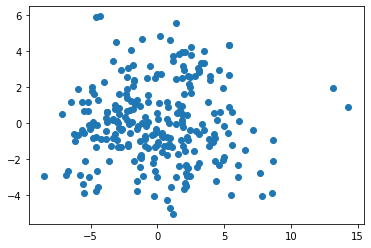

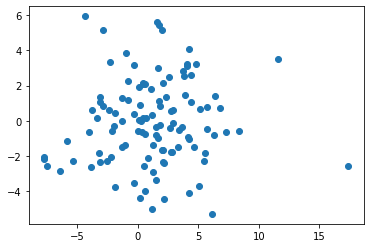

In [12]:
plt.scatter(PcaTrain[:,0],PcaTrain[:,1])
plt.show()
plt.scatter(PcaTest[:,0],PcaTest[:,1])
plt.show()

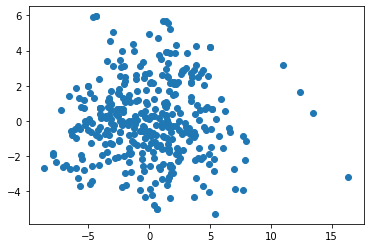

In [135]:
##### MATRIZ COMPLETA
train = np.loadtxt('matrizdesorganizada.txt')
#Normalizacion z-score
NormTrain = preprocessing.scale(train)
zParam = preprocessing.StandardScaler().fit(train)



pcaObj = PCA(n_components=2)
PcaTrain = pcaObj.fit_transform(NormTrain)


plt.scatter(PcaTrain[:,0],PcaTrain[:,1])
plt.show()


In [130]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score
labelsTrain = np.loadtxt('1111labelsTrain1.txt')
k=9
knnClf = neighbors.KNeighborsClassifier(k, weights='uniform')
knnClf.fit(PcaTrain, labelsTrain)
labelsPredict=knnClf.predict(PcaTest) #Etiquetas de la matriz de prueba
labelsTest = np.loadtxt('1111labelsTest1.txt')
acc = accuracy_score(labelsTest, labelsPredict)
print("El rendimiento del sistema es: {}".format(acc))

El rendimiento del sistema es: 0.8018018018018018


In [131]:
#numeral 7
lista=[]
acc=[]
for n in [2,3,4,5,6,7]:
    pcaObj = PCA(n_components=n)
    PcaTrain = pcaObj.fit_transform(NormTrain)
    PcaTest = pcaObj.transform(NormTest)

    for k in [1,3,5,7,9,11]:
        knnClf = neighbors.KNeighborsClassifier(k, weights='uniform')
        knnClf.fit(PcaTrain, labelsTrain)
        labelsPredict=knnClf.predict(PcaTest)
        acc.append(accuracy_score(labelsTest, labelsPredict))
        acc1 = accuracy_score(labelsTest, labelsPredict)
        lista += [(acc1,n,k)]
print(acc)


[0.7837837837837838, 0.8108108108108109, 0.7747747747747747, 0.7837837837837838, 0.8018018018018018, 0.8018018018018018, 0.7477477477477478, 0.7657657657657657, 0.7567567567567568, 0.8108108108108109, 0.8018018018018018, 0.8018018018018018, 0.7927927927927928, 0.7747747747747747, 0.8108108108108109, 0.8108108108108109, 0.7837837837837838, 0.7927927927927928, 0.7837837837837838, 0.8198198198198198, 0.7927927927927928, 0.7747747747747747, 0.7747747747747747, 0.8018018018018018, 0.8108108108108109, 0.8378378378378378, 0.8108108108108109, 0.8198198198198198, 0.8468468468468469, 0.8468468468468469, 0.8378378378378378, 0.8468468468468469, 0.8288288288288288, 0.8018018018018018, 0.8198198198198198, 0.8198198198198198]


In [132]:
print(lista)
print(max(lista))
print("efectividad,componente, numvecinos")

[(0.7837837837837838, 2, 1), (0.8108108108108109, 2, 3), (0.7747747747747747, 2, 5), (0.7837837837837838, 2, 7), (0.8018018018018018, 2, 9), (0.8018018018018018, 2, 11), (0.7477477477477478, 3, 1), (0.7657657657657657, 3, 3), (0.7567567567567568, 3, 5), (0.8108108108108109, 3, 7), (0.8018018018018018, 3, 9), (0.8018018018018018, 3, 11), (0.7927927927927928, 4, 1), (0.7747747747747747, 4, 3), (0.8108108108108109, 4, 5), (0.8108108108108109, 4, 7), (0.7837837837837838, 4, 9), (0.7927927927927928, 4, 11), (0.7837837837837838, 5, 1), (0.8198198198198198, 5, 3), (0.7927927927927928, 5, 5), (0.7747747747747747, 5, 7), (0.7747747747747747, 5, 9), (0.8018018018018018, 5, 11), (0.8108108108108109, 6, 1), (0.8378378378378378, 6, 3), (0.8108108108108109, 6, 5), (0.8198198198198198, 6, 7), (0.8468468468468469, 6, 9), (0.8468468468468469, 6, 11), (0.8378378378378378, 7, 1), (0.8468468468468469, 7, 3), (0.8288288288288288, 7, 5), (0.8018018018018018, 7, 7), (0.8198198198198198, 7, 9), (0.81981981981

In [12]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
from sklearn.metrics import confusion_matrix
#variamos el número de componente LDA y el número de vecinos k
nuevalista = [] #Lista vacia
nueva=[]
nuev=[]
nue=[]
nu=[]
n=[]
new=[]
train1 = np.loadtxt('train1111.txt')
labelsTrain1111 = np.loadtxt('labelstrain1111.txt')
test1111 = np.loadtxt('test1111.txt')
labelsTest1 = np.loadtxt('labelsTest1111.txt')
exactitud = [] #accuracy o exactitud
matrices=[]
tasa_error=[]
sensibilidad=[]
espesificidad=[]
precision=[]
valor_prediccion_negativo=[]
for i in range(2,7):  
    for j in range(1,13,2): #1,3,5,7,9,11
        ldaObj = LDA(n_components=i)
        k = j
        knnClf = neighbors.KNeighborsClassifier(k, weights='uniform')
        
        ldaTrain = ldaObj.fit_transform(train1,labelsTrain1111)
        ldaTest = ldaObj.transform(test1111)
        knnClf.fit(ldaTrain, labelsTrain1111) # Entrenar el clasificador
        labels_pred=knnClf.predict(ldaTest) # Realizar la clasificacion de los datos de prueba
        accuracy=accuracy_score(labelsTest1,labels_pred) # Obtener la precision
        nuevalista.append(accuracy)#Agregar elemento "acc" a la lista "nuevalista"
        matrix=confusion_matrix(labelsTest1, labels_pred)
        nueva.append(matrix)
           

        
        
        exactitud.append(nuevalista)
        nuevalista = []
        

C:\Users\yeison\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(41, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\yeison\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\Users\yeison\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(41, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\yeison\AppData\Roaming\Python\Python36\site-packages\

C:\Users\yeison\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(41, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\yeison\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\Users\yeison\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(41, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\yeison\AppData\Roaming\Python\Python36\site-packages\

C:\Users\yeison\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(41, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\yeison\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\Users\yeison\AppData\Roaming\Python\Python36\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(41, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\yeison\AppData\Roaming\Python\Python36\site-packages\

In [13]:
np.savetxt('Accuracy.txt', exactitud,fmt='%5.5f')

In [14]:
print(exactitud)

[[0.8738738738738738], [0.8738738738738738], [0.8648648648648649], [0.8648648648648649], [0.8738738738738738], [0.8648648648648649], [0.8738738738738738], [0.8738738738738738], [0.8648648648648649], [0.8648648648648649], [0.8738738738738738], [0.8648648648648649], [0.8738738738738738], [0.8738738738738738], [0.8648648648648649], [0.8648648648648649], [0.8738738738738738], [0.8648648648648649], [0.8738738738738738], [0.8738738738738738], [0.8648648648648649], [0.8648648648648649], [0.8738738738738738], [0.8648648648648649], [0.8738738738738738], [0.8738738738738738], [0.8648648648648649], [0.8648648648648649], [0.8738738738738738], [0.8648648648648649]]
